<div style='background-image: url("../../share/images/header.svg") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 250px'>
    <div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computational Seismology</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite Differences - Grid-Staggering Elastic 2D</div>
        </div>
    </div>
</div>

<p style="width:20%;float:right;padding-left:50px">
<img src=../../share/images/book.jpg>
<span style="font-size:smaller">
</span>
</p>


---

This notebook is a private extension writen by Yajian Gao based on part of the supplementary material 
to [Computational Seismology: A Practical Introduction](https://global.oup.com/academic/product/computational-seismology-9780198717416?cc=de&lang=en&#), 
Oxford University Press, 2016.


##### Authors:
* Ashim Rijal ([@ashimrijal](https://github.com/ashimrijal))
* Heiner Igel ([@heinerigel](https://github.com/heinerigel))
* Yajian Gao  ([@Yajian Gao](https://github.com/yjgao-gfz))

This exercise covers the following aspects:

* Solving velocity-stress formulation of 2D wave equation with finite difference method
* Understanding the grid-staggering in connection with finite difference solution to the elastic wave equation
---

### Exercise
First understand the codes below and run the simulation. 

Then, improve the result using (4-point operator) for 1st derivative.

**Message: Once you become familiar with all the codes below you can go to the Cell tab on the toolbar and click Run All.**


# 2. Stability¶
Introduce a new parameter (e.g., eps) and calculate the Courant criterion. Determine numerically the stability limit of the code as accurately as possible by increasing the time step. Print the max value of the pressure field at each time step and observe the evolution of it in the case of stable and unstable simulations. (Hint: The Courant criterion is defined as  eps=(velocity∗dt)/dx  . With this information you can calculate the maximum possible, stable time step. )



In [1]:
# Configuration step (Please run it before the simulation code!)
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numba import jit
from matplotlib import cm


In [420]:
# Initialization of parameters

# Simple finite difference solver
# Elastic wave equation
# 2-D regular staggered grid

# Basic parameters
nt = 2400                                       # number of time steps
nx = 800                                             # number of grid points in x
nz = 300
                                              # velocity (m/sec) (compression wave)
vp=np.zeros((nx,nz))+8000
vs=np.zeros((nx,nz))+5000
rho0=3500
irx=np.linspace(150,600,15)
irz=np.zeros(18)+(nz-3)

dx=1000                                          #m
dz=1000


isnap = 3                                     # snapshot frequency
isx =120                                     # source location
isz = 70


#####stable criterion refer to the guide-sofi 3d in Table4
f0 =  np.min(vs)/dx/8
eps = 0.4
dt=eps*dx/np.max(vp)


###In order to ensure stability of the simulation, the temporal spacing must satisfy the Courant-
#Friedrichs-Levy (CFL) stability criterion (Courant et al., 1967).
#####stable criterion refer to the guide-sofi 2d in Table4 and equation 27

dt_stable=dx/(7/6)/np.sqrt(2)/np.max(vp)
dt_stable_new=dx/0.494/np.max(vp)###from stable criterion refer to the guide-sofi 2d in Table4 and equation 27

print('f0=',f0)
print('dt=',dt)
print('dt_stable=',dt_stable)
print('dt_stable=',dt_stable_new)
                                                # number of operator either 2 or 4


x = (np.arange(nx)*dx)                                 # initialize space coordinates 
z = (np.arange(nz)*dz)
                                     # calculate time step from stability criterion(s)

# Source time function
t = (np.arange(nt) * dt)                             # initialize time axis
T0 = 1. / f0                                           # period
a = 4. / T0                                            # half-width (so called sigma)
t0 = T0 / dt
tmp = np.zeros(nt)
for it in range(nt):
    t = (it - t0) * dt
    tmp[it] = -2 * a * t * np.exp(-(a * t) ** 2)       # derivative of Gaussian (so called sigma)
src = np.zeros(nt)                                     # source
src[0:len(tmp)] = tmp
lam = np.max(vp) * T0                                          # wavelength


#####source term in space
mxx=1e23/dx/dz
mzz=1e23/dx/dz


f0= 0.625
dt= 0.05
dt_stable= 0.07576144084141581
dt_stable= 0.25303643724696356


In [421]:
#####here we could add some heterosgenities in the velocity model

for i in np.arange(100,400):
        vp[i][i-50:i-50+15]=  0.92*vp[i][i-50:i-50+15]
for i in np.arange(100,400):
        vp[i][i-100:i-100+50]=1.06*vp[i][i-100:i-100+50]

for i in np.arange(100,400):
        vs[i][i-50:i-50+15]=  0.92*vs[i][i-50:i-50+15]
for i in np.arange(100,400):
        vs[i][i-100:i-100+50]=1.06*vs[i][i-100:i-100+50]

<IPython.core.display.Javascript object>


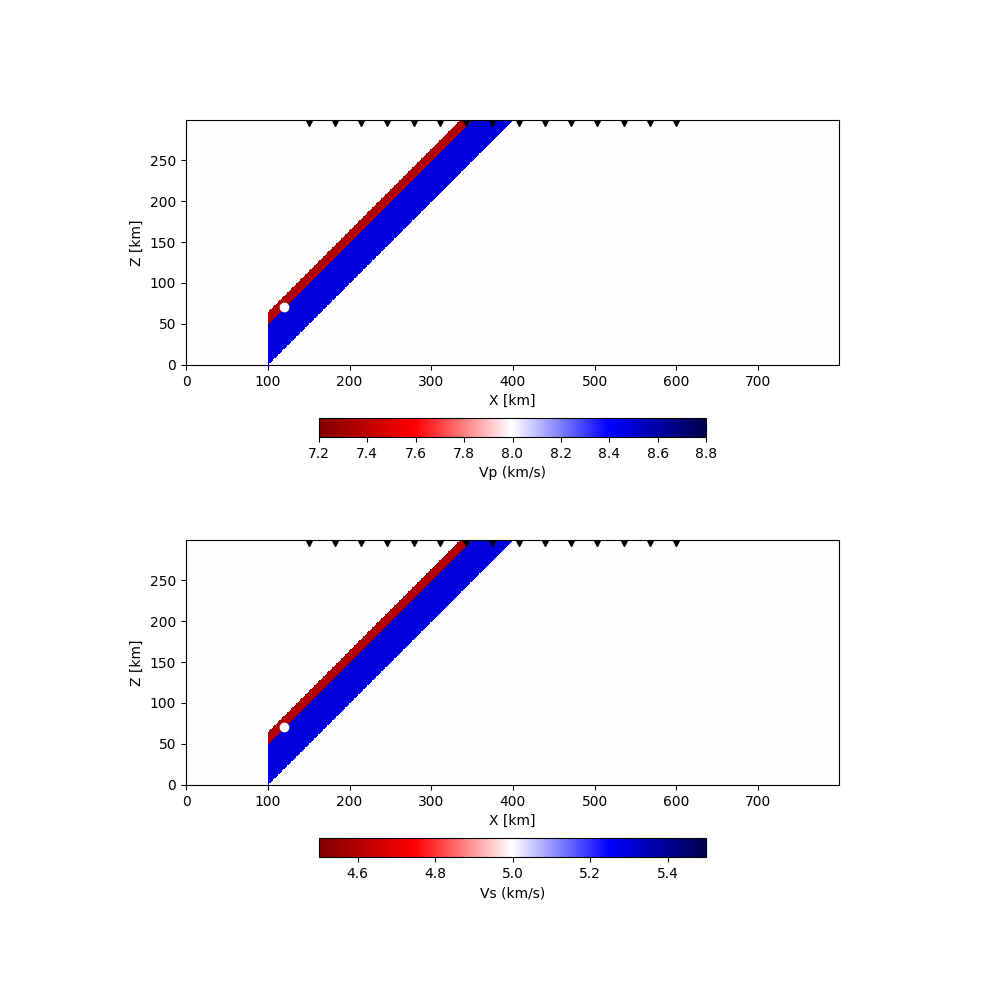

In [422]:
plt.figure(figsize=(10, 10))
fig = plt.subplot(211)
image = plt.imshow(vp.T/1000, animated=True, cmap=cm.seismic_r, interpolation='nearest', vmin=7200/1000, vmax=8800/1000)
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vp (km/s)')
#plt.title('Velocity')  
plt.xlabel('X [km]')
plt.ylabel('Z [km]')
plt.xticks(np.arange(0,1000, step=100))
plt.gca().invert_yaxis()
plt.plot(isx, isz, 'o', color='white')
for i in range(len(irx)):
    plt.plot(irx[i], irz[i], 'vk')
plt.ion()
########################
fig = plt.subplot(212)
image = plt.imshow(vs.T/1000, animated=True, cmap=cm.seismic_r, interpolation='nearest', vmin=4500/1000, vmax=5500/1000)
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vs (km/s)')
#plt.title('Velocity')  
plt.xlabel('X [km]')
plt.ylabel('Z [km]')
plt.xticks(np.arange(0,1000, step=100))
plt.gca().invert_yaxis()
plt.plot(isx, isz, 'o', color='white')
for i in range(len(irx)):
    plt.plot(irx[i], irz[i], 'vk')
plt.ion()

plt.show(block=False)


plt.savefig('model_vp_origin.pdf')


In [311]:
x_coord=np.swapaxes(np.tile(x,(nz,1)),0,1)
print(x_coord)
z_coord=np.tile(z,(nx,1))
x_coord=np.reshape(x_coord,(nx*nz))
print(x_coord)
z_coord=np.reshape(z_coord,(nx*nz))
#print(z_coord)
xyz_matrix=np.zeros((2,nx*nz),dtype=float)
xyz_matrix[0]=x_coord
xyz_matrix[1]=z_coord
Vp=np.reshape(vp,(1,nx*nz))
Vs=np.reshape(vs,(1,nx*nz))
Velocity_matrix=np.zeros((2,nx*nz),dtype=float)
Velocity_matrix[0]=Vp
Velocity_matrix[1]=Vs
Vpv_smooth_all=np.zeros((2,nx*nz),dtype=float)



[[     0      0      0 ...      0      0      0]
 [  1000   1000   1000 ...   1000   1000   1000]
 [  2000   2000   2000 ...   2000   2000   2000]
 ...
 [797000 797000 797000 ... 797000 797000 797000]
 [798000 798000 798000 ... 798000 798000 798000]
 [799000 799000 799000 ... 799000 799000 799000]]
[     0      0      0 ... 799000 799000 799000]


In [58]:
####this function is intended to use the cupy to accelerate the smoothing process provided you have installed cuda
#### of course you also need a nvidia graphic card
import cupy as cp
import datetime
def smooth_cupy_new(xyz_matrix,iterations,sigmaxy,sigmaz,Velocity_matrix): 
      ##input a numpy array and using asarray move to the gpu device
      Velocity_matrix=cp.asarray(Velocity_matrix)
      xyz_matrix=cp.asarray(xyz_matrix)
      Vpv_smooth_all=cp.zeros((2,nx*nz),dtype=float)  
      #t1 = datetime.datetime.now()       
      for i in range(iterations):  
            distancex=(cp.square(xyz_matrix[0][i]-xyz_matrix[0]))/(2*sigmaxy*sigmaxy)
            #distancey=(cp.square(xyz_matrix[1][i]-xyz_matrix[1]))/(2*sigmaxy*sigmaxy)
            distancez=(cp.square(xyz_matrix[1][i]-xyz_matrix[1]))/(2*sigmaz*sigmaz)
            #print(distance)
            distance=distancex+distancez
            distance=cp.exp(-distance)
            distance= cp.divide(distance,cp.sum(distance))
            #print(distance)
            Vpv_smooth_all[0][i] = cp.dot(distance, Velocity_matrix[0])
            Vpv_smooth_all[1][i] = cp.dot(distance, Velocity_matrix[1])
      t2 = datetime.datetime.now() 
      #print(t2-t1)
      # move array from gpu device to the host
      return cp.asnumpy(Vpv_smooth_all)

In [59]:
Vpv_smooth_all_cupy=smooth_cupy_new(xyz_matrix,nx*nz,10000,10000,Velocity_matrix)

KeyboardInterrupt: 

In [13]:
vpv=Vpv_smooth_all_cupy[0].reshape(nx,nz)

<IPython.core.display.Javascript object>


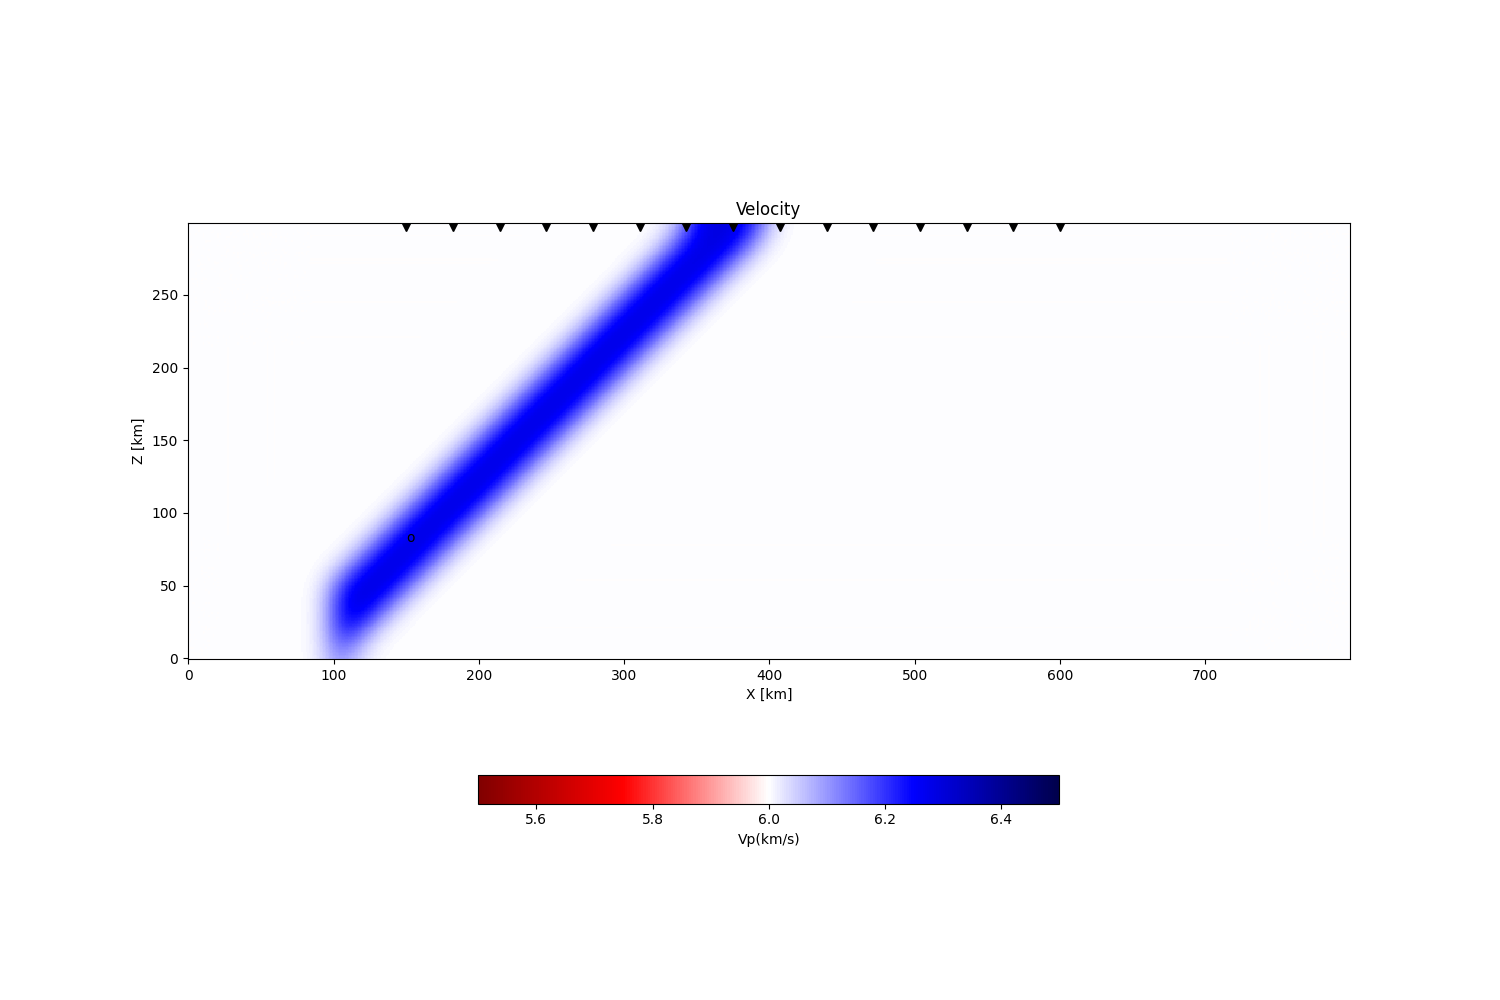

In [177]:
fig = plt.figure(figsize=(15,10))
image = plt.imshow(vpv.T/1000, animated=True, cmap=cm.seismic_r,interpolation='nearest', vmin=5500/1000, vmax=6500/1000)
plt.colorbar(shrink=0.5, orientation='horizontal',label='Vp(km/s)')
plt.title('Velocity')  
plt.xlabel('X [km]')
plt.ylabel('Z [km]')
plt.gca().invert_yaxis()
plt.text(isx, isz, 'o')
for i in range(len(irx)):
    plt.plot(irx[i], irz[i], 'vk')
plt.ion()
plt.show(block=False)
plt.savefig('model_vp.pdf')

In [178]:
@jit(nopython=True,parallel=True) # use JIT for C-performance
def update_v(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu):
    for i in range(ni1,ni2):
        for j in range(nk1, nk2):
            dsxx = 9/8*(sxx[i+1][j]-sxx[i][j])/(dx)-1/24*(sxx[i+2][j]-sxx[i-1][j])/(dx)
            dszx = 9/8*(szx[i][j]-szx[i-1][j])/(dz)-1/24*(szx[i+1][j]-szx[i-2][j])/(dx)
            dszz = 9/8*(szz[i][j+1]-szz[i][j])/(dz)-1/24*(szz[i][j+2]-szz[i][j-1])/(dx)
            dsxz = 9/8*(sxz[i][j]-sxz[i][j-1])/(dx)-1/24*(sxz[i][j+1]-sxz[i][j-2])/(dx)
            vx_new=(dsxx+dsxz)
            vz_new=(dszz+dszx)
            vx[i,j]=vx[i][j]+dt*(vx_new/rho[i,j]) 
            vz[i,j]=vz[i][j]+dt*(vz_new/rho[i,j])
    return vx,vz



<IPython.core.display.Javascript object>


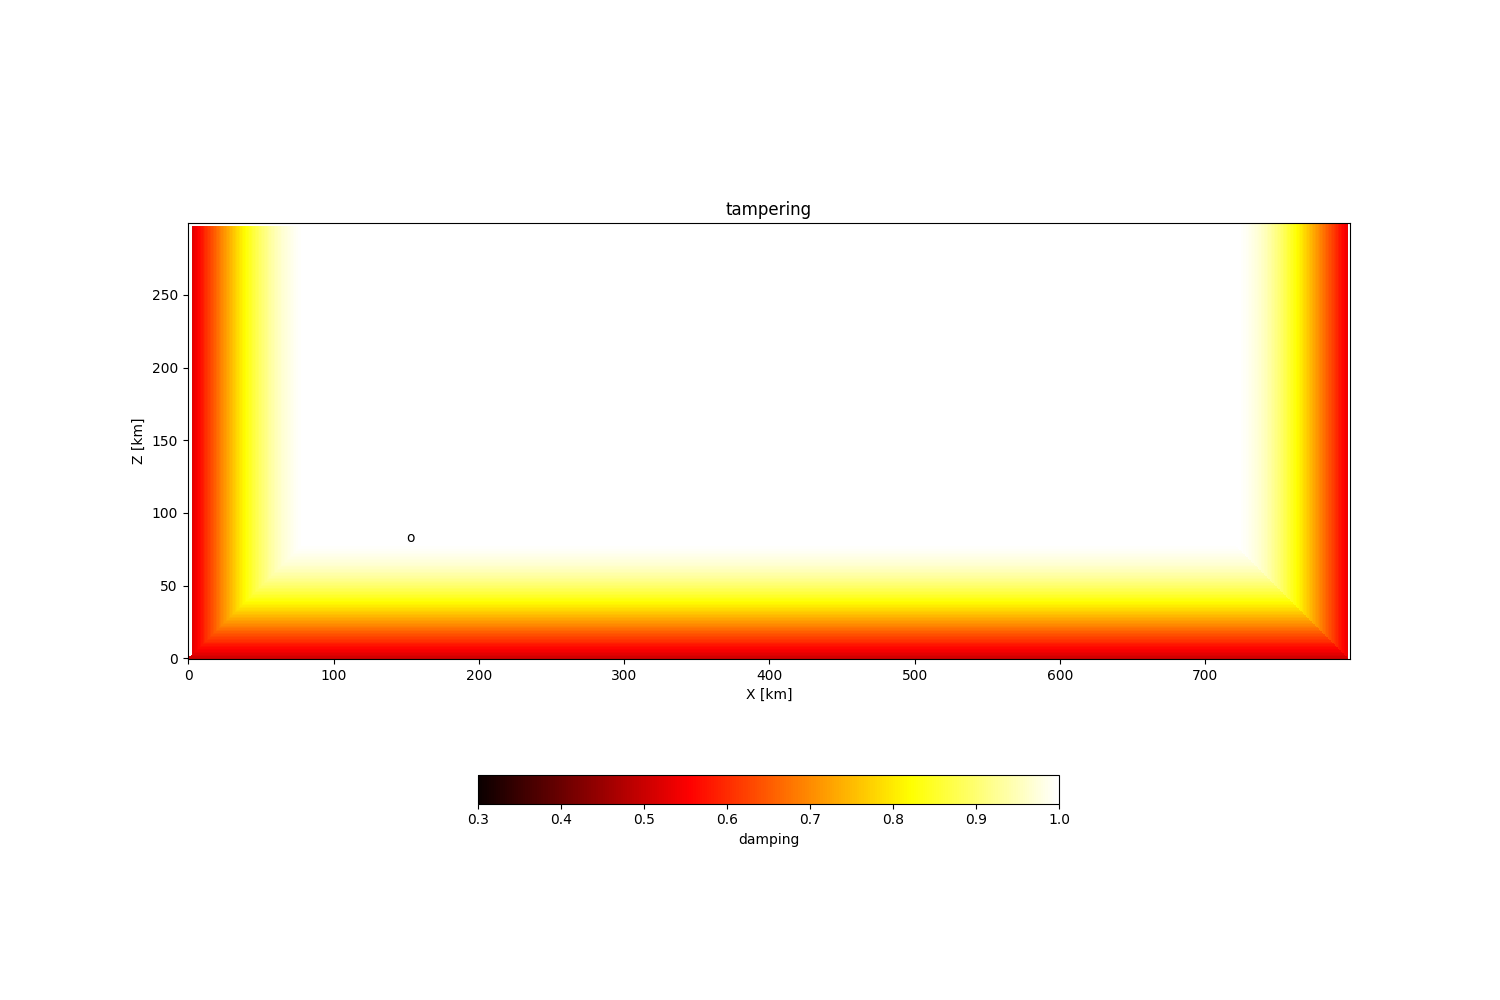

In [179]:

def generate_damp_guassian(nx,nz,ni1,ni2,nk1,nk2,absorb_thickness_n):
    #absorbpoint_x=np.arange(ni1,ni1+absorb_thickness_n-1)
    damp=np.ones((nx,nz))
    ####left boundary
    for i in range(ni1,ni2):
        for j in range(0,absorb_thickness_n):
            #print()
            damp[i,j]=(np.exp(-(0.01*(ni1+absorb_thickness_n-j))**2))
            
            
    #lower boundary
    for i in range(nk1,absorb_thickness_n):
        for j in range(0,nk2):
            #print()
            damp[i,j]=(np.exp(-(0.01*(nk1+absorb_thickness_n-i))**2))
            #print(j,damp[i,j])   
    # right boundary       
    for i in range(ni2-absorb_thickness_n,ni2):
        for j in range(0,nz):
            #print()
            damp[i,j]=(np.exp(-(0.01*(ni2-absorb_thickness_n-i))**2))
            #print(j,damp[i,j])    
    # left lower corner 
    for j in range(0,nk1+absorb_thickness_n):
        damp[j:ni1+absorb_thickness_n,j]=(np.exp(-(0.01*(nk1+absorb_thickness_n-j))**2))
                
    # right lower corner
    for j in range(0,nk1+absorb_thickness_n):
        damp[ni2-absorb_thickness_n:ni2-j,j]=(np.exp(-(0.01*(nk1+absorb_thickness_n-j))**2))   
    
            
    return damp


stencil=2
ni1=stencil+1
ni2=nx-stencil
nk1=stencil+1
nk2=nz-stencil
damp=generate_damp_guassian(nx,nz,ni1,ni2,nk1,nk2,80)
fig = plt.figure(figsize=(15,10))
image = plt.imshow(damp.T, animated=True, cmap=cm.hot, interpolation='nearest', vmin=0.3, vmax=1)
plt.colorbar(shrink=0.5, orientation='horizontal',label='damping')
plt.title('tampering')
plt.xlabel('X [km]')
plt.ylabel('Z [km]')
plt.gca().invert_yaxis()
plt.text(isx, isz, 'o')
plt.ion()
plt.show(block=False)    
plt.savefig('model_tampering.pdf')

    
    
    
    
    

In [405]:
@jit(nopython=True,parallel=True) # use JIT for C-performance
def update_s(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu):
    for i in range (ni1, ni2):
        for j in range(nk1, nk2-1):
            ezx=9/8*(vz[i+1,j]-vz[i,j])/dx-1/24*(vz[i+2][j]-vz[i-1][j])/dx
            exz=9/8*(vx[i,j+1]-vx[i,j])/dz-1/24*(vx[i][j+2]-vx[i][j-1])/dz
            exx=9/8*(vx[i,j]-vx[i-1,j])/dx-1/24*(vx[i+1,j]-vx[i-2,j])/dx
            ezz=9/8*(vz[i,j]-vz[i,j-1])/dz-1/24*(vz[i,j+1]-vz[i,j-2])/dz
            #hTxx=(lamd[i,j]+2*mu[i,j])*exx+lamd[i,j]*ezz
            #hTzz=(lamd[i,j]+2*mu[i,j])*ezz+lamd[i,j]*exx
            #hTxz=(mu[i,j])*ezx+(mu[i,j])*exz
            sxx[i,j]=sxx[i,j]+((lamd[i,j]+2*mu[i,j])*exx+lamd[i,j]*ezz)*dt
            sxz[i,j]=sxz[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt
            szz[i,j]=szz[i,j]+((lamd[i,j]+2*mu[i,j])*ezz+lamd[i,j]*exx)*dt
            szx[i,j]=szx[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt
        ### free surface
        sxx[:,nk2]=sxx[:,nk2]+((lamd[:,nk2]+2*mu[:,nk2])*exx-(lamd[:,nk2]**2/(lamd[:,nk2]+2*mu[:,nk2])*exx))*dt
            #sxz[i,j]=sxz[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt
        szz[:,nk2]=szz[:,nk2]
            #szx[i,j]=szx[i,j]+((mu[i,j])*ezx+(mu[i,j])*exz)*dt                
    return sxx,sxz,szz,szx

In [415]:

import datetime

######here you could input a heterogenity vp and vs

def assemble_psv(dx,dz,rho0,vp,vs,dt,nt,nx,nz,irx,irz,isx,isz,src,damp,PATH):
    t1 = datetime.datetime.now() 
    rho=np.zeros((nx,nz))+rho0
    mu = np.zeros((nx,nz))+rho*vs**2
    lamd=np.zeros((nx,nz))+rho*vp**2-2*mu
    ##### initial the cycle
    vx = np.zeros((nx, nz))
    vz = np.zeros((nx, nz))
    sxx = np.zeros((nx, nz)) 
    sxz = np.zeros((nx, nz))
    szz = np.zeros((nx, nz))
    szx=np.zeros((nx, nz))
    seis = np.zeros((len(irx), nt))
    print(np.shape(seis))
    ir = np.arange(len(irx))
    v = max([np.abs(src.min()), np.abs(src.max())])
    stencil=2
    ni1=stencil+1
    ni2=nx-stencil
    nk1=stencil+1
    nk2=nz-stencil
    fig = plt.figure(figsize=(10,8))
    #plt.plot(x[isx-200:isx+202]/1000,100*np.sqrt(2*np.abs((x[isx-200:isx+202]/1000-isx)/100)\
                                               #  -((x[isx-200:isx+202]/1000-isx)/100)**2)+isz,'r')
    #plt.plot(x[isx-200:isx+202]/1000,100*(-2.14)*(np.sqrt(np.sqrt(2)-\
                                                     #     np.sqrt(np.abs((x[isx-200:isx+202]/1000-isx)\
                                                    #                     /100))))+isz,'r')
    #extent = [np.min(),np.max(X),np.min(X),np.max(Y)]
    image = plt.imshow(vx.T, animated=True, cmap=cm.seismic, interpolation='bicubic', vmin=-1e-9, vmax=1e-9)#cmap=plt.cm.RdBu
    #image = plt.imshow(vp.T/100000, animated=True, cmap=cm.seismic, interpolation='nearest', vmin=-0.001, vmax=0.001)
   # plt.colorbar()
    plt.colorbar(shrink=0.5, orientation='horizontal',label='Velocity field')
    plt.title('Velocity Wavefield')
    plt.xlabel('X [km]')
    plt.ylabel('Y [km]')
    plt.gca().invert_yaxis()
    plt.text(isx, isz, 'o')
    x_slab=np.array([100,400])
    y_slab=x_slab-100+50
    y_slab2=x_slab-100
    y_slab3=x_slab-40
    plt.plot(x_slab,y_slab,'k')
    plt.plot([100,100],[0,60],'k')
    plt.plot(x_slab,y_slab2,'k')
    plt.plot(x_slab,y_slab3,'k')
    plt.ion()
    plt.show(block=False)
    
    #### free surface by image
    #plt.text(isx, isz, 'o')
    for i in range(len(irx)):
        plt.plot(irx[i], irz[i], 'vk')
    #fig.canvas.draw()
    m=0
    for it in np.arange (nt):
        szz[:,nk2]=0
        #for n in range(0,stencil-1):
        #    szz[:,nk2+1+n]=-szz[:,nk2-1-n]
         #   sxz[:,nk2+n]=-sxz[:,nk2-n-1]
        vx, vz = update_v(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu)
        vx=vx*damp
        vz=vz*damp
        vz[:,nk2  :nz]  = 0.0;
        vx[:,nk2+1:nz]  = 0.0;
        vz[isx,isz]=vz[isx,isz]
        vx[isx,isz]=vx[isx,isz]
        ###for the receivers
        for k in np.arange(len(irx)):
            print(vz[int(irx[k]),int(irz[k])])
            seis[k,it]=seis[k,it]+vz[int(irx[k]),int(irz[k])]
        sxx,sxz,szz,szx = update_s(vx, vz, sxx, szz, sxz,szx, nx, nz, dt,dx,rho,ni1,ni2,nk1,nk2,lamd,mu)
        #####source position
        szz[isx,isz]=szz[isx,isz]+src[it]
        sxx[isx,isz]=sxx[isx,isz]+np.sqrt(2)*src[it]
        #sxz[isx,isz]=sxz[isx,isz]+src[it]
        #vx[isx,isz]=vx[isx,isz]
        #sxx=sxx*damp
        #sxz=sxz*damp
        #szz=szz*damp
        #szx=szx*damp
        if (it % isnap) == 0:
            m=m+1
            #print(np.shape(vz))
            image.set_data(vz.T)
            plt.plot
            #plt.text(600,250,str(it*3)+'s')
            plt.savefig(PATH+str(m)+'.pdf')
            fig.canvas.draw()
        
        #for i in np.arange(100,400):
        #vp[i][i-100:i-100+50]=1.1*vp[i][i-100:i-100+50]

        plt.ylim(0,300)
        
    t2 = datetime.datetime.now()   
    print(t2-t1)
    plt.close()
    return vx, vz,seis



(15, 2400)


<IPython.core.display.Javascript object>


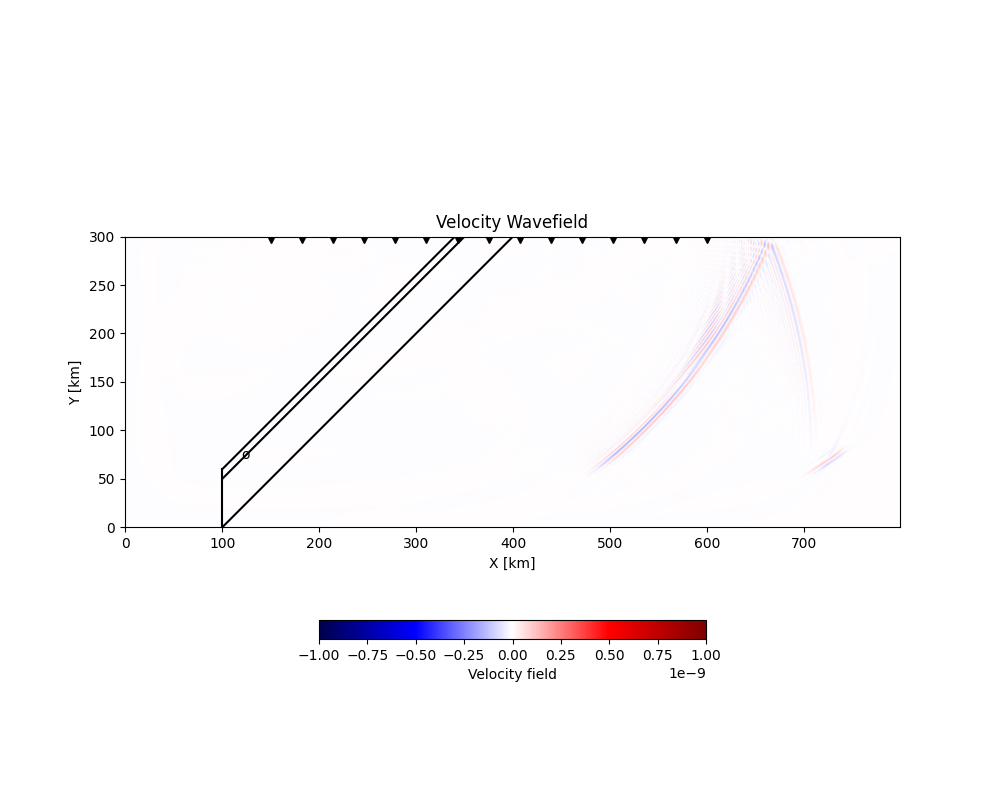

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


-3.816086042464216e-207
-2.1125213907681998e-253
-7.81301702664e-313
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.0350515558676904e-205
5.5322722111752976e-251
1.59956263523824e-309
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-9.889999875881241e-204
-1.2880332223533164e-248
-2.6519205377848762e-306
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
4.384201571791658e-202
2.67788103651584e-246
3.6140735457730615e-303
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.773982955596465e-200
-4.991700436695748e-244
-4.101569150949641e-300
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.554469936040794e-199
8.37339081373949e-242
3.920621563837231e-297
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-2.2114640226654127e-197
-1.2682871172166718e-239
-3.188333804612323e-294
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
6.811509611890076e-196
1.7399742120351523e-237
2.2255652072140763e-291
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.9138625288407388e-194
-2.1682603929129925e-235

2.914909811350854e-149
1.8920865282098873e-170
3.238979404400838e-198
-3.4207226355515155e-233
-7.051329048679325e-278
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-2.7238052953789358e-148
-2.8101784352952404e-169
-6.567214282893342e-197
9.633687092848585e-232
4.988252953613577e-276
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-7.891874490874605e-148
4.24937951426601e-169
6.331293648419943e-196
-2.5553642042020007e-230
-3.3298046422407765e-274
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
5.770362699402624e-147
9.871309059473318e-168
-3.361642689290132e-195
6.3799942739259356e-229
2.098852781168113e-272
1.2e-322
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.1116182687270434e-146
-5.5235073105021826e-167
-2.875707286227343e-195
-1.498063130686599e-227
-1.2500122662179678e-270
-1.9654e-320
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.1074905727287333e-145
-1.89861849710385e-166
2.5670739532391857e-193
3.304559166428338e-226
7.038304527389767e-269
2.65304e-318
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-5.401579141361344e-14

-3.1792144503702166e-122
1.249802416931747e-137
-6.497193346801829e-161
-1.2558546311432434e-188
1.1851998753841129e-219
1.814622120580039e-252
6.857462795038743e-294
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.8315930829182795e-121
1.2287480369223338e-137
-1.599599654409612e-160
1.7334879680784425e-187
4.168733616458134e-218
-2.6901131192605984e-251
-2.4140632835691636e-292
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.768019429402186e-121
-2.2035878205178933e-136
1.9949980558955023e-159
-2.448414426048159e-187
-4.982325748395219e-217
3.717389366995198e-250
8.119288988736517e-291
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
3.9122234926654484e-121
-4.973838553629303e-136
2.7400773191000295e-159
-6.061891802587773e-186
2.3789851577338822e-216
-4.758795952096329e-249
-2.6088500764418057e-289
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-8.741605294273186e-120
3.3916237519345054e-135
-5.686967305840063e-158
3.435429894259771e-185
6.951015769104132e-216
5.593947866694587e-248
8.007490252614236e-288
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-2.93

6.773586133893645e-103
2.5577992278821776e-115
6.542746644529694e-135
-2.868921967650483e-159
7.295019680408691e-187
6.460827018345335e-217
3.6227493946730786e-249
2.601397216377779e-284
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.6723777018690521e-102
-2.342529519929171e-114
3.404453890242219e-134
-8.939881499849675e-159
-3.1554608848375247e-186
-2.0164450576332395e-217
-3.43559066495108e-249
-2.9275803503172613e-283
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-1.1056997916826294e-101
-8.514502298975783e-114
-6.111790364543902e-134
6.62055908542841e-158
-1.7157216368700733e-185
-2.725736965160618e-215
-1.85100257609435e-247
2.9969766736765452e-282
5.93e-322
0.0
0.0
0.0
0.0
0.0
0.0
-2.3069959281148702e-101
6.745359284843266e-114
-6.582456851784154e-133
2.1680843242732304e-157
1.3119783339168767e-184
1.4231618173015244e-214
1.9846413916415758e-246
-2.7263339310667413e-281
-1.397e-320
0.0
0.0
0.0
0.0
0.0
0.0
1.2388853939329554e-101
1.1328702293881134e-112
1.1806097436205467e-134
-1.462692191751816e-156
3.05312870379

-1.3636819840657845e-87
2.164088631252116e-99
-3.779992491199864e-114
1.3206718477808718e-136
-1.5754044963067542e-161
-2.4169469636183297e-190
-3.829795498506066e-219
-3.650438943302821e-252
-2.0999402590554976e-285
3.2006e-320
0.0
0.0
0.0
0.0
0.0
-1.00587038095769e-86
1.6885465277677106e-96
-1.4264124078360218e-113
1.824723516786409e-135
-7.671625202698008e-161
-1.676012846688755e-188
5.2260316949525526e-219
4.465478114733825e-251
3.8057389953335436e-285
-3.12907e-319
0.0
0.0
0.0
0.0
0.0
-2.5177834241350713e-86
4.666358821252855e-96
1.1986429454984125e-113
8.152254915149153e-136
2.812574292258273e-160
2.0326229368754136e-188
1.209865470211592e-217
-9.71969639827054e-251
9.123512430230373e-284
2.713443e-318
0.0
0.0
0.0
0.0
0.0
-2.0936130193936253e-86
-8.421510588857359e-97
1.9292808894362524e-112
-2.723272777304229e-134
1.7632829612313968e-159
4.354252444032743e-187
-5.195822364716139e-217
-1.5061989932487534e-249
-1.1684474033361571e-282
-1.9698906e-317
0.0
0.0
0.0
0.0
0.0
8.84112369

-1.924275750283363e-74
1.1419555620578644e-82
-2.0931136467602964e-97
-1.4596381561565788e-117
8.151981537644947e-141
-9.800321741627234e-167
-7.104552332636778e-195
-9.383290790256222e-226
-1.7647084210059055e-257
-1.4945002961909366e-290
0.0
0.0
0.0
0.0
0.0
-2.880667158002288e-74
9.516043402662205e-83
2.0277378300929587e-98
6.003629170842904e-117
3.2559693953840113e-140
-1.5761304078234022e-166
-1.1067131239135397e-194
1.445643540694171e-225
-6.400921585560643e-257
1.5379477312517476e-289
0.0
0.0
0.0
0.0
0.0
6.129265477925492e-75
-4.502297682371124e-82
1.909464521860289e-96
3.051370484175031e-116
-7.0482589796721335e-140
1.7678523719358557e-165
1.7755400861277134e-193
2.680444279383895e-224
9.638655720282453e-256
-3.3564912589035383e-289
5.4e-323
0.0
0.0
0.0
0.0
1.7164817447422885e-73
-1.9355854687739122e-81
4.7886395847766e-96
-2.594620573791363e-117
-6.11142925055384e-139
4.636206980220243e-165
2.3714272872759563e-193
-9.22361748195554e-224
-1.2546574186636029e-255
-5.4236189779648

6.0256039153299675e-64
-9.172364670073067e-71
1.6059498252419373e-83
-1.8929718528425762e-101
-1.8689996040969827e-123
-1.2385230925744734e-147
3.3479327375719903e-174
-8.313834622693294e-204
3.490931182225063e-234
-5.3615421556047414e-266
2.700453495260819e-298
0.0
0.0
0.0
0.0
-1.0519911280916859e-64
-1.4944864477321982e-70
5.5712104438801326e-83
5.709375190856818e-103
-1.3176512630665659e-122
-3.4047264640356815e-147
4.646405421629385e-174
6.267154988206234e-203
-6.9715805698865675e-233
-2.3041135111642366e-264
2.7834810349899602e-297
0.0
0.0
0.0
0.0
-3.0543511585417463e-63
3.142319376995424e-71
3.954021682431532e-83
1.7844405442895285e-100
-6.233676449936658e-123
1.280670549392617e-146
-5.7578950535647534e-173
1.976189252726252e-202
-1.7554200531691965e-233
8.603767077523399e-264
-2.662484959781108e-296
0.0
0.0
0.0
0.0
-9.378364632568257e-63
8.792058147421402e-70
-2.813622221907713e-82
4.4251030315908265e-100
1.427668108959251e-121
7.254472335431064e-146
-1.4651449222393823e-172
-1.

-3.6894494890044435e-55
4.469708174954241e-62
-1.1027663326789645e-71
-1.9737636075876195e-88
3.702465660310928e-108
-3.5563737621659275e-131
-1.7806994637492889e-156
-1.4930426421913576e-184
-1.8064118562026924e-213
-2.2727030236606766e-244
-5.733784240813116e-275
4.0324123780353456e-308
0.0
0.0
0.0
-1.9710433954713427e-54
-1.374475369159625e-60
-2.2513803500313563e-71
1.2724290842036687e-87
9.917286889966397e-108
-7.077181738808389e-131
-4.2930061326056173e-156
4.0595434444359727e-184
1.1543124897121468e-212
-9.73117835273741e-243
-2.4739383229120317e-275
-7.412269643522343e-307
0.0
0.0
0.0
-4.7183516318687615e-54
-4.3768245855663387e-60
7.393409399894276e-73
4.883553947828713e-87
-1.2048097629813819e-107
2.815392584029695e-130
1.9265234142672618e-155
3.1725275657264222e-183
4.3477479172670705e-212
1.3786540940988136e-242
1.944801486886666e-273
1.4252780947256855e-306
0.0
0.0
0.0
-7.038627846477335e-54
-7.119344081224728e-60
1.3170724591877446e-70
3.2294880039034865e-87
-1.2579365370

5.98202096131347e-47
-5.573903048966601e-52
-1.8194117971786473e-61
-2.8128438638211723e-76
9.681194113531946e-95
1.5016297216188936e-116
-2.296086370426001e-141
1.2424479637115478e-167
-1.2973100101694535e-195
-2.56188299650561e-224
2.0797919157569892e-254
-1.2891487186028322e-286
7.41993e-319
0.0
0.0
-1.8375528794335422e-47
-5.861328187900592e-52
-2.233904709053464e-61
-1.3378422875489165e-75
1.3201603527477564e-94
4.40141999647425e-116
-5.23704650709561e-140
8.685842340858577e-167
-2.314613292270264e-194
-1.8946859663499695e-223
-1.0664432583822696e-254
-3.1035731952396512e-285
-7.806376e-318
0.0
0.0
-2.6458175698918422e-46
4.311109459010334e-52
2.538425000632681e-61
-1.8201299289797248e-75
-4.5311354054525184e-94
-4.74482909994236e-116
-8.142081383960745e-140
-3.992467921333545e-167
-3.1788822283078578e-195
4.704779432853803e-223
-5.324873506913321e-253
9.363137957026748e-285
-1.76691e-318
0.0
0.0
-7.361897398700883e-46
3.5882544046338735e-51
1.8012843512084577e-60
3.62100744725089

4.568102938211553e-40
-2.9799528827164493e-44
9.492912798003041e-53
-1.572038569946295e-65
-6.0614221992862615e-83
1.9112234810861682e-103
-2.5464905050990504e-126
-6.015665920948517e-152
-3.334445973173703e-179
-4.695665775373994e-207
-1.2358331505344826e-237
-1.941758930348231e-266
1.0287757325895014e-298
0.0
0.0
2.22357290215375e-39
-4.4027924441455967e-44
-1.2777897178250532e-53
-1.4119350156178253e-65
3.711648495811077e-83
6.686694202921217e-103
1.554841678935516e-126
-7.156799475389623e-152
-6.002614609799605e-178
5.371477505264158e-206
3.0774897981692234e-235
-3.3227473111715286e-266
2.657020037227602e-297
0.0
0.0
5.168537333134779e-39
-2.5995822429631274e-44
-4.332062967333646e-52
4.747398634936897e-65
5.2363568366579944e-82
4.002172500246217e-104
3.035528758578802e-125
6.13096068657785e-151
-5.065330531155516e-178
1.4725410992643315e-205
1.9092777501708984e-235
4.958426047805758e-265
-6.724109255045759e-297
0.0
0.0
8.235377761862489e-39
7.61036663994918e-44
-1.1757601581416508

9.086468726893407e-34
9.190546634915873e-39
-1.3462223438737788e-44
-5.793793265497556e-56
8.156713561755009e-72
-3.471593931783562e-91
-4.9593464040236734e-113
1.0001257940751367e-137
4.148662117277502e-163
-1.5721895084451305e-190
1.50350956666517e-218
3.4486796467183905e-248
5.827875940431117e-279
2.023598120839e-311
0.0
-7.303143707907627e-33
-3.4113301003880903e-37
-2.5293685404454793e-44
-9.212578925371212e-56
1.2745621103289726e-71
2.3474273400104545e-91
7.311906970853506e-113
5.379385903573847e-137
8.652048590206923e-163
1.1788311282989865e-189
-1.8335194331022484e-218
-1.314464243362345e-247
4.396468428510336e-278
-1.26783494064912e-309
0.0
-2.46191620696657e-32
-1.0235205111259599e-36
-2.246798903261534e-44
1.9230927929004583e-56
-1.4805977961028859e-71
3.2096228528147905e-90
6.304473950780876e-112
1.5436329652063384e-137
-3.5480208531088043e-162
4.34774801160617e-189
-2.8788523405816393e-217
-7.966962647437123e-247
-1.469196590364352e-277
7.98641123322526e-310
0.0
-5.1544810

-6.721668916712337e-27
-3.488285777756118e-31
-9.479979997144328e-38
1.265394980159764e-47
4.9707394174457275e-62
4.233389538876021e-80
-1.380788304083447e-103
1.980971032098986e-125
2.846964893654964e-149
1.8401017852322232e-175
4.533441478283969e-203
1.0215121732771174e-231
7.769884637801845e-262
6.105934800940949e-292
0.0
-1.6172953984274556e-26
2.153209650676888e-31
-2.4214629373854174e-37
1.364317185683966e-47
8.13418922680331e-62
9.379677421993088e-80
-2.080238070729033e-100
6.091497653325345e-124
-7.919768067972899e-149
-7.046597655321064e-175
3.9479152155292454e-202
-7.515307711049405e-231
-1.6530959893810977e-260
8.31607798455253e-292
0.0
-2.8825924596934966e-26
1.672282651850248e-30
-3.7240081390256565e-37
-1.4015962255530534e-47
-4.053149432531051e-62
-2.5732432763425386e-80
-5.380786378680746e-100
1.3093717365272623e-123
-4.955819644774773e-148
-3.8053008475059076e-174
-2.4867955954873897e-203
-2.729861567074067e-230
-2.732961951131233e-260
-1.450539016486724e-290
-5e-324
-

6.507819931437727e-22
-5.926271595960692e-26
6.673260561309762e-32
1.0054619986028902e-40
-1.0780909032645666e-53
7.610900177420905e-72
-1.363776940940504e-90
4.155667621377241e-113
-1.1066536372859773e-137
3.5850766604118453e-162
5.583340428381253e-189
-9.066643181784434e-217
2.7182045131368974e-246
3.5431461122448922e-276
3.695796186764842e-308
2.912849223717642e-22
1.3606888797748505e-25
1.8197506255218595e-31
5.241250241137224e-41
-1.7097497296839624e-53
2.9370035529165714e-70
-6.792988909299228e-90
-3.7254292957535507e-113
2.219314376443967e-136
5.723174267514758e-162
2.179398819705023e-188
-9.119841094445339e-217
3.7783216662341295e-245
3.763726859582808e-275
-4.570899156962934e-307
-7.819808858055681e-22
5.54557199448591e-25
3.1311933565579638e-31
-2.138166421377906e-40
3.661951323412249e-54
7.45828133232479e-70
-8.404674289484047e-90
-4.433404327795578e-112
6.4513736584392536e-136
-2.831646036547557e-161
-3.1140005522774066e-188
1.2410530115505402e-215
-1.7526392995849746e-246


5.037683383466931e-18
-2.556120874650145e-20
3.3306496665914744e-26
2.01787918981846e-34
1.6655113852973742e-46
-9.111386381565902e-62
-2.0472549639200278e-81
-8.391690875145195e-103
2.3402955436191522e-125
-7.449920234964754e-150
5.5369699439529e-178
-6.638240887050887e-203
2.8535321053014163e-231
-1.728541868815944e-260
1.3414977532171537e-291
2.4980793971753598e-17
-2.940551414418036e-20
2.5369100924625927e-26
3.826900684548111e-34
9.368444676169212e-46
-2.1963876979350245e-61
-4.411878356378085e-80
-9.29329875142891e-102
-4.319879048724709e-125
9.518675319584206e-150
3.634816736054403e-175
7.448305300455532e-203
-9.400891828751673e-231
-6.479582023364626e-260
-1.3078829169528083e-291
5.69598354559186e-17
-2.013646162385603e-20
-2.1336623834302907e-26
3.952413120420332e-34
1.822696377397481e-45
-1.2232942038202065e-61
-1.0519748756712359e-79
-1.8056727391497864e-101
-3.142380705350909e-124
9.854985669048275e-149
7.892572473911243e-175
1.0424215542794463e-201
-5.952951743272866e-230


7.373479989897697e-14
2.0117070309513096e-16
4.447926219543298e-21
-1.010328102338992e-28
4.5252073709370674e-39
1.6299685577168922e-53
3.783785853961735e-71
-2.206554712493554e-92
-3.0229227278478264e-114
5.958653206457364e-138
-3.7514681443541146e-163
-1.5029506145259394e-189
2.0476598027312013e-218
-7.882612498995508e-247
-2.456411070958771e-276
2.5318938977111625e-14
-4.331397286531767e-17
2.8758354709048594e-21
-1.2704004949768437e-28
7.93824043122079e-39
3.762997449720926e-53
3.166114707469099e-71
-1.5430704531895458e-91
-1.0871128158456622e-113
-4.985470605072758e-139
-1.0079712921043426e-162
-2.371098172866097e-189
-1.4784285282787158e-216
4.14270514153717e-245
9.94563785786212e-276
-7.14418959292583e-14
-5.409332629362291e-16
-3.2343266493392653e-21
-5.898956820914808e-29
4.825564809335995e-39
2.617247438470385e-53
-1.2697321360821148e-70
-2.620872782806048e-91
-4.424846007816168e-114
-5.560803236353938e-137
1.5720696298137842e-162
1.2973066794952942e-188
-3.106943328580457e-2

3.373655710543732e-11
-1.778763121341385e-12
1.8799833092606892e-16
7.070730448015412e-24
7.18714970148172e-33
-4.98157479228931e-47
-1.0338342965356023e-62
1.1732033568199014e-82
-1.30395190087028e-103
-8.717973249173467e-127
3.848998027590831e-151
2.977591432053841e-177
5.520333717182087e-204
8.46988506332456e-232
2.071364248596355e-261
2.5879280336769794e-11
-1.9527806454127747e-12
3.1998180192057407e-16
2.7194313460008606e-23
1.5262405446889678e-32
-1.2782831880795103e-45
1.8363838346629436e-62
-3.854524032781279e-82
-2.2196647053430822e-103
-3.402992856059611e-126
9.625681312936653e-151
-1.8414357029498364e-176
-2.3035884638966374e-203
4.168834569817851e-231
2.230617340084296e-261
1.5242790163556618e-11
-1.8145369134787826e-12
4.464217109883128e-16
5.634361556343278e-23
1.7262461616799673e-32
-3.173684881482886e-45
1.0110066675629993e-61
-1.7424616945701997e-81
3.382230718384089e-103
-1.5930835432996634e-126
-1.2595397396520922e-150
-7.486405926843694e-176
-1.1686831226225583e-202

4.023448309554372e-12
-5.185131478312239e-11
-9.035469817573986e-13
1.3158372743416307e-18
-2.136283957597873e-27
-7.225763645460417e-39
1.73756371075444e-54
3.40211931915825e-73
-1.1063325597667482e-93
-6.763083326181372e-116
-2.566956112550646e-140
-1.1853571667694653e-165
5.481538316091076e-191
1.3075205045477178e-218
1.8573363391598172e-247
4.018628630710294e-12
-5.269766205318761e-11
-1.3689521236198636e-12
2.8254942587953024e-18
-7.322474580895589e-28
-1.30025376123404e-38
-1.5658048534781367e-54
8.404536777470764e-73
-2.7217149361648383e-93
-6.128972548203123e-116
-3.468842850315458e-139
2.9681010281009583e-164
1.861937383434778e-190
1.3217095999133209e-217
-6.206052871546689e-247
4.460629174718747e-12
-4.976962037936704e-11
-1.831386212357984e-12
4.478460791651473e-18
3.805340730069199e-27
-8.053924405907413e-39
-1.1972939790751315e-53
4.013421201158611e-73
-1.7637004476808886e-94
3.4181472749515785e-115
-6.665157433020222e-139
8.404670638176518e-164
-1.780999726389506e-190
1.1

4.591123519046484e-13
2.3136962278429963e-12
-3.709544570574241e-11
-1.3350956854317545e-14
3.2038436600454187e-22
-1.4816194794952418e-32
-1.0750608507705247e-46
-1.5741585230212655e-64
3.0754077908554125e-85
-1.1257555015662157e-105
-1.0754566233497128e-128
3.2294918714847403e-153
-1.280103278490225e-178
-2.7684916598375107e-205
8.420144849159634e-234
6.596325863404209e-13
1.7914019128798247e-12
-4.358731346665083e-11
-2.236740991799141e-15
5.158867107869814e-22
-2.3423646554934123e-32
-1.5494403233049085e-46
-1.924823746007614e-64
-6.748617218241683e-84
-8.434805483657621e-106
-1.5803037612689715e-128
-4.7303766060588535e-153
-2.0070341864226686e-178
1.2756583490539236e-205
-1.2626573951530817e-233
7.465178387943641e-13
1.5528480374245495e-12
-4.661353574384524e-11
2.0865996958892678e-14
5.592997982456248e-22
-1.3562289090516627e-32
2.368054548927148e-47
2.594491436269475e-64
-1.9925695980211007e-83
5.35422037062751e-105
4.201816696225547e-128
-4.0481881436788325e-152
7.935247111628

-4.480341724761296e-13
2.419705336740036e-13
3.165634757127462e-12
3.071306048643595e-11
2.029781794669968e-17
-8.952755233637183e-28
-4.236447753505036e-40
1.8077044790746412e-56
2.780427521583218e-75
-5.553974185086872e-96
-2.842464181624996e-118
-4.429666856336643e-142
6.480318518050981e-167
3.1034792036038483e-193
8.923812415778262e-221
-4.602276944887134e-13
2.9329938510431614e-13
2.7578124742033477e-12
3.469757999427654e-11
1.5426474676197338e-17
-6.548814956117388e-27
6.855225948334562e-40
2.948091402557174e-56
6.724402023032007e-75
-1.3708012669471295e-95
-1.2406387315821416e-118
-1.6555481689786005e-141
1.9189452547440913e-166
-1.730931028507688e-192
3.147112255433744e-220
-4.2832830703619876e-13
2.8143846030811297e-13
2.500727632200807e-12
3.650404731058536e-11
-6.722105872813706e-18
-1.3866942015136576e-26
3.280087513519595e-39
-1.849529750780763e-57
3.3938397911570516e-75
-2.6815540050027487e-96
1.67734271707396e-117
-7.46018369390588e-142
-1.0615536975757103e-166
-7.332995

8.12092941371763e-13
-1.497475479152328e-13
3.070194222767483e-13
1.218786946647953e-12
2.175012816772184e-13
-1.1332822666951062e-22
-3.929880932843656e-34
-1.8014567485615808e-49
-8.854417907567623e-67
5.160319960627428e-87
-2.872222249571819e-108
-2.735112892711083e-131
4.2714634548981135e-156
-3.687681559227569e-181
-3.5703587043193803e-208
8.09160110990557e-13
-1.7363517371943106e-13
2.5501557772419417e-13
2.806059767664271e-12
2.999771745191491e-13
1.0784391964161825e-22
2.0279991479661224e-33
-1.1180737009883044e-48
-1.4933002458797426e-66
-1.2469349790839993e-86
-3.935713536171804e-108
-3.810860280033011e-131
-3.090757900970636e-155
9.211020261440431e-181
-1.530971009342832e-208
7.770651943602501e-13
-1.744307937231663e-13
1.8288378023076696e-13
3.930982018720121e-12
3.3790626519795987e-13
6.054453100296643e-22
6.355901778627366e-33
-2.2208404364704088e-48
2.459283285153478e-67
-6.2563541778598634e-86
7.964196819380614e-108
9.992507786199299e-131
-1.15417823336618e-154
5.743822

-3.835048349781979e-14
8.514387991441444e-14
-5.1261452759110365e-15
7.081120926095725e-13
1.5347305588649905e-11
2.241250581633496e-17
-7.128453280483294e-28
-5.5561246191833954e-42
6.236826243507758e-59
2.1292198696952964e-78
-3.5377920364587e-99
-4.182484922922447e-121
-6.422974979403185e-145
1.644624548768791e-169
3.9016459472457584e-196
-4.675826247966882e-14
9.858235523392157e-14
1.1663582861268523e-14
6.109475749618795e-13
6.024117299633881e-12
4.3814609958796907e-17
-4.240214249036029e-28
-7.820615586250174e-42
1.6308234909399557e-58
1.4387945065161068e-77
-2.2164828059557536e-98
-6.4528342515032635e-121
-2.6466559874002013e-144
2.795009331500575e-169
2.183555266321931e-196
-5.86337862069176e-14
1.198717098647374e-13
1.831126496233665e-14
5.44681924284657e-13
-3.6690161579704986e-12
6.08814385839242e-17
8.662691786684223e-28
-3.9671983049181854e-43
1.625342777893263e-58
2.787262292981744e-77
-3.895776900164398e-98
1.084774265166911e-120
-2.102367588834694e-144
-6.85402414831252

-2.0193733992680463e-13
3.7307064404002416e-13
-2.1757221053024824e-14
5.798798737408244e-14
4.099968449188184e-12
1.5396974773284562e-13
2.94942023126453e-23
-1.260704452236175e-35
8.131171204404073e-52
-4.639815435579484e-70
1.05299219115058e-89
-1.3907167836193224e-111
-1.8711361996719946e-134
7.343310907131946e-159
-1.235377312458588e-184
-1.8735510492004198e-13
3.5227028788472576e-13
-2.2087555586760142e-14
4.4639665226575345e-14
4.072527076829899e-12
2.891802985171615e-13
1.6840625694147827e-23
-1.260356721319182e-35
-1.9198537096024225e-51
-2.749420487386785e-69
1.366740616117951e-89
-5.704329908561593e-111
-5.659789285799107e-134
-2.5155634203882815e-158
-3.94965894457278e-184
-1.6932351954255362e-13
3.306407918415804e-13
-2.5418468952854578e-14
3.28083286392129e-14
3.933955878766974e-12
4.1886046939563725e-13
-2.5896405828626126e-23
7.986912883555149e-36
-8.260313880261185e-51
-5.213300261161964e-69
-2.005931726300814e-89
-6.819857844193138e-111
-2.0781693855218016e-134
-1.238

-4.3167138751615555e-14
-7.350214076609337e-14
1.1302842319394198e-13
9.697673284052986e-15
3.994141093438845e-13
1.6841632510874758e-11
-1.7341166863183217e-18
-5.7975390617167724e-30
-1.0645853142323451e-44
-3.3679583899669396e-62
-3.7482651554917583e-81
3.673350788627191e-102
-7.935042869321384e-125
5.013794883113421e-150
-1.3521490250601928e-173
-3.786872316793425e-14
-9.278759269585793e-14
1.255783605684037e-13
4.6107247793086116e-15
3.6235992758812115e-13
9.451731540870396e-12
-5.521296297526679e-18
-1.0698076722836103e-29
-3.2956930917572334e-44
8.618984319610987e-62
-1.5198881141785838e-81
-4.2138035187240785e-103
-5.095239846608437e-124
-1.29105526139425e-147
2.2504324469460544e-173
-3.024675464201629e-14
-1.1051009220979955e-13
1.3648996898178603e-13
2.380784495371127e-15
3.309682854871253e-13
1.5246148514862447e-12
-1.0064069376573612e-17
-1.0464593618198454e-29
-4.779877513688845e-44
3.736815909275656e-61
1.452772248880182e-80
-2.2050326898606845e-101
-8.66968049451153e-124

-2.2504757551802455e-14
-8.967343817564624e-14
1.9933377792689287e-13
4.02020415774552e-14
3.455715772954538e-14
3.2842460683793704e-12
-3.927223534607929e-14
4.682747271950755e-25
-2.91273188660516e-38
1.880339507185551e-54
6.004872228254712e-73
-3.209680925117646e-94
5.109637953855893e-115
2.035109357815759e-138
2.3461062880079444e-164
-1.935608256223058e-14
-9.271565363393413e-14
1.955054669361071e-13
4.083882292314725e-14
3.430777331005948e-14
3.419503484671289e-12
-6.374797534537305e-14
4.01001094329484e-25
-7.114672064056327e-38
3.444855865171157e-54
6.00949526884894e-73
5.839370255161002e-93
-1.8709248131895438e-115
-1.2903647014262603e-137
2.6200608268927393e-162
-1.5443115888176372e-14
-9.498665620039327e-14
1.8949308165163102e-13
4.2343564514090676e-14
3.191334717798583e-14
3.4235966098052254e-12
-7.958414057708427e-14
-8.117477828351788e-26
-8.902162196965754e-38
1.7975366229462877e-54
-1.1214177022799058e-72
1.755922738435157e-92
-3.547001971387013e-114
-4.849535795978937e-

8.616147605937931e-15
-3.1289379046732634e-14
-5.64175191532058e-14
8.611105786146242e-14
2.0980433958478663e-14
4.347622954859454e-13
2.121528625695328e-11
-7.08811944537654e-21
-5.310791257868036e-34
1.2583689362666186e-47
-2.1525215181251055e-65
-1.482173619758562e-86
2.500137455937254e-106
3.6612690246554317e-128
3.658173597540954e-154
8.11520441587497e-15
-3.072049753062548e-14
-6.427544264743967e-14
9.090060982571041e-14
1.9171578384892015e-14
3.9505629953403667e-13
2.4194665030968224e-11
-4.6684711397304747e-20
-2.6237229992580657e-32
7.455893226211436e-48
-6.4903504773822294e-65
-1.6790690981107143e-84
1.9096674494408308e-105
2.618183761090986e-128
5.0044944091492055e-152
4.161646942090562e-15
-2.925757630337095e-14
-7.225610951319927e-14
9.516365796931826e-14
1.782768664140033e-14
3.6046985639067023e-13
2.5491409001120416e-11
-1.0472389936672448e-19
-6.420547411892542e-32
-2.4950882000431595e-47
-8.375327733775193e-65
-4.488795441741919e-84
3.840158240891574e-105
-1.5497666270

-3.7918911372105017e-13
-4.7453144122479276e-15
-1.039571167213264e-13
1.3054211310152315e-13
2.144075647916205e-14
4.2790998709837215e-14
-2.6942918620486143e-12
-9.886254951957512e-16
2.271720863718535e-27
2.8235745620453056e-41
-5.0194234991623966e-58
-5.741956307956242e-77
-2.9407041469355784e-97
1.4350700091068194e-119
-1.142619426052132e-142
-3.697053275945789e-13
-4.138152978091479e-15
-1.0330394893244786e-13
1.2777839436232769e-13
2.4326207423359377e-14
3.8273804149006416e-14
-1.1372343778035753e-12
-1.3495094293764175e-15
4.145180936453823e-27
1.899964527415888e-41
-2.4775022686308143e-58
5.905261718311858e-77
-9.70900270720173e-97
1.7363522887152986e-118
1.3620568140782784e-142
-3.6207841885107714e-13
-2.647016959569237e-15
-1.0190632509892471e-13
1.2441180547147103e-13
2.855276246068482e-14
3.356732329475143e-14
1.192209065178095e-13
-1.2852140715945024e-15
4.8046200054364335e-27
-4.120917270655924e-41
1.2682218054839605e-57
4.1614446674003014e-76
-1.1574939931146207e-96
3.9

-1.6488596799729317e-13
1.3634610457804276e-14
-3.3683689055247716e-14
-1.843887636764809e-14
6.773726773441107e-14
2.1124577563585548e-14
7.887779034845466e-13
-8.403471749664529e-13
7.986625857876106e-23
1.7870434928981917e-35
-1.7111720349400766e-51
3.861755159942893e-69
4.147824352014101e-89
-5.440257347298298e-110
-5.145170829235526e-133
-1.532056686285111e-13
1.5353001779929954e-14
-3.1101839120170834e-14
-2.445393937154989e-14
6.891506076091906e-14
2.2082078843652442e-14
7.09342231069778e-13
-1.7461976247958255e-12
-5.491463391864346e-23
3.370501990529333e-35
2.1579556662043344e-51
7.486689762142987e-69
1.8528171375026053e-88
-1.4873470423027815e-109
-1.3172800175490322e-132
-1.4021683653508185e-13
1.698626635824573e-14
-2.7834739991126354e-14
-2.954443178131545e-14
6.956441116261698e-14
2.3571036428579885e-14
6.386656805346248e-13
-2.6853349496886895e-12
-3.5750411124735624e-22
3.437955403262269e-35
1.1697669045381937e-50
4.2784244176363906e-69
3.1048649546294886e-88
-1.1908308

8.566608080796124e-14
3.369895613598917e-14
5.918092871018658e-15
-9.405124476483282e-14
9.718041895433247e-14
2.730569728313073e-14
6.942593243674143e-14
-1.7116266218590763e-11
-7.255249795416072e-18
-3.1026960321794916e-30
-5.498734714212797e-45
4.9639797206979565e-62
3.083172475634461e-81
2.007635654925347e-101
7.257333324877729e-124
9.05650427423725e-14
3.4587155066544875e-14
7.69053370858055e-15
-9.377562876776736e-14
9.652027276798194e-14
2.7018005349786054e-14
6.40287022840272e-14
-1.8589765032971488e-11
-1.2712251590305913e-17
-2.4296407458833523e-30
2.8043701792820927e-46
9.088935594305207e-63
-5.781172753474026e-81
4.9720784551895224e-101
1.90772049461811e-124
9.587993288945138e-14
3.480644298833425e-14
8.98047031845017e-15
-9.32675719839262e-14
9.622051523030992e-14
2.61753921016608e-14
5.873643283279553e-14
-1.9093049042544963e-11
-1.597810402463267e-17
1.776400793979471e-30
1.8380754157109566e-44
-1.6423133535172477e-61
-2.9239327687560078e-80
3.7377439963428845e-101
-3.5

1.1449244635485311e-13
4.226076412358054e-14
2.1628250802328273e-14
-4.4174261581804405e-14
2.2877778301955894e-14
6.164187164272213e-14
2.3329275883726217e-14
2.1814301736030527e-12
-3.709043256029355e-14
2.437255591335857e-25
-5.6876122451537294e-39
2.121457273184415e-55
-1.9592735744065256e-73
-1.3548020731853284e-93
-3.1072455535875814e-115
1.141490986749283e-13
4.352562050854313e-14
2.1521591679959307e-14
-4.164489177181446e-14
1.7712040485602818e-14
6.286531940207632e-14
2.2800702932511953e-14
2.0487036056386503e-12
-5.956489617893222e-14
4.597021085821974e-25
-9.53637506780618e-39
-1.2937824151706096e-55
-4.469000340207847e-73
-7.223352954758899e-93
3.0121105972374e-115
1.1419845472436825e-13
4.4870173137800075e-14
2.117950096176801e-14
-3.9116902310899824e-14
1.2177303723742195e-14
6.397651567994703e-14
2.2706864434680397e-14
1.906850324029653e-12
-7.517986360951351e-14
5.986292997369318e-25
-7.987083768637523e-39
-1.0875724085743237e-54
-4.1841201797959426e-73
-1.3619281647227

-3.591922198872307e-13
-4.178508639018369e-13
2.5763814713846986e-14
3.7447269032784824e-15
-6.732233752630619e-14
7.74351247987197e-14
2.5471633337056476e-14
2.1873017287219437e-13
1.2989687699595598e-11
1.1052048369527005e-20
1.2303806244243437e-33
7.550184398479417e-49
-3.049798783250615e-66
-1.761396382976026e-85
1.0927923116158734e-106
-3.7104092572298285e-13
-4.167676577158901e-13
2.567585797818501e-14
5.216639436604811e-15
-7.111675159955194e-14
7.842712786872047e-14
2.5833746816148992e-14
1.9806480188994787e-13
1.597396489113735e-11
1.7066227775525573e-21
8.332554416700953e-34
5.371096255795084e-49
-3.2939077097124057e-66
-2.844915155028492e-86
1.4402426480760756e-107
-3.673304932716927e-13
-4.0829595684501466e-13
2.5993701373692547e-14
6.717036846536841e-15
-7.423578057755617e-14
7.900895883142887e-14
2.5848042907116905e-14
1.7905421260733604e-13
1.8020406456576357e-11
-2.1563164734012917e-20
-1.1324983035699484e-33
-1.0218918857870583e-48
2.59103774785204e-66
6.79089573341590

2.6410782088550754e-13
-1.8245326799374524e-12
2.7664045638949533e-14
2.08075602875632e-14
-6.333060821214204e-14
5.4638008159351847e-14
1.5983176052207983e-14
2.6408454029409257e-14
-4.441482530960067e-12
3.344278071980196e-17
-1.5648827811624099e-28
4.416301042587256e-43
-1.7008768650030076e-59
1.4324586452612158e-78
-1.5295210517488823e-98
-4.484739046776668e-14
-2.0322633324772474e-12
2.8284914952444636e-14
2.1032259488370288e-14
-6.091933523006499e-14
5.136370018919913e-14
1.5096753793717232e-14
2.5044438511322968e-14
-3.0420221487653166e-12
-1.2844746645155614e-16
-2.2392308131054815e-28
1.2130419945503539e-42
-1.8439172492550538e-59
1.074717144397437e-77
-2.939667796489831e-98
-3.558369595276607e-13
-2.207765381042534e-12
2.862541846559431e-14
2.097250395307425e-14
-5.838533625603451e-14
4.81308031088844e-14
1.5064258277181553e-14
2.428596463521728e-14
-1.825865642096083e-12
-3.851269436160314e-16
-1.8961215187919898e-28
1.8644163442466236e-42
9.99859361602129e-60
2.369396299296

2.163316529644802e-13
3.5257774693651133e-12
1.637603470036744e-13
2.292333468573018e-14
-8.836113411236714e-15
-2.517213077653045e-14
5.871462060186795e-14
2.605679802755457e-14
8.260646363626621e-13
4.1170928518075496e-13
-1.663850384411943e-24
-2.322427031418643e-37
-3.4250939153044985e-53
4.693708961595276e-71
-3.13958195563684e-91
1.519082765327257e-15
2.5333491807135387e-12
2.0627921642194882e-13
2.2665394736010972e-14
-7.12103993591349e-15
-2.7143372558282584e-14
5.892265364281585e-14
2.6264050785231138e-14
7.467488537295215e-13
4.5244650274491137e-13
9.170300098610314e-24
-3.3362176283553967e-37
-7.201880692118702e-53
1.449341915399235e-70
8.09389885713785e-91
-2.042615351185052e-13
1.4156085288851922e-12
2.505825213411167e-13
2.2671670314649783e-14
-5.592769476434138e-15
-2.952265161430298e-14
5.913757027217465e-14
2.6111072782172764e-14
6.756167610691513e-13
3.8405053802760807e-13
2.821084700300374e-23
-2.3326468890494398e-37
-8.096295056450094e-53
2.1970255461859854e-70
3.57

-3.347185607206123e-13
5.56854574379076e-13
-3.930589211964538e-12
2.1395106586738727e-14
1.612818045854413e-14
-7.153509295553684e-14
6.522431856135316e-14
1.9803865340035388e-14
5.753465813931926e-14
2.2229392417589678e-13
5.034979709698211e-19
5.84745776430789e-32
-1.0278959263886497e-47
7.062952504677655e-64
4.216307004127069e-83
-3.012507224388156e-13
-2.368444039997809e-13
-3.1914208988649667e-12
2.1513717418234745e-14
1.647190763192886e-14
-7.121275594997693e-14
6.42113345697972e-14
1.9691198231860844e-14
5.220078084067389e-14
-3.5574585818276248e-12
7.846037590820331e-19
7.532631686184377e-32
-9.109139258878503e-47
1.3560253302841716e-63
7.60746650796747e-83
-2.208526459077581e-13
-9.814040569892995e-13
-2.19199559785218e-12
2.143921755691767e-14
1.6979212548481243e-14
-7.052398025048052e-14
6.328167911641871e-14
1.9731636179900036e-14
4.7076461504455357e-14
-6.8982425490968676e-12
8.999278193028363e-19
4.644674416385849e-32
-2.11209631050611e-46
1.2148175200661449e-63
4.249286

1.8617362969833613e-13
-1.532649452035023e-12
-8.42243871172485e-12
-2.7860306883022097e-14
2.061697556269406e-14
-3.185428704707334e-14
9.730256125541912e-15
1.9978576408599983e-14
2.5074257991923422e-14
1.6448041506600332e-12
1.8127200728745795e-15
-8.939122479097657e-28
2.0954079661491203e-41
2.5220815424212545e-58
5.0250220720870555e-76
2.316395390652453e-13
-1.409821547416042e-12
-8.825529117775036e-12
-2.6194281295708104e-14
2.0864869379521536e-14
-2.949569832773766e-14
6.472704600213585e-15
2.358449545731694e-14
2.5364762793646757e-14
1.7402117239842314e-12
3.601593585021965e-15
-6.398126045760037e-27
4.879140181848234e-41
2.5527533069343515e-57
7.864790570760517e-76
2.388783336627019e-13
-1.1166301883360845e-12
-8.626629042908856e-12
-1.8070946870684423e-14
2.0928876836156858e-14
-2.7200005985876574e-14
3.1728068110532237e-15
2.7642478995159087e-14
2.5600785502427417e-14
1.779081726825104e-12
5.398620356004292e-15
-1.4782261305619243e-26
7.034252413017117e-41
6.082945662931492e

3.3200958101253103e-14
8.634701043473382e-13
-2.631370679700417e-12
-3.796395352269998e-12
1.874599057241966e-14
6.785151079716234e-15
-5.268318648326669e-14
5.316875630401852e-14
2.198501461633722e-14
3.082168710522327e-13
-1.8637712253435026e-12
-2.4424701697307303e-22
-2.6132245091055376e-36
-2.064618062399785e-51
2.2337861799757483e-69
-1.8411378760012917e-14
9.796959703426246e-13
-1.4859889285986074e-12
-4.7251212767813834e-12
1.8354276132912163e-14
7.526424890720742e-15
-5.4799675543220246e-14
5.394038650267459e-14
2.1543717608087072e-14
2.731920351857457e-13
-2.3075243698626393e-12
-4.1267622880527933e-22
-8.733946145409635e-36
-2.9340919687461835e-51
5.288602733255793e-69
-4.5297681914457837e-14
9.518179538677367e-13
-2.8053456668252025e-13
-5.615746193870695e-12
1.8024351503527654e-14
8.175259838195927e-15
-5.6527098318963675e-14
5.480368638284744e-14
2.1286256022030978e-14
2.414691660736041e-13
-2.4880334566931107e-12
-5.079794847255598e-22
-1.6370562097991494e-35
-1.55063049

3.805004093033472e-13
-6.592519447719586e-13
7.054715426853619e-13
1.5355694047964271e-12
1.624807308560034e-14
1.7755044891820425e-14
-5.31738461919251e-14
4.7280675963718185e-14
1.562953318917337e-14
2.6485799225534893e-14
-1.1587310677809394e-11
-6.4628978036177345e-18
6.349831337762175e-31
-8.45095690165158e-46
2.351099341283161e-62
3.587953655666694e-13
-5.180557938215436e-13
-3.794535986870364e-14
-1.961425074896557e-12
1.6736424039993733e-14
1.8029042206906416e-14
-5.172031872782681e-14
4.5523914262461956e-14
1.5267066967400745e-14
2.5641534196294086e-14
-1.0974952057676568e-11
-5.5972341156111734e-18
2.598843400740683e-30
-4.392493062755116e-45
4.475246140371146e-62
3.151662408881807e-13
-2.968337175856628e-13
-7.696828332078265e-13
-5.160680951428738e-12
1.7220234113455118e-14
1.8186632976169146e-14
-5.028565394604738e-14
4.380542368018385e-14
1.4952512094616622e-14
2.5486661264221e-14
-1.0089613285067353e-11
-8.890258623453637e-19
5.341350312577787e-30
-9.384230516328775e-45


-9.902006190105095e-14
3.242187186991639e-13
-2.5307909810631413e-13
-4.898100723244822e-12
1.5963953541717093e-13
1.6715107968541294e-14
-1.1978352470382701e-14
-9.956024078482686e-15
4.172502299701159e-14
2.4215490175972238e-14
1.3159068653082594e-12
-1.1615068418788456e-14
1.3154206640093105e-25
-8.256568210379199e-41
-2.356857127596063e-56
-6.859975337344723e-14
1.5635216012033284e-13
2.917880372588093e-13
-4.7612809793656115e-12
2.7400114237149836e-13
1.6415577855540022e-14
-1.0409823418944036e-14
-1.1758311902752645e-14
4.432640961129133e-14
2.46248932173673e-14
1.2386401129336647e-12
-2.2318914960615128e-14
1.9410723420276917e-25
7.2647249545811945e-40
-5.746534507646647e-57
-2.853202807665901e-14
-3.6146782379850525e-14
7.907511250310899e-13
-4.071251921945747e-12
4.16644157551891e-13
1.6130251713075428e-14
-8.760910039426699e-15
-1.3652805580919664e-14
4.616459437161609e-14
2.4675379940769664e-14
1.1551411307759826e-12
-3.3361929559717685e-14
1.9586274424660107e-25
2.192903631

-6.39529455257362e-14
2.3436197707369813e-13
-2.516564592869958e-13
2.040383328931029e-12
-9.912497726120374e-12
1.3484658840116856e-14
1.217960401153908e-14
-5.5907308213781814e-14
5.045284666695329e-14
1.7613326684297267e-14
1.0934028176471956e-13
1.5937145814712327e-12
3.23979652696568e-21
1.3632640315474573e-34
6.498665093174067e-51
-1.0438692368689956e-13
4.016600909904552e-13
-5.749154203106886e-13
2.0819765176748597e-12
-9.441166475311324e-12
1.3486488050844224e-14
1.2634420450947608e-14
-5.673656292685595e-14
5.060558253941763e-14
1.7286097470888073e-14
9.952804674637638e-14
3.6133706235779117e-12
3.998154547946188e-21
1.5028743972236253e-34
-1.3687523907056927e-50
-1.376597014999439e-13
5.294826345611616e-13
-7.658630139311861e-13
1.7335455027961375e-12
-8.348317763912768e-12
1.3559372794784682e-14
1.2944129350627164e-14
-5.734396551672306e-14
5.080696078864231e-14
1.6954044222769767e-14
9.036759216409256e-14
5.846349638468565e-12
3.1956043009927085e-21
4.5491932046018014e-35


-2.4262402019780642e-14
-9.16194868212892e-15
8.03306474029045e-13
-1.8892610953502835e-12
-1.1655657901432322e-11
1.2140565242479638e-14
1.5158351160757873e-14
-4.2734353223028185e-14
3.293356266127089e-14
1.2632803001144352e-14
2.442458599923466e-14
-6.932889316668288e-12
1.8779505949149876e-17
7.621661442940125e-31
-4.322213426647947e-45
-1.5473511638405896e-14
-2.5301684838450497e-14
7.582858824960351e-13
-1.528740393855593e-12
-1.1532987883260852e-11
1.232082443054191e-14
1.5041862610066184e-14
-4.120412618680289e-14
3.1078604384987697e-14
1.22735484313891e-14
2.6008955584855123e-14
-5.887795336402035e-12
3.287871846382122e-17
-1.0045133732135138e-29
1.0247348714274019e-45
-2.054718796768241e-14
1.5829810790675503e-14
5.889688531909571e-13
-9.725140360386984e-13
-1.0422230135150542e-11
1.2424336451789273e-14
1.500839531573897e-14
-3.9744908970291886e-14
2.901858968401137e-14
1.1934599549642551e-14
2.7238765974452264e-14
-4.827129816015909e-12
4.534046627381762e-17
-2.8838830662326

-3.336189038561091e-14
1.694879495470081e-13
-7.802993835596468e-14
-5.919826923980795e-15
2.296578245875088e-12
6.778399478593276e-15
1.3079682113486999e-14
-6.5028660687168615e-15
-1.8648073357602684e-14
4.095681063512704e-14
2.1140953177915944e-14
9.093559975800108e-13
-3.526170377080212e-14
-2.571110013697883e-25
1.8109052353473435e-39
-7.305178757959406e-15
5.5221226265443526e-14
1.6874196012349656e-13
-4.606898237014684e-13
2.776465258171063e-12
4.580137637340852e-14
1.3054332507700844e-14
-5.321527081753844e-15
-2.0651719930851935e-14
4.1681773511458935e-14
2.1416941115040384e-14
8.34228227340097e-13
-3.39892223074636e-14
-7.208870106805843e-25
2.4678529891560233e-39
1.969845142994267e-14
-5.835636647183495e-14
3.9097482733534055e-13
-8.359066659615541e-13
2.708534599184925e-12
1.0149810475839608e-13
1.293430776434871e-14
-4.096307160962441e-15
-2.2659248517106727e-14
4.197605490445359e-14
2.1428206791156842e-14
7.570838103856661e-13
-2.161457537169143e-14
-1.2992391417008796e-2

-8.957258500907956e-14
9.227334060336524e-14
-2.9266581934325674e-13
8.467913693150361e-13
-1.6572717690041384e-12
-6.62899067918088e-12
1.0170792468597369e-14
1.1841718299743614e-14
-5.285113405530516e-14
4.495614976660439e-14
1.4831340715579056e-14
6.036911135914787e-14
7.964326657177334e-12
-8.392854579161593e-21
-1.6715075005860442e-34
-8.687254422793785e-14
6.584549143979834e-14
-1.9372073582886512e-13
6.467813269852918e-13
-1.0219340469092798e-12
-8.208175676642236e-12
1.0037498742278697e-14
1.2017699600900284e-14
-5.296408713364305e-14
4.4875805339041264e-14
1.4148930186356853e-14
5.581397334833366e-14
9.467885256081892e-12
-1.77656491328267e-20
-5.299638838890484e-34
-7.460078419313991e-14
6.169948785207429e-15
-3.4793283905687714e-14
3.410681122557915e-13
-2.4319170639329154e-13
-9.599100803320722e-12
9.98622748546473e-15
1.211732688637717e-14
-5.2971388766962205e-14
4.48373944370485e-14
1.3427038393160103e-14
4.981716731870419e-14
1.0447651670006504e-11
-2.781577122218111e-20

6.879210829975163e-15
1.788520481899608e-14
-1.3355547406137748e-13
5.628376558333261e-13
-6.304267983879767e-13
-1.1074021844195228e-12
8.344535858950894e-15
1.2533102378037501e-14
-3.253845127608737e-14
2.0694305916342455e-14
1.0104763850457538e-14
2.5990283218110758e-14
-3.074676770798512e-12
3.6065771623814254e-17
-2.4743222850493043e-29
-8.514845083059769e-15
7.944026157435059e-14
-2.3023756449812696e-13
7.171396656494447e-13
-9.965767090947784e-13
-4.874671387840076e-12
8.426931474779806e-15
1.2502133669011472e-14
-3.0998958279875706e-14
1.860922429688787e-14
9.526574276713272e-15
2.695361158598761e-14
-2.2607519077125156e-12
1.3861330067413902e-17
-4.0388510356712864e-29
-1.9238502721559954e-14
1.1544536694534245e-13
-2.5973913511272517e-13
7.48099731394295e-13
-1.1428759644477645e-12
-7.843438886617659e-12
8.475890430819889e-15
1.2514763691014093e-14
-2.945783094042254e-14
1.6414417810807416e-14
8.922755991302506e-15
2.6628146201622676e-14
-1.5285162763120324e-12
-3.40636067034

-5.516682733422889e-15
-1.2372367218195494e-13
9.78861543563611e-14
8.66232179947707e-15
6.680275054647962e-14
-7.986824752225126e-13
-3.4643108858668185e-14
1.0384893000102426e-14
-1.4589599985881858e-15
-2.534029084828388e-14
3.618549888998272e-14
1.8865740673431937e-14
6.044077464161743e-13
-1.0086642695965948e-15
-7.84125785618492e-25
-1.8037643586984306e-14
-7.215432510269378e-14
-3.1736940938337356e-14
2.2580332291551698e-13
-2.944493964451424e-13
5.52892694042581e-13
-3.00685975839727e-14
1.0247673557578703e-14
-6.183276614400427e-16
-2.7233583775505966e-14
3.642354153845059e-14
1.94833426389319e-14
5.37960536135865e-13
3.265448629943161e-14
-1.1854330934163409e-24
-3.379430131483917e-14
-1.3341940294551335e-14
-1.517955850923838e-13
4.1329253594651083e-13
-6.585859717545739e-13
1.604546429664788e-12
-1.9629507170192614e-14
1.0060038434516555e-14
2.1136293894566946e-16
-2.9084045298035555e-14
3.668366165002789e-14
1.9276485442438236e-14
4.764081269145128e-13
7.907338086798881e-1

4.137368548714312e-14
-8.412802491625959e-14
5.5510158113317425e-14
1.3078623882499147e-13
-3.719766939390909e-14
-1.3641297110107146e-12
2.2001050158168827e-12
7.947658421845463e-15
1.1063692601203235e-14
-4.771178796010301e-14
3.9310362051119344e-14
1.2306145975623552e-14
4.2793547132974167e-14
9.424122711223506e-12
-2.072225189913304e-20
3.452709697490745e-14
-3.6437800330548994e-14
-4.7977965327317153e-14
3.0035370667561436e-13
-3.0757095516347173e-13
-7.629051135609654e-13
2.3085979554045276e-12
7.971263948140791e-15
1.1168594848240176e-14
-4.7347490733911725e-14
3.883775871722403e-14
1.1689175091685489e-14
3.7497743824286465e-14
8.883879856454144e-12
-2.657122257940008e-20
2.3998355581633922e-14
1.662106189610192e-14
-1.3577739975631248e-13
4.232621341956938e-13
-5.421907385777717e-13
-5.4984103479937607e-14
2.355469561844006e-12
7.959756975447237e-15
1.1201686778752501e-14
-4.689060453882319e-14
3.83807642192935e-14
1.1023706070807578e-14
3.1919281432047494e-14
7.705067256026676

-1.0672107188551965e-16
-8.4903425682907e-14
2.1399571904975288e-13
-2.968970095427893e-14
3.6889456545941036e-13
-9.349947155325127e-13
6.269603102188434e-12
6.383479617327133e-15
1.0231993252033652e-14
-2.4127027842310996e-14
1.0799841379644242e-14
7.0830331271466235e-15
2.5511026495146364e-14
-7.591916144356118e-13
8.559860603010026e-18
2.0649187836498483e-16
-7.422262433648387e-14
1.4239058961075416e-13
1.0982350142925097e-13
1.7554257103498806e-13
-9.203650610714413e-13
9.942109513725351e-12
6.218589626738633e-15
1.0163622712691572e-14
-2.287654182577174e-14
8.898828522164172e-15
6.171991920363816e-15
2.532523434513303e-14
-2.942372315692288e-13
-3.294067648225106e-17
-4.269488743072883e-15
-4.57578249239152e-14
5.496367079319667e-14
2.4544653403054107e-13
-3.816362615109668e-14
-6.876629942724298e-13
1.318727533318405e-11
6.078039032600765e-15
1.0135384916171716e-14
-2.1629724359074667e-14
7.035691832987314e-15
5.576834315071007e-15
2.3784829403717465e-14
7.182322876769726e-14
-9

3.877786906575707e-14
-1.0590574748435055e-13
1.5287811423722219e-13
-2.5850307694943884e-14
3.194650201275413e-13
-6.013903097234405e-13
1.0747634971271237e-12
-3.7369281372393474e-15
8.016335714737498e-15
2.115165070040837e-15
-3.077668570930017e-14
3.221687034870729e-14
1.709160259086861e-14
3.2811662843285325e-13
4.5058452301831196e-14
4.2802858273556087e-14
-9.935509517669596e-14
8.773647274326486e-14
9.168506552501436e-14
1.423397520727357e-13
-5.464469324736831e-13
1.2887378229201391e-13
-7.501656036682455e-15
7.845093403557655e-15
2.7705169633350026e-15
-3.2206192607926575e-14
3.2517671988770754e-14
1.6434214830009415e-14
2.909234111412642e-13
8.86319291248142e-14
4.1904604000304066e-14
-7.558352055482013e-14
8.509213583961028e-15
1.956821691226325e-13
-1.9951444868203776e-14
-3.429710971063202e-13
-1.1255818523033975e-12
-1.170870021987558e-14
7.68334567692692e-15
3.3639327151658416e-15
-3.36013915633301e-14
3.290806514222089e-14
1.5057630883546285e-14
2.644702979766867e-13
1.

-3.371033971286586e-14
-4.421123245121552e-14
-2.1659652222071544e-14
6.681881917905029e-14
-1.4134618950350124e-15
-5.764795806895296e-13
1.31640185116699e-12
7.995584713753085e-13
6.21464414990143e-15
9.685425125547482e-15
-4.176096611800994e-14
3.3720912121198646e-14
1.0030918214710156e-14
2.994942311461862e-14
7.875607666854268e-12
-3.392881603022496e-14
-2.667925179157219e-14
-8.740554533346567e-14
1.3510397525185723e-13
-8.317309610301262e-14
-3.5434197921386717e-13
1.5553719330930682e-12
8.206288787751249e-13
6.167556273372235e-15
9.7480998085507e-15
-4.108092753043457e-14
3.291768577999154e-14
8.983345919230605e-15
2.504382431497085e-14
6.883691193907732e-12
-3.738619231342159e-14
9.388292396712435e-16
-1.4499522477585153e-13
1.577290003779624e-13
-9.435194201437801e-14
-1.274260751099038e-13
1.4308247813097326e-12
8.321091112676187e-13
6.073398429883731e-15
9.797980959404466e-15
-4.040379116872617e-14
3.208041518432577e-14
8.287239320777528e-15
2.295516805067365e-14
5.40363092

2.3862539999339054e-14
-8.308905184247308e-14
-8.080189953014453e-15
6.012633998874295e-14
-1.0653053810012611e-13
-1.2557425664295375e-13
5.049347742181931e-13
1.7906165980886877e-12
4.70704100442027e-15
8.23829850923905e-15
-1.6699298704774405e-14
1.9054999836744974e-15
4.110005547683314e-15
2.2003641140554413e-14
1.0921334710814155e-14
2.503793721028645e-14
-6.566625133584958e-14
-5.960920498964021e-14
8.593969602310422e-14
-9.122065975152638e-14
2.346056471748748e-14
8.285706837757756e-13
1.3882264501134185e-12
4.6996549035267964e-15
8.128008245862322e-15
-1.5565105074371125e-14
3.9193798360776797e-16
3.897399643180942e-15
1.9408336226280086e-14
2.7899733878299717e-13
2.2507858947913222e-14
-3.9750903592923724e-14
-9.806889244517104e-14
6.712442860858418e-14
-1.7646396669475805e-14
9.704144936979831e-14
9.31763470401763e-13
7.936300467249871e-13
4.708071538005208e-15
8.041944101151544e-15
-1.43823160341829e-14
-1.0431553852580605e-15
4.406456214467654e-15
1.7230693177004314e-14
4.6

-5.258440253496691e-15
-4.208231928514051e-15
-6.137064299887468e-14
6.644464775265398e-14
2.4922322243387995e-14
2.4167889472210535e-13
6.383822321936326e-13
1.3498653490072351e-11
2.4597705041151608e-15
6.19894083425599e-15
4.372544023780333e-15
-3.403770931272315e-14
3.020430480430843e-14
1.2377141223681739e-14
2.0336553395025327e-13
-6.4253656105764725e-15
2.0198576695380326e-14
-8.593523732010695e-14
1.5709805133825122e-14
1.2307166478609623e-13
1.5313839062750426e-13
5.565918969109216e-13
1.1963249866009343e-11
7.925877364352493e-16
6.092249444105833e-15
4.742134745115767e-15
-3.502643744304693e-14
3.061480778486223e-14
1.1036018793511461e-14
1.8929944306775262e-13
-9.41349804432534e-15
4.323204626972711e-14
-8.638647950692305e-14
-5.3567032063584597e-14
2.0631195849264146e-13
2.929491451342648e-14
3.286819273103184e-13
9.687702170175266e-12
-1.3020303729585091e-15
5.979766607021465e-15
5.120381851059996e-15
-3.598229414379755e-14
3.079410960960774e-14
1.0487775441820294e-14
1.80

2.857001607172882e-14
-3.082268175441619e-14
-1.0021687902568353e-13
7.529053057585836e-14
1.3053061819316992e-13
9.702182471005029e-14
2.4389902231042874e-13
-4.27069472952515e-12
4.077348831782822e-13
4.751115319254999e-15
8.478365855627396e-15
-3.57853952068271e-14
2.8207211792734854e-14
7.406348035855654e-15
2.989657633276592e-14
2.3184166217604794e-14
-1.064781443932098e-14
-1.0108579098158475e-13
1.4277070148320606e-14
1.737088482066138e-13
7.532621823081624e-15
1.1554289212257191e-14
-3.9872250911369655e-12
4.3779065127826417e-13
4.734588008912987e-15
8.444025805039675e-15
-3.495427778493652e-14
2.731066475290785e-14
6.7253495053644526e-15
2.369388485674951e-14
1.5977535581640935e-14
5.86279898948392e-15
-8.047142181111075e-14
-4.0093135339063366e-14
1.721083399032379e-13
-3.114129011786776e-14
-2.1101822337689448e-13
-3.2392918382213325e-12
4.618622746769503e-13
4.6950085389718626e-15
8.37847984739089e-15
-3.410274583614316e-14
2.6282710384535247e-14
6.728432726970453e-15
2.011

4.8033563741225215e-15
4.6965284528473954e-14
-3.4687317478933964e-14
1.2977748692999336e-14
6.62729054561001e-14
7.069012491197958e-14
-5.088955908959497e-13
-6.544462323873396e-13
6.150615180172106e-13
3.5451569227115275e-15
6.680040246751454e-15
-1.0609450661149334e-14
-4.526907192542295e-15
4.887484453522845e-15
2.023949641883698e-14
3.313725745143151e-15
5.820167712274753e-14
-2.3071317007063592e-15
-4.9953734931142516e-15
-2.6810987522976934e-15
1.5274988575070623e-13
-4.620864931665094e-13
-1.2300582246621822e-12
6.247126940487426e-13
3.5507217619022055e-15
6.601351979353887e-15
-9.693028917469681e-15
-5.705484200084481e-15
6.7843804414781186e-15
1.716867086046868e-14
2.252212631145346e-15
6.007359087924387e-14
3.5049374205481926e-14
6.86625498505679e-15
-7.838036295675508e-14
2.4003601940063024e-13
-3.3193060274035074e-13
-1.5789870022585377e-12
6.364979419139679e-13
3.569250676953735e-15
6.50805663511641e-15
-8.77692538505017e-15
-6.86142269172683e-15
9.192529251659213e-15
1.4

3.7453025344808134e-15
5.427107554185786e-15
-3.128826096059986e-14
-5.115214222441614e-14
-1.1046139026556555e-13
2.3061474893878945e-13
-6.355549198884625e-14
3.560614253988461e-13
-1.3973079128918397e-12
3.762009037755623e-15
4.884367483302499e-15
4.911882910587323e-15
-3.364856883079843e-14
2.7715621083655235e-14
1.3142180172850658e-14
-4.162423895741212e-15
5.095249590515342e-15
2.368580049275392e-16
-2.9264226324412335e-14
-1.5849710979294858e-13
2.505935126514302e-13
3.110455631971403e-14
-7.618588185341149e-14
-2.3689055444494894e-12
3.5062033609710257e-15
4.846230190021557e-15
5.2490530122250246e-15
-3.421825980540444e-14
2.8297954759625296e-14
1.1730462889459461e-14
-1.0949847191712343e-14
-3.221780836314795e-15
2.5817060861510596e-14
1.0687991321514675e-14
-1.7545593248361136e-13
2.255314034293767e-13
4.508396301327882e-14
-4.604483455390065e-13
-3.44140360041125e-12
3.0726904025678434e-15
4.809069902255254e-15
5.546213004068076e-15
-3.4833287050722396e-14
2.87014947572442e-

7.724116334654681e-15
2.0852595930316143e-14
-3.3016908151215683e-15
-1.14812500409337e-13
-1.6328429938155016e-13
1.5126961612813006e-13
9.213898072221363e-14
4.1863654774839897e-13
8.430109021029796e-12
1.5255179806607045e-13
3.7025171414556564e-15
7.346586857088165e-15
-3.133543061187566e-14
2.412854227144919e-14
8.569666610224275e-15
7.71677776394713e-15
2.380295925099028e-14
2.7729905915947038e-14
-7.908725457782299e-14
-1.670069532999786e-13
9.376690717743035e-14
-1.882055269180031e-14
1.5070232878246014e-13
6.813886699840134e-12
1.81722382571452e-13
3.654691968350669e-15
7.237139007505119e-15
-3.0704429961263006e-14
2.3502419430936573e-14
8.31640905665785e-15
8.381751100294275e-15
1.905621289854717e-14
5.05997331468215e-14
-3.5463714900519056e-14
-1.3963645234013747e-13
2.2995186712166597e-14
-1.4072628414308504e-13
-1.441991730400938e-13
4.897020937483865e-12
2.105383624610413e-13
3.620771048746532e-15
7.140387588325612e-15
-2.998061511469301e-14
2.2619337277741335e-14
7.411719

-1.8189160010388076e-14
-1.439689976752139e-14
4.7362487875037913e-14
3.3073810347479446e-14
-5.5249379210197784e-14
-1.0066305401107132e-13
1.4256015766680432e-14
-1.3366185396591958e-13
-3.0898961512636955e-12
3.004948515669876e-13
2.802162545738364e-15
5.6168519376507235e-15
-8.336492233440952e-15
-6.030989552900309e-15
4.6103433078196375e-15
-2.2797702748725658e-14
-2.613515495862798e-14
4.478877557973505e-14
5.880909947944917e-14
-5.257697582657138e-15
-9.04871446492694e-14
1.3025137902734564e-13
-3.0373541847041846e-13
-2.0280571667143565e-12
3.0346445402064253e-13
2.745521664058846e-15
5.5296987777419276e-15
-7.479416388688578e-15
-7.47729637862738e-15
4.7444931155078435e-15
-2.5262033168186787e-14
-3.938403655303604e-14
2.8804076986906353e-14
6.417519654635655e-14
2.931116521100955e-14
-4.9572663543364454e-14
2.445228790978499e-13
-3.796150767603548e-13
-7.980294071597553e-13
3.061280567036196e-13
2.696495767284914e-15
5.4076354215525056e-15
-6.679090200315798e-15
-8.7946719743

1.3553589975664937e-14
3.822651538940261e-14
2.3642363787563044e-14
9.0071881479181e-14
4.552809585151808e-14
-5.269172376414858e-14
3.3986881735397416e-13
-1.8711703676897423e-13
1.3588980339458376e-13
4.211135253583998e-13
2.424830591455546e-15
4.040405395955839e-15
4.576120200329374e-15
-3.136612603793453e-14
2.5574576159793165e-14
1.5555716262155714e-14
2.987162468843055e-14
1.8049949155738828e-14
9.170194830917156e-14
6.618041438129174e-14
-6.538290163168755e-16
2.9535060172269823e-13
-2.587394090291121e-13
-4.0080889147486987e-13
4.0808742437019204e-13
2.5474459174598024e-15
4.004573682423616e-15
4.742388369278105e-15
-3.190524560807152e-14
2.522671923259447e-14
1.887814013939965e-14
2.0357265456615946e-14
2.1553203865056543e-15
7.429393983013338e-14
6.16515086221094e-14
4.367384810757591e-14
2.0568823611420189e-13
-2.4169390689639367e-13
-9.062772514260455e-13
3.933787031467898e-13
2.6634074280159763e-15
3.984307784986422e-15
4.882448736775455e-15
-3.2278585468879344e-14
2.48433

-2.69267554547142e-14
-1.1969528128400102e-14
4.217699328783567e-14
2.5159167757150213e-14
1.1122769490415914e-13
4.8133217046976175e-14
-2.1704471181462818e-14
-3.969096427134157e-13
8.648874130869549e-13
4.2617348517281376e-13
2.6061562086324002e-14
2.990609265712039e-15
6.364672816460169e-15
-2.7875419294141425e-14
2.2439915536813418e-14
-2.7870526997471008e-14
-2.4441058990465877e-14
2.13083672270595e-14
-4.569805455520507e-15
7.825600259421867e-14
3.3134280732729273e-14
7.400280748589851e-15
-2.8148567533505674e-13
7.894733622534553e-13
1.206769422538347e-13
4.0324847296639724e-14
2.9617252707139457e-15
6.3672301433203935e-15
-2.7063915618510696e-14
2.1431500383260376e-14
-2.7124834338926215e-14
-3.342863273091255e-14
-6.678133889315473e-16
-3.785928460172196e-14
4.050631819776782e-14
-3.840574546802524e-15
7.286998708807687e-14
-1.3762925807429082e-13
5.449693119090165e-13
-2.875734780440501e-13
5.694280809132558e-14
2.9296710620448457e-15
6.356898904145963e-15
-2.632939365658845

1.951795340958564e-14
1.3226090805501028e-14
-1.3166835160168584e-14
6.084945177515792e-15
9.446680559207612e-14
-2.900776606526969e-14
1.2519025898207196e-13
-1.0573947834233768e-13
2.35975862497367e-13
6.534202278171453e-12
1.7676370565381807e-13
2.2366637657058503e-15
4.90072907762342e-15
-8.331368329781797e-15
-1.987608258534309e-15
2.2188793505293743e-14
7.614448428988457e-15
-3.270173314804275e-14
-2.1238478011259452e-14
6.135915612200779e-14
-7.374775787882693e-14
1.223332076707733e-13
6.05909332799556e-15
4.794926066664813e-13
7.40592967902678e-12
1.7630258233859358e-13
2.1811668634924254e-15
4.849010409459719e-15
-7.615256589697638e-15
-3.2316039556735795e-15
2.530856298444534e-14
5.6657064636549765e-15
-4.8566084917338023e-14
-4.168282431438972e-14
4.264085345530214e-14
-1.0491013253852168e-13
8.820012422446323e-14
8.216785128384843e-14
6.150835851083672e-13
7.917784054537896e-12
1.768708558749158e-13
2.142370652523371e-15
4.7689149037077436e-15
-6.965100279264383e-15
-4.2847

-2.2896037013383703e-14
-2.5848855454718475e-14
-1.7795882973163454e-14
-4.323056571194e-14
1.6506556900591818e-15
-6.544087466029438e-14
-1.4974227464483694e-14
1.3641808146685026e-13
2.794542237607544e-13
-2.680388332647377e-12
2.552128536663133e-13
1.598064570497462e-15
3.358343878803852e-15
4.044695724055874e-15
-2.7782533233478428e-14
-1.9997934732864405e-14
-2.429116090819521e-14
-1.7161787514605078e-14
-3.4993251084809583e-14
2.586435970337053e-14
-3.370331426506615e-14
7.596185285012788e-15
6.271781581593911e-14
4.143538208327278e-13
-2.316951439701587e-12
2.5122923762870145e-13
1.5735097702368114e-15
3.362778371006443e-15
4.3186537257508546e-15
-2.8129630129422173e-14
-1.732422050244729e-14
-1.8823279072848624e-14
-7.861617307691793e-15
-1.5302996642590886e-14
5.503647200519301e-14
-4.34845280060947e-15
2.514630677262158e-14
-2.136473652867566e-14
4.4902396769994915e-13
-1.794260219318452e-12
2.462968072354795e-13
1.5607670431415232e-15
3.3721494391246108e-15
4.607482881585748

2.1954227488950394e-14
1.5469427368906564e-15
-6.54655554238859e-14
-5.3579115654352894e-14
-3.00848451328849e-14
-6.983852222284153e-15
-4.3807476484028244e-14
6.571370565087107e-14
1.3100352184792926e-13
-2.031179139217951e-13
2.4285624969252845e-14
-9.022090172011857e-15
2.5370261123194373e-15
5.7350106071069615e-15
-2.7058938535661374e-14
2.2180606651900406e-14
8.742756513925785e-15
-5.881111269688992e-14
-3.142333171276299e-14
-5.916782274296962e-15
1.728486691716095e-14
-6.590628808329487e-14
1.797238845491323e-14
2.736064813355409e-13
4.621356553911161e-13
1.5273852803677636e-14
-7.874566015872936e-15
2.4695162152470443e-15
5.721931803206049e-15
-2.6410072974646374e-14
2.1164276104524094e-14
1.7852742902230728e-14
-4.617464401197531e-14
-7.144090186919428e-15
4.404039790417597e-15
2.20434697286177e-14
-6.891794319176346e-14
7.534052516369201e-15
3.5033981283172567e-13
9.728880999968555e-13
6.968129632285142e-15
-5.461401937003887e-15
2.3968201851815805e-15
5.664767322909169e-15


-5.4202036400239755e-14
-1.2063001498335774e-14
-2.306609259209179e-14
1.4627012755404448e-14
1.191305695249588e-14
5.3366595254209964e-15
1.3897564625550068e-14
8.660398946372627e-15
1.7723525676846294e-14
-1.054024315849148e-12
7.878576111068467e-13
1.554559473291893e-13
1.7997380819664905e-15
4.4018461333485404e-15
-9.725816111933879e-15
-6.434772689659337e-14
-1.1403289420303192e-14
-5.151145916848852e-15
3.755214934538651e-14
1.7940488591679213e-14
-4.174534206189928e-14
4.831458904851161e-14
4.5076903103815204e-14
1.1541839990376312e-13
-1.143968747264659e-12
9.038972390910525e-13
1.4806597266574757e-13
1.7741977122450434e-15
4.273867343666539e-15
-9.078105425665553e-15
-7.518825423463171e-14
-1.1941562729255622e-14
1.4336448649136266e-14
5.229756286625081e-14
9.47208300968152e-15
-8.567482421192615e-14
5.481455106456485e-14
1.030698891278488e-13
1.6135203102608414e-13
-1.0655601186237057e-12
1.0121302222362884e-12
1.4118140122226496e-13
1.7561710694885441e-15
4.152726269618519e-

-9.666218905893246e-14
-8.219197898544702e-14
-1.146075982896288e-13
1.0434634043513924e-14
5.773879379718987e-14
-2.885767939784178e-14
-2.9452784043652035e-14
7.875830954156573e-14
1.1422314257377523e-14
4.668547979363548e-13
-5.452038727146496e-12
1.3882675547715006e-13
1.248186947106747e-15
3.028857800524828e-15
2.5118110723669045e-15
-9.698743651676472e-14
-7.706297752415755e-14
-1.0097376941188345e-13
1.0717161571859215e-14
2.6675953957326704e-14
-1.938845253379711e-14
-7.102713942685813e-14
1.2349630071206217e-13
8.920164757679864e-14
2.291189622121878e-13
-4.7010930228496865e-12
1.4560344618984252e-13
1.247563256227964e-15
3.012126911801049e-15
2.6751930045740197e-15
-9.739367037194265e-14
-7.449228457615475e-14
-8.808733234761206e-14
8.615589301725782e-17
-1.7838608578527668e-15
-6.650852008029004e-15
-9.201932841177486e-14
1.4424741224445639e-13
1.1693101398840048e-13
-4.3798786695924133e-14
-3.692827116667692e-12
1.5173910762188572e-13
1.2275415286733264e-15
3.01561346684204

-6.442757022931967e-14
-1.1193437590202545e-13
-8.746851800678015e-14
-6.45975101503963e-14
-7.102706871746203e-14
-6.096652030849119e-16
-5.49882583597289e-14
8.749155830122632e-14
5.514273155309108e-14
3.6712693151915537e-13
-5.8636509007660166e-12
6.880976264564627e-14
-7.583646874903255e-16
2.2024123793670884e-15
5.16058235227189e-15
-5.931385853992907e-14
-1.0262758613779676e-13
-8.081615400726041e-14
-7.86316810155403e-14
-9.750622048752384e-14
1.548372496288552e-14
-2.653424614921828e-14
6.20962318444377e-14
9.841457175072396e-14
4.4595060998063513e-13
-6.1162223777903356e-12
5.915574561107488e-14
-1.780145941611752e-15
2.2044774959809915e-15
5.167222094845719e-15
-5.552315080324798e-14
-9.591373769246735e-14
-8.015864851371618e-14
-9.897335595872629e-14
-1.193610239785992e-13
5.1683989403276116e-14
3.726489504668433e-15
1.8604917018187557e-14
9.527763445715046e-14
4.3218755025916926e-13
-5.979105763044383e-12
4.961852421406558e-14
-2.934413354739304e-15
2.181337710200169e-15
5.

7.124130483551666e-15
4.517232669327082e-15
-4.015391375122193e-14
-6.715542564550906e-14
-1.7955091947513074e-13
7.832833023239119e-14
3.9688947268340313e-14
-3.142887715600519e-14
1.671155461509064e-13
-2.506335983782307e-14
-2.90542341919052e-12
-6.715348817162723e-14
1.3208531823485146e-13
1.561711967897717e-15
4.1949533253416614e-15
9.968313930354519e-15
1.053843519838957e-14
-3.437021304942453e-14
-8.13008809405281e-14
-1.6076101430810266e-13
9.033529659781568e-14
4.083289326824346e-14
-6.709844554421777e-14
1.6922316239894227e-13
1.2950027161083846e-13
-2.9409312515063193e-12
-5.996282663705035e-14
1.3783702675716078e-13
1.4905944836339146e-15
4.21479095098306e-15
1.3279038477306404e-14
1.5890510242290248e-14
-3.851559801519759e-14
-1.0186371850206129e-13
-1.2669614344015084e-13
7.638625730802837e-14
1.8456601424794593e-14
-8.439435868590857e-14
1.32451481547717e-13
2.5686957333210743e-13
-2.7704863228209984e-12
-5.086141057638807e-14
1.411485673829228e-13
1.4393300930468727e-15

8.225409540144439e-14
6.33597721712939e-14
3.662494811242913e-14
-8.836743904096363e-14
-7.97972987675065e-14
-1.9936762879973712e-14
-1.5288955589843518e-13
-8.021033512981427e-14
2.0417975800671658e-13
-1.438396063956828e-13
-1.2161810586227886e-12
3.8792594442523063e-13
7.764704093014403e-14
1.0220418428932144e-15
3.0085079788114257e-15
8.135755219374831e-14
5.919234517700871e-14
4.394276159667333e-14
-8.859664192528881e-14
-7.229658378820346e-14
-4.806156027819963e-14
-1.8043647932896378e-13
-5.534512790608717e-14
1.6059837097576204e-13
-4.396276232089118e-14
-1.0375274197863105e-12
3.961956532678779e-13
7.60408321080093e-14
1.0224085054332312e-15
2.9475738832776965e-15
8.36212175467114e-14
5.3319067553179576e-14
5.034663226007532e-14
-7.751814314031824e-14
-6.446188918744826e-14
-7.063734695761804e-14
-1.7757468823450268e-13
-1.7100391760991885e-14
9.790028012519593e-14
7.775795403675668e-14
-7.98650932711728e-13
4.0333073595008747e-13
7.53411716385861e-14
1.0211304315097942e-15
2

5.115918003942697e-14
1.329812866202693e-13
1.0024640066782935e-13
3.18114063161885e-14
2.736928514916556e-14
-1.2475752235639478e-13
-8.682334105492161e-14
-2.3078335912241993e-14
5.122713544919553e-14
-2.7506228664126556e-13
-1.6173580260572498e-13
-8.890169158782602e-13
8.384285546080423e-14
1.2311903436834936e-15
1.9833130436673975e-15
4.008838723072579e-14
1.2337390423016678e-13
8.56307504826806e-14
3.6902701024022025e-14
2.9570359491494687e-14
-1.193996448250361e-13
-6.360227878055966e-14
-2.7306268716822653e-14
1.3039339910611993e-16
-2.0180724835410077e-13
-3.390181628074871e-13
-1.3892914400015659e-12
8.033009613800827e-14
1.2355535036128162e-15
1.950832330718431e-15
3.212746653640127e-14
1.090529237726809e-13
8.062891862777135e-14
5.457140919334363e-14
1.5842451067232658e-14
-1.1192743396778224e-13
-6.054040986155352e-14
-4.7786053016575206e-14
-3.1176769949822597e-14
-1.0806055021553858e-13
-4.67721340205716e-13
-1.9420700590949284e-12
7.619502810010581e-14
1.167042455531903

4.472939048568807e-14
1.8534246977739756e-14
6.380225592005176e-14
7.209704424872751e-14
6.668878798010861e-14
-7.179197686430346e-14
-6.121923368220577e-14
-7.201141750377905e-14
-6.967021282756392e-14
-2.3763897355932986e-13
3.035071970219147e-13
6.739371680173446e-12
-5.966283891716184e-14
4.2317427006441036e-14
1.4179169861829353e-15
4.2021254511733926e-14
2.0664965329332173e-14
5.32228970592557e-14
8.352799249630302e-14
4.802813964189561e-14
-4.581095016246579e-14
-9.501111190586533e-14
-9.094153401653405e-14
-9.0316204370902e-14
-1.929604713409304e-13
3.1686527354960745e-13
6.726006839446001e-12
-6.433934153561244e-14
5.3186209673992394e-14
1.4220696461968615e-15
3.439931798939185e-14
2.092624643872323e-14
4.5601733560933165e-14
8.869023629672875e-14
3.6245169735204595e-14
-1.5597348953420618e-14
-1.2719017373572447e-13
-1.0789668548024938e-13
-8.542185404981192e-14
-1.2187403007693492e-13
2.7954138015267765e-13
6.373979483570948e-12
-6.850501365333812e-14
6.434537064553211e-14
1

-9.11741436848847e-15
1.1745267503185618e-14
3.414522140357604e-14
8.811205010639656e-14
8.628856032046368e-14
1.2692053683317033e-13
2.0507043927154092e-14
-1.1385356612256297e-13
-6.964305071686473e-14
-5.805351357321686e-14
8.844342477258729e-14
1.212823426384156e-12
9.151670598543523e-14
6.734445475969376e-14
8.623461353822409e-16
-3.909063972447105e-15
1.622525693668634e-14
3.9923893512088294e-14
8.91537917199893e-14
8.477693171106899e-14
1.0201928025098624e-13
6.274742277826413e-14
-8.478095112288512e-14
-3.330151920590977e-14
9.374417632113065e-15
1.6522946420483039e-13
4.0464869910091026e-13
1.0839159821508216e-13
6.540911322357662e-14
8.169325466105487e-16
-2.255910927450074e-15
2.2131418803067088e-14
4.1824406202492997e-14
8.404057493937319e-14
8.651049194803953e-14
7.887148602154134e-14
8.96930891398922e-14
-4.707923634798465e-14
-7.912451074094974e-15
6.674108011848318e-14
2.1342980070693026e-13
-4.745101351031033e-13
1.251126321155117e-13
6.313550800249766e-14
8.0250990161

2.633295602957212e-15
-2.1491537146705355e-14
-1.0591771666113926e-14
2.817525851463586e-15
4.038372563109579e-14
5.4051401890558374e-14
1.529454337199433e-13
5.766010425260148e-14
-6.1264566437761355e-15
2.1014793156063854e-14
-5.335201389248208e-14
-2.4536434083993805e-12
1.1681212694169213e-13
6.69513897122902e-14
5.241096888276091e-16
3.8147607337031446e-15
-1.9466189832107888e-14
-1.3186757147341116e-15
-1.4034615361770419e-14
5.432168194928206e-14
7.162095212058102e-14
1.263355787630723e-13
2.7828998066866643e-14
-1.3620353603455765e-14
6.56399172310058e-14
1.0227012968436942e-14
-2.7114375994478927e-12
9.646875689202537e-14
6.519913137190417e-14
5.634478321176905e-16
6.156168537401175e-15
-1.513961742924624e-14
6.358835102276675e-15
-1.978277645186075e-14
5.602940123878627e-14
9.61632743085678e-14
1.0449636344620587e-13
-1.2467163642726261e-14
-3.647028525658628e-14
9.09444166743772e-14
7.811196371850556e-14
-2.70766790444611e-12
7.555340158822695e-14
6.358874107116273e-14
5.874

7.701748905823842e-15
2.939963507522789e-14
7.975496415220779e-15
-2.238091002424601e-15
3.665374926707477e-15
2.32925855728067e-14
1.658935839625434e-13
4.245412927217849e-14
-3.67166637080782e-14
8.68139012482073e-14
-7.891623646394488e-14
-2.539728741112512e-13
6.757964281141551e-13
-2.343840457074766e-14
-1.482567324494679e-16
7.811398578359937e-15
1.872460896772087e-14
-2.775186031962584e-15
3.644910875292135e-15
-1.0963453686443244e-14
1.0594629232715182e-14
1.960712829031552e-13
6.181743638953095e-14
-5.06662519896157e-14
7.801098042251265e-14
-4.107614225320158e-14
-2.017401887255759e-13
7.484223367296856e-13
-2.7941113294125666e-14
3.999863003126958e-15
1.1819084412293467e-14
6.558055882234206e-15
-7.874405129015309e-15
1.1041719515566935e-14
-1.5701344905174646e-14
-3.1175314238229396e-15
2.1350517562523382e-13
7.296830459435889e-14
-4.9914031394110004e-14
4.975684896034522e-14
2.0939098561811813e-15
-1.8360098266566535e-13
8.023365336011201e-13
-3.2179623902709576e-14
9.3098

1.1360213186112128e-15
2.87930627357396e-15
3.652403981909208e-16
1.1482588009118793e-14
-2.091525695160673e-14
5.829340834491336e-15
1.162202295100627e-13
1.825125335465433e-14
4.095006106247273e-15
7.614864366959835e-14
-1.818428509752506e-13
-2.5787405702091215e-13
-3.440233248542158e-12
-3.3616714839431204e-14
7.262344037918807e-14
-4.101994862031527e-15
7.503245917427719e-15
-1.6945607527043636e-15
2.4880344067568418e-14
-2.2985048129992006e-14
8.72781422119198e-16
8.97251506948944e-14
2.6160229319219105e-14
1.6882086235864062e-14
5.981235482527641e-14
-1.6774451010249894e-13
-2.697797722139763e-13
-2.708251338270088e-12
-2.660719750886015e-14
7.059293540738842e-14
-1.0701075068084387e-14
9.927271261225078e-15
-3.164278249329748e-15
3.346811672125702e-14
-2.3104546341779278e-14
-1.2421801464052354e-15
6.008674673540106e-14
3.9579363321801185e-14
3.882192414826364e-14
3.164901500072612e-14
-1.374460455257559e-13
-2.422611178085222e-13
-1.8183329691234931e-12
-1.8799596942312586e-14

2.6662582391334242e-14
-3.707393150116753e-15
-6.5501090929736794e-15
2.0214809411442076e-14
-2.528502010892032e-14
-2.0271654772178962e-14
-7.353267903169428e-14
3.1626566773899035e-14
6.587046637296249e-14
6.321688605880152e-14
-1.4842841810928036e-13
6.45931390944727e-14
-4.191180660540468e-12
1.6124910749059819e-13
7.479501804634526e-14
3.143709456199424e-14
-1.0755121456931092e-14
1.2361119754448843e-15
1.1519479482514949e-14
-9.081850116670362e-15
-1.7633649119586115e-14
-6.155756105439286e-14
1.0288705050749207e-14
8.024350287529721e-14
3.705885667457283e-14
-1.4450868969923294e-13
5.7436108250013396e-15
-3.76796749750147e-12
1.5736055863830748e-13
7.475115193138257e-14
3.5519591525462963e-14
-1.2608768392032174e-14
1.1617777550685468e-14
3.905070431901497e-15
5.434671701015832e-15
-7.507160624605606e-15
-3.963985880728492e-14
-1.4257647533095026e-14
8.484859594059582e-14
1.3992391584106066e-14
-1.2698973836773944e-13
-5.110632424392131e-14
-3.0976882715170564e-12
1.518267246205

-9.565458782787548e-15
8.670394990517438e-15
4.615958197838531e-15
1.885551580063795e-14
4.2054657102223956e-14
-5.0193365337052275e-15
-2.376920452989523e-14
-4.733728529126881e-14
5.684500814589695e-14
4.803653911226879e-14
-5.034618098604144e-14
5.222889460912201e-14
-8.94496441109296e-13
-1.7574573296880936e-13
2.7826012996894496e-14
-1.24479717604789e-14
1.0391935135885228e-14
7.683505079251616e-15
1.1768370034071978e-14
3.6672066719778687e-14
8.063197944657278e-15
-1.7635902551590614e-14
-4.949791445100467e-14
4.92992281775929e-14
2.752030207777178e-14
-5.80160962205196e-14
7.216565880803933e-14
-4.059445610861265e-13
-1.7963750328629515e-13
2.5361022823761286e-14
-1.1794807992667587e-14
1.0851746256649807e-14
9.97500689252593e-15
4.438101472959136e-15
2.1272470886079035e-14
1.1836755095615802e-14
-2.3299442743742112e-14
-3.8554745005857035e-14
3.427659938993125e-14
1.4398794282303742e-14
-5.351143893206764e-14
7.693333339952347e-14
6.13629201524686e-14
-1.80644265148514e-13
2.27

3.206618564687946e-14
-1.1966231186604317e-14
1.4038841563976114e-14
-2.4134364910610978e-14
-2.18011102627337e-14
4.51356358359175e-16
-5.278787896611493e-15
5.1762746500178894e-14
-1.536122350381083e-14
-4.2576668585976295e-16
4.203104457977739e-14
3.712267294045078e-14
-5.420080043144528e-13
2.655095709733465e-13
-4.920860257133283e-14
2.7815100153964148e-14
-7.768847932593275e-15
1.0756305939517008e-14
-1.1518052863410936e-14
-2.037909664580123e-14
-1.2050107086567197e-14
-4.786225113196595e-15
4.302966378571538e-14
-2.0635160436366966e-14
8.064233472840835e-15
4.807016775983599e-14
6.547421232180202e-14
-9.952921275738334e-13
2.7764214408450307e-13
-4.9973917538962016e-14
2.1652202429589623e-14
-5.470729147463851e-15
2.37488192810633e-15
4.802726329208615e-15
-1.3251687328142073e-14
-1.2736948287787105e-14
7.76566631727337e-15
2.2094910272517045e-14
-1.7934093546167176e-14
2.2867627516945312e-14
6.132604998230863e-14
8.768826108748337e-14
-1.3741648276751565e-12
2.9055133746989654

1.1570214820517399e-14
1.3414826638011208e-14
-8.063428415363456e-15
3.137145008099471e-14
3.3330027664554504e-14
1.2629915536259677e-15
5.377461060387858e-14
4.0420046448431375e-14
-1.4423846623552214e-14
8.19255118409487e-15
5.211163113844366e-14
-2.9444881508492044e-14
-7.39288649040615e-13
-5.135172233738621e-13
5.5994239786453135e-14
1.883721473608422e-14
1.306689071166086e-14
-8.755011949881466e-15
2.9109199694395885e-14
3.761876326767961e-14
1.449520183709024e-14
5.749958303541678e-14
4.962490634594707e-14
-2.476580735429128e-15
2.1507940665624266e-14
5.771766238134504e-14
-2.0589170784782436e-14
-4.864966696697904e-13
-8.921989168482144e-13
6.327887324808677e-14
2.4354942697727072e-14
1.4202116959513798e-14
-5.880034497931231e-15
2.189661012741146e-14
4.287256399440312e-14
2.287019788836144e-14
5.243911316529726e-14
6.398151986052764e-14
7.203642199567568e-15
3.148491832955162e-14
6.766171163642622e-14
-8.065486488564504e-15
-2.120221923953014e-13
-1.3098131557275678e-12
7.0149

-2.514523187625748e-15
-7.571923078215583e-15
-1.8705215588717465e-14
-2.728119109602209e-14
9.325787837905581e-15
-2.2835038064016096e-15
-4.091541301879254e-14
1.1094814184100573e-13
-4.116503944143443e-15
1.9326478247491977e-14
3.9764069338259977e-14
-4.3812331870302364e-14
-2.5792982255457774e-13
4.9738855156412775e-12
-4.6288094254529455e-14
-5.2119792031103706e-15
-1.1191414088122962e-14
-2.0845240349108235e-14
-2.874291631114369e-14
5.840373416208185e-16
-1.0138709060331887e-14
-4.5794001591587226e-14
1.0679879857020882e-13
-1.1487138759061339e-14
1.4441196332506372e-14
4.702000554113077e-14
-3.6801685221205696e-14
-3.8822045076731927e-13
4.731433102404839e-12
-6.080991382940837e-14
-5.541804654374154e-15
-1.3881638211334649e-14
-2.1089556192493584e-14
-3.0782576751481273e-14
-1.2808097247410496e-14
-1.4595356316233475e-14
-4.113206888989636e-14
1.002716616431119e-13
-1.9845090880790043e-14
5.3473857942116095e-15
5.2194429953746997e-14
-2.5696590990581842e-14
-4.5176713027654793

3.739339322192019e-14
3.1955877852832774e-14
1.5773633101133872e-14
-6.7627870268210855e-15
-2.0839742820421282e-14
-1.905352969478438e-15
-1.2173503534643496e-15
6.019730021315046e-14
-2.2640017670795835e-14
5.153744528323082e-15
1.3887224642099409e-14
-7.95926807473221e-14
3.5354280066377056e-13
1.6610260504450086e-12
-1.3021251075690497e-13
3.7684606438232403e-14
3.5280219780400776e-14
2.441226666292343e-14
-1.2434113992816967e-14
-2.6514589387783434e-14
-4.925432558756201e-15
1.113689098957892e-14
6.374014741235031e-14
-3.100905247615769e-14
-2.72918739779983e-15
1.9030840248712453e-14
-8.141615840753627e-14
3.639068667298269e-13
1.429032138379341e-12
-1.0930965022312671e-13
3.6067988525909124e-14
3.8970430057791567e-14
2.949125378088584e-14
-1.2452566048516585e-14
-2.48482851944402e-14
-4.614221397053513e-15
2.035611073952023e-14
6.60405871401292e-14
-3.5743850708409294e-14
-1.0618196609625799e-14
2.2634284044144838e-14
-7.438923311388884e-14
3.2258576338221626e-13
1.0569137579658

-1.637945601695531e-14
1.648284932173311e-14
4.3230825585859025e-15
-3.2064452262026395e-14
-2.8844299038864446e-14
-6.684882297998331e-14
4.055120295737077e-14
-1.858819235409854e-14
-3.299260899003538e-14
-5.332193850183215e-15
5.5419385862746475e-15
-2.3886520903562437e-14
-1.020458231444787e-13
-8.610089891527382e-13
1.5146096976794732e-13
-1.5241066572263124e-14
1.6989096239235332e-14
-7.534063693676306e-16
-2.170287016896294e-14
-2.28497909937703e-14
-5.841227563179326e-14
3.102570489363665e-14
-3.075193232002721e-14
-2.447808996956209e-14
-1.0521259349086579e-14
8.231102224397834e-15
-3.0252053016502724e-14
-3.1587250939368053e-14
-1.2892606025719796e-12
1.4080897852648206e-13
-1.2370462276008759e-14
1.787173540967022e-14
-6.513336696431147e-15
-1.2145411991844524e-14
-1.504655467217318e-14
-4.8592226631321326e-14
1.780830587782921e-14
-4.042263570990992e-14
-1.53156659173781e-14
-1.308959900577334e-14
9.423933623617799e-15
-2.993377827986528e-14
5.753854152789791e-14
-1.5918221

2.877597282541909e-14
3.4424829478563864e-14
4.0545837720797406e-14
3.6567721567758594e-14
-1.3517082434269781e-14
-1.6258285428015806e-14
-7.19123792264126e-14
-6.895640807684914e-14
-1.6872930060287383e-14
-8.14395972279345e-15
3.820989808418585e-15
3.481856830150734e-14
2.6755771358880444e-14
-1.055504547185747e-12
1.323123139067431e-13
2.5790306619811227e-14
3.6951135192622535e-14
4.1493415511346176e-14
3.8534021255397634e-14
-7.784337057588466e-15
-1.0684305314731553e-14
-7.396775425404809e-14
-6.129429029602218e-14
-1.7029933607154123e-14
-8.604577601557983e-15
3.928215910338456e-15
2.063805567172176e-14
-3.793905114490601e-14
-8.719790135494353e-13
1.629001077975987e-13
2.119083555044344e-14
3.804233272404587e-14
4.0621413265366724e-14
3.8325255935424056e-14
-3.3553472168815264e-15
-1.0969170830488807e-14
-7.078959204866596e-14
-4.912566541147676e-14
-1.4224608291943517e-14
-6.6949612399594076e-15
2.6390358442935415e-15
9.256463064233402e-15
-8.004060265622227e-14
-6.19802657635

-2.565514529290624e-14
1.0861097315313851e-14
5.2841643196346946e-15
1.3007569041818351e-14
2.4813295559453484e-14
-7.941171889817572e-15
-4.714810766269379e-14
-3.369844458755303e-14
3.9380313361827846e-14
-6.657666880970596e-15
4.166281325763344e-15
4.9885176796177533e-14
7.842899801779146e-14
4.354266771285826e-13
-1.483761944706321e-12
-2.2224468781142184e-14
1.0340747883513185e-14
-2.188931443478638e-15
1.4858581227461762e-14
2.5479749919831023e-14
-2.116507851382369e-14
-3.602927665470429e-14
-3.431043764145179e-14
4.057218872167169e-14
-4.447707616706072e-15
3.0311858020320183e-15
3.6799697745115945e-14
4.8872252642015813e-14
2.1101058855321846e-13
-1.852215078832225e-12
-1.7870287020833977e-14
8.863020446565216e-15
-6.980615375842833e-15
1.3026359942889155e-14
2.2256759514292498e-14
-3.234031159996241e-14
-2.704646757601752e-14
-4.1913501409067624e-14
3.304917756012891e-14
-1.7531857699513911e-15
1.0976330557549733e-15
2.339576276806445e-14
-1.1873534537333387e-15
-4.7565239023

-4.5489670786078025e-15
-1.9511161538703385e-15
3.5208099313119874e-14
3.3542728380656736e-14
1.531832604991649e-14
-1.121556919717733e-14
-6.8002488291252955e-15
-1.9445500326211457e-14
3.8103927730040574e-14
-4.6722842042204645e-15
5.716324404650948e-16
4.7365978659973677e-14
-7.110717662979377e-15
-2.1418925938117161e-13
3.3598970281099597e-12
-1.0603959710178739e-14
-4.358334972929495e-15
3.919294551421337e-14
2.5492747560630377e-14
8.417334311273793e-15
1.324565716268359e-16
-1.3954118228028509e-14
-2.3731831811219248e-14
4.5145351793965075e-14
-4.355996773485206e-15
-1.7093542911832047e-15
3.2337962927855337e-14
1.7285193028768466e-14
-6.939323469623867e-14
2.8362527210349826e-12
-1.6383926601677827e-14
-7.680054200713223e-15
4.319905622646392e-14
2.0327018555164302e-14
5.8588879979066326e-15
1.466381541432713e-14
-2.3198432982690167e-14
-2.1007439796754324e-14
5.280242814195766e-14
-4.977501005770948e-15
-2.771537665552278e-15
1.7608090166343436e-14
2.07502483534072e-14
8.991603

-7.854849011362649e-15
-4.455051550710915e-15
-9.960854962927905e-15
-1.489125425136673e-14
2.2981572962673104e-14
6.35591538944562e-14
-4.190797959492133e-14
-4.0888963104604925e-14
5.470132085871749e-14
-8.095965296752678e-15
-3.855985486141807e-15
4.4890723035292653e-14
-1.3160157854351107e-13
1.255290031716035e-13
1.1721340406867413e-12
-3.208443036557287e-15
-5.853440669119798e-15
-9.605930826841333e-15
-1.2855476861313332e-14
2.6471945435440797e-14
6.65164262096463e-14
-4.2338116637781796e-14
-3.3168258952378496e-14
4.5417283157681665e-14
-8.712134312353103e-15
-5.6745438485932845e-15
3.309108427841087e-14
-8.808066407399825e-14
-1.7685698813705256e-14
6.996638761304386e-13
1.6213671928517498e-15
-6.003559988335454e-15
-8.518924304917682e-15
-8.569273850437038e-15
3.3102737597342907e-14
6.387074569442545e-14
-3.8839230527612907e-14
-3.186636196249625e-14
3.996223122913886e-14
-9.448370719443538e-15
-5.343302023417258e-15
1.975972217503927e-14
-4.262923766297872e-14
-1.47820201983

-2.0933975582764622e-14
-1.9532482768769887e-14
2.889995108844979e-14
9.719910566439813e-15
-2.813565149025554e-15
2.0300549469414088e-14
1.5610986208303343e-14
-4.913205386795421e-14
1.3027734134279892e-14
-1.0261915281202777e-13
-7.80891756157216e-15
3.5541382013035715e-14
-9.781325387600488e-14
1.484846539268456e-13
-5.296253229187858e-13
-2.4676194868404788e-14
-1.9404393802041732e-14
3.160715370226769e-14
1.2396377202321476e-14
2.445700533131506e-15
1.15035827531023e-14
2.5262287839242197e-14
-5.562138665558186e-14
1.587044030589304e-14
-1.0478731741144449e-13
-7.316206545494704e-15
2.3932690243485977e-14
-8.823397747058506e-14
2.3361987127569653e-13
-9.482119499814526e-13
-2.766296963621266e-14
-1.8703681757410553e-14
3.187165450704382e-14
1.4860008266530002e-14
5.371509840569589e-15
3.3981625753851853e-15
3.2441763991309766e-14
-6.063621946053412e-14
1.4289445201816148e-14
-1.0504371714285312e-13
-4.6505467372700786e-15
9.62086151460814e-15
-6.251760634522301e-14
2.8005574174789

1.5390112544013813e-14
9.246472044682414e-15
-1.7998188960700556e-14
-6.664063341085443e-15
2.5330590497290637e-14
2.3212591532095538e-14
4.031112000859373e-14
3.3104631805892708e-15
-5.5444608246087695e-14
-9.10230338568521e-14
3.777481066929333e-15
1.8093949592964292e-14
-6.82963809135871e-15
-1.8188395461633027e-13
-9.277304433797177e-14
1.8286996902293917e-14
9.860354485539923e-15
-2.1750496057022824e-14
-3.1767630458816517e-15
2.3294466147061954e-14
2.2099360782555067e-14
3.615118160590231e-14
1.3860502343024395e-14
-6.319571498090123e-14
-8.96727034504112e-14
5.689369957411443e-15
8.153250696523244e-15
-3.146611213608816e-14
-1.7155883132528594e-13
7.10179092938882e-14
2.099497765614966e-14
1.0740093930685481e-14
-2.544777409710218e-14
-1.8195867859573133e-15
1.8824625769055835e-14
2.504937777910904e-14
2.8823625259818673e-14
2.5870444344611586e-14
-6.91642988332165e-14
-8.788296092788868e-14
8.174386638144887e-15
-5.2537082468059474e-15
-4.2797722943109716e-14
-1.24084917932183e

-2.3986632428661643e-14
-1.5375127325297482e-14
1.577992685859743e-14
3.32724934501383e-14
-2.4302892109078648e-14
-7.100572311681388e-15
-6.702042981889093e-15
4.888161375314166e-14
-7.08204603895908e-14
-6.51440513135485e-14
-6.953860903196125e-14
6.285260426626694e-15
5.794450541199748e-14
1.7120695163391725e-14
9.281417150944487e-13
-2.3873904380339637e-14
-1.3489485624387486e-14
1.4037108256009717e-14
2.927629502195728e-14
-3.0185719231032345e-14
-4.2659890956103645e-15
-1.011057152029733e-14
4.5431330551464956e-14
-6.045160900367385e-14
-6.197043216664295e-14
-5.986220234399953e-14
-2.3520141690098417e-15
2.830618760506091e-14
-5.71117677914647e-14
7.692361107060707e-13
-2.351583457967162e-14
-1.1761188028657117e-14
1.2917812368883066e-14
2.3534574932443415e-14
-3.468024789042036e-14
-1.474084241633072e-15
-9.377620985050019e-15
3.877945157535046e-14
-5.247663811999075e-14
-6.033626716836766e-14
-5.081693837647911e-14
-1.4499623182845424e-14
7.917403716522688e-16
-1.3112306830428

1.9935519558684098e-14
1.3856187204413453e-14
-2.8392402657321848e-14
-1.4572379804016063e-15
6.963679990457943e-15
-7.385131277582025e-15
1.7777189195332577e-14
3.2741189600239086e-15
6.786886690301787e-15
-6.219981612686607e-15
-6.642077275954458e-14
-2.8985760901305957e-15
7.669093111430543e-14
4.1712178367768935e-14
-3.0826297639115733e-13
1.8968405335685928e-14
1.2193327816675534e-14
-2.8592076315334575e-14
-4.762573004234428e-15
7.904303649124752e-15
-5.035054446502594e-15
2.5546340466237847e-14
-1.254164501499118e-16
4.255766036261592e-15
-5.458950778553422e-15
-6.16953104823103e-14
-1.7209671334419875e-14
5.6786203829615e-14
6.775065041120054e-14
-2.403351386187869e-13
1.7524864266574088e-14
9.773135455356975e-15
-2.6924296580444946e-14
-5.7402345309993264e-15
1.2311212737431434e-14
-6.195191058025009e-15
3.272366568471715e-14
1.793164461572914e-15
4.736117307043073e-15
-4.864706882028676e-15
-5.949415757485648e-14
-3.5489790507909106e-14
2.943982931613082e-14
6.622544500623097

-1.2360831727402165e-14
-1.4550858874167754e-14
1.2633433164150485e-14
1.9019129458586437e-14
-8.251692030807645e-15
9.428074127686784e-15
9.305183932298729e-15
2.708078421503956e-14
7.857883485465977e-14
8.04796871506727e-14
-6.182149472505566e-14
-5.4195890539297766e-14
6.249151382021917e-14
-1.4214634569143154e-13
3.716265896626032e-13
-9.647695904934499e-15
-1.3747954787595942e-14
1.4596909775346648e-14
1.852930129919637e-14
-4.0387041513989154e-15
1.8002744441293385e-15
6.664106336006028e-15
3.3819773004733895e-14
8.323052179918962e-14
8.118775625295882e-14
-5.883053029123306e-14
-6.316319470302438e-14
6.009130831041724e-14
-8.96315315933519e-14
3.019219005382523e-13
-7.095354435834492e-15
-1.265516897093584e-14
1.6680577415052023e-14
1.977814148646997e-14
-1.8797749751168738e-16
-4.672275771815981e-15
4.479170086802974e-16
3.7790852068118764e-14
8.660724186267003e-14
8.206864159763944e-14
-5.866611436673936e-14
-7.560095274001867e-14
4.628584057426496e-14
-3.155441456092609e-14
1

4.3150621320095545e-15
3.464831053303769e-15
-1.7225150797845074e-14
-1.5467918900416028e-14
2.7865190660682068e-14
-1.736706123363838e-14
-8.84106921709337e-15
1.0543898675418706e-14
4.983422434072482e-14
1.2631315138674502e-13
-2.656113486437457e-14
-6.683257647811334e-14
2.3520745694777348e-14
-1.0407613676612693e-13
-1.9412282570270326e-13
6.954086824899884e-16
6.239705724329343e-16
-1.3939197128621953e-14
-1.1557490911583801e-14
3.107181498843393e-14
-1.5695303823677043e-14
-1.2949469394553261e-14
8.704644854431769e-16
3.8851278088451663e-14
1.289748009383973e-13
-2.678543189524031e-14
-7.754192478328383e-14
2.383327140685289e-14
-1.1455433709480916e-13
-9.615103337618733e-14
-2.8961187907195086e-15
-1.830677952985591e-15
-1.157679465211215e-14
-7.415061985198607e-15
3.134723669893545e-14
-1.0328571852031666e-14
-1.3246245733210515e-14
-8.777468107285387e-15
2.9443508189228973e-14
1.336492493598636e-13
-3.0066012191543925e-14
-8.950648164755818e-14
1.2240740690850276e-14
-1.030761

5.378419357621669e-15
-9.402509294636979e-15
2.5799849791510967e-14
1.8284555530859976e-14
1.4445816523702465e-14
2.1334599072649496e-14
-1.027056118584179e-15
-4.854299643113702e-14
-2.6810552878174654e-14
1.0700665605362147e-13
-9.033161331171888e-16
-3.9025203745109074e-14
-5.007118510300783e-14
3.685574434521171e-14
4.523473994952934e-14
8.521908212282222e-15
-6.988642983823989e-15
2.387020092159816e-14
1.890879789688316e-14
7.97220474640641e-15
2.6120656762780244e-14
4.472454367057914e-15
-4.692225494054581e-14
-1.947681701125583e-14
1.0406381016864615e-13
-4.9040129489508356e-15
-4.67275399452562e-14
-3.620343597607818e-14
-6.249202251773986e-15
-5.142422951578027e-14
1.1399799528653904e-14
-3.932460097049456e-15
2.0330146427292983e-14
1.7411669539560975e-14
1.5055602845927465e-15
2.8810646386561113e-14
1.0998022142532474e-14
-4.2430864540681444e-14
-1.3522452648296654e-14
1.0243185607012174e-13
-9.602437548282103e-15
-5.479602081208315e-14
-3.1975173822140054e-14
-4.393376922847

-1.8101858147899135e-14
-9.503651132441237e-15
-1.0291827344814177e-14
-1.0840318002658762e-14
7.64671548662472e-15
2.041007827325118e-15
4.0362806737495506e-16
-6.2104412286217036e-15
-1.843795912715989e-15
2.406584377069293e-14
8.522721346136007e-15
2.441609442831975e-15
-8.328887975524585e-14
9.028613963609799e-14
8.394907851858378e-14
-2.0300812259290897e-14
-1.0957991501539607e-14
-9.999329987780302e-15
-1.3724073472616406e-14
8.435315898931304e-15
-9.38649210576087e-16
1.6223750525857853e-15
-3.3368192767023486e-15
-4.165292332208402e-15
2.360436178099098e-14
2.5451745591058493e-15
-6.849651404641282e-15
-6.44107876228376e-14
6.578306080011168e-14
1.2397788235226609e-13
-2.2130135821699024e-14
-1.221757335492002e-14
-9.497233765863543e-15
-1.6887284020502865e-14
1.2257737762165461e-14
-5.736352126799006e-15
-9.473869292145939e-16
-4.2247131124341536e-15
-8.89863223601246e-15
1.764079205367553e-14
-1.5188257953445376e-15
-1.4380731964348888e-14
-5.0988134316574716e-14
2.7191422168

In [418]:
vx, vz,seis= assemble_psv(dx,dz,rho0,vp,vs,dt,nt,nx,nz,irx,irz,isx,isz,src,damp,'Snapshot_normal/')

In [498]:
dt=0.05
plt.ioff()
plt.figure(figsize=(5, 5))
plt.subplot(121)
time = np.arange(1400) * dt
plt.plot(time, src[0:1400])
plt.title('Source time function')
plt.xlabel('Time (s) ')
plt.ylabel('Source amplitude ')

plt.subplot(122)
ymax = seis[1][0:1400].ravel().max()  
for ir in range(len(seis)):
    print(time-(irx[ir]-isx)/7000)
    max_amp=np.max(seis[ir, 0:1400])
    plt.plot(time, 0.2*seis[ir, 0:1400]/max_amp + 1 * ir,'b')
    plt.xlim(0,80)
    plt.ylim(-1,15)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

[ -4.28571429e-03   4.57142857e-02   9.57142857e-02 ...,   6.98457143e+01
   6.98957143e+01   6.99457143e+01]
[ -8.87755102e-03   4.11224490e-02   9.11224490e-02 ...,   6.98411224e+01
   6.98911224e+01   6.99411224e+01]
[ -1.34693878e-02   3.65306122e-02   8.65306122e-02 ...,   6.98365306e+01
   6.98865306e+01   6.99365306e+01]
[ -1.80612245e-02   3.19387755e-02   8.19387755e-02 ...,   6.98319388e+01
   6.98819388e+01   6.99319388e+01]
[ -2.26530612e-02   2.73469388e-02   7.73469388e-02 ...,   6.98273469e+01
   6.98773469e+01   6.99273469e+01]
[ -2.72448980e-02   2.27551020e-02   7.27551020e-02 ...,   6.98227551e+01
   6.98727551e+01   6.99227551e+01]
[ -3.18367347e-02   1.81632653e-02   6.81632653e-02 ...,   6.98181633e+01
   6.98681633e+01   6.99181633e+01]
[ -3.64285714e-02   1.35714286e-02   6.35714286e-02 ...,   6.98135714e+01
   6.98635714e+01   6.99135714e+01]
[ -4.10204082e-02   8.97959184e-03   5.89795918e-02 ...,   6.98089796e+01
   6.98589796e+01   6.99089796e+01]
[ -4.56122

<IPython.core.display.Javascript object>


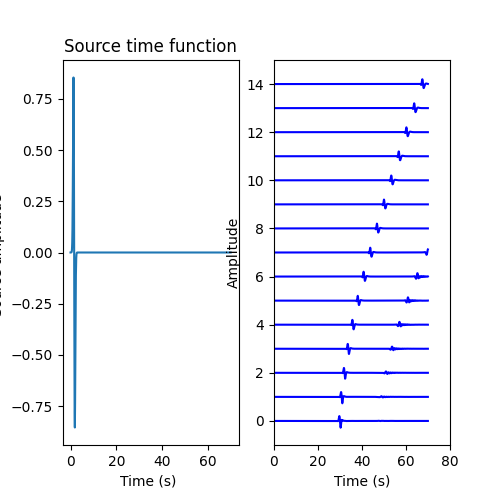

In [499]:
plt.show()

In [362]:
seis_anomaly=seis.copy()

[ -4.28571429e-03   4.57142857e-02   9.57142857e-02 ...,   9.98457143e+01
   9.98957143e+01   9.99457143e+01]
[ -8.87755102e-03   4.11224490e-02   9.11224490e-02 ...,   9.98411224e+01
   9.98911224e+01   9.99411224e+01]
[ -1.34693878e-02   3.65306122e-02   8.65306122e-02 ...,   9.98365306e+01
   9.98865306e+01   9.99365306e+01]
[ -1.80612245e-02   3.19387755e-02   8.19387755e-02 ...,   9.98319388e+01
   9.98819388e+01   9.99319388e+01]
[ -2.26530612e-02   2.73469388e-02   7.73469388e-02 ...,   9.98273469e+01
   9.98773469e+01   9.99273469e+01]
[ -2.72448980e-02   2.27551020e-02   7.27551020e-02 ...,   9.98227551e+01
   9.98727551e+01   9.99227551e+01]
[ -3.18367347e-02   1.81632653e-02   6.81632653e-02 ...,   9.98181633e+01
   9.98681633e+01   9.99181633e+01]
[ -3.64285714e-02   1.35714286e-02   6.35714286e-02 ...,   9.98135714e+01
   9.98635714e+01   9.99135714e+01]
[ -4.10204082e-02   8.97959184e-03   5.89795918e-02 ...,   9.98089796e+01
   9.98589796e+01   9.99089796e+01]
[ -4.56122

<IPython.core.display.Javascript object>


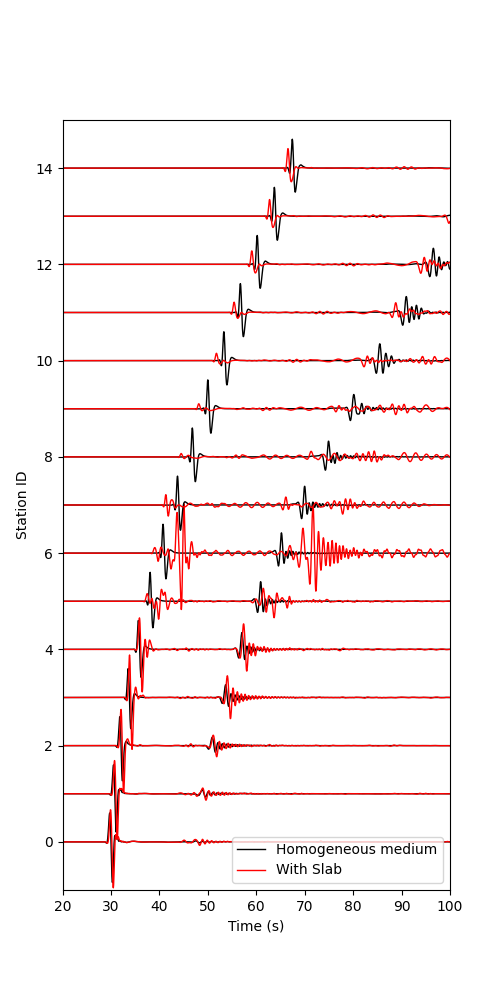

In [525]:
plt.figure(figsize=(5, 10))
time = np.arange(2000) * dt

for ir in range(len(seis)):
    print(time-(irx[ir]-isx)/7000)
    max_amp=np.max(seis[ir, 0:2000])
    if ir==0:
        plt.plot(time, 0.6*seis[ir, 0:2000]/max_amp + 1 * ir,'k',linewidth=1,label='Homogeneous medium')
        plt.plot(time, 0.6*seis_anomaly[ir, 0:2000]/max_amp + 1 * ir,'r',linewidth=1,label='With Slab')
    else:
            plt.plot(time, 0.6*seis[ir, 0:2000]/max_amp + 1 * ir,'k',linewidth=1)
            plt.plot(time, 0.6*seis_anomaly[ir, 0:2000]/max_amp + 1 * ir,'r',linewidth=1)
    plt.xlim(20,100)
    plt.ylim(-1,15)
    plt.xlabel('Time (s)')
    plt.ylabel('Station ID')
plt.legend(loc='lower right')
plt.show()
plt.savefig('waveform.pdf')
plt.savefig('waveform.png')

In [493]:
seis

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -8.46269708e-15,  -4.97699694e-15,  -1.58204785e-15],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -1.61604753e-14,  -1.38678845e-14,  -1.19510699e-14],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          1.16808433e-14,   1.24921024e-14,   1.40815122e-14],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -3.79220754e-14,  -3.14815648e-14,  -3.41655160e-14],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -2.38890928e-15,  -2.79956332e-14,  -5.92047160e-14],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          7.54949660e-14,   1.26401138e-13,   1.46974157e-13]])

In [367]:
np.savetxt('waveform.txt',seis_anomaly)

In [368]:
np.loadtxt('waveform.txt').shape

(15, 2400)

In [386]:
np.savetxt('waveform_normal.txt',seis)

In [ ]:
###plot 

<IPython.core.display.Javascript object>


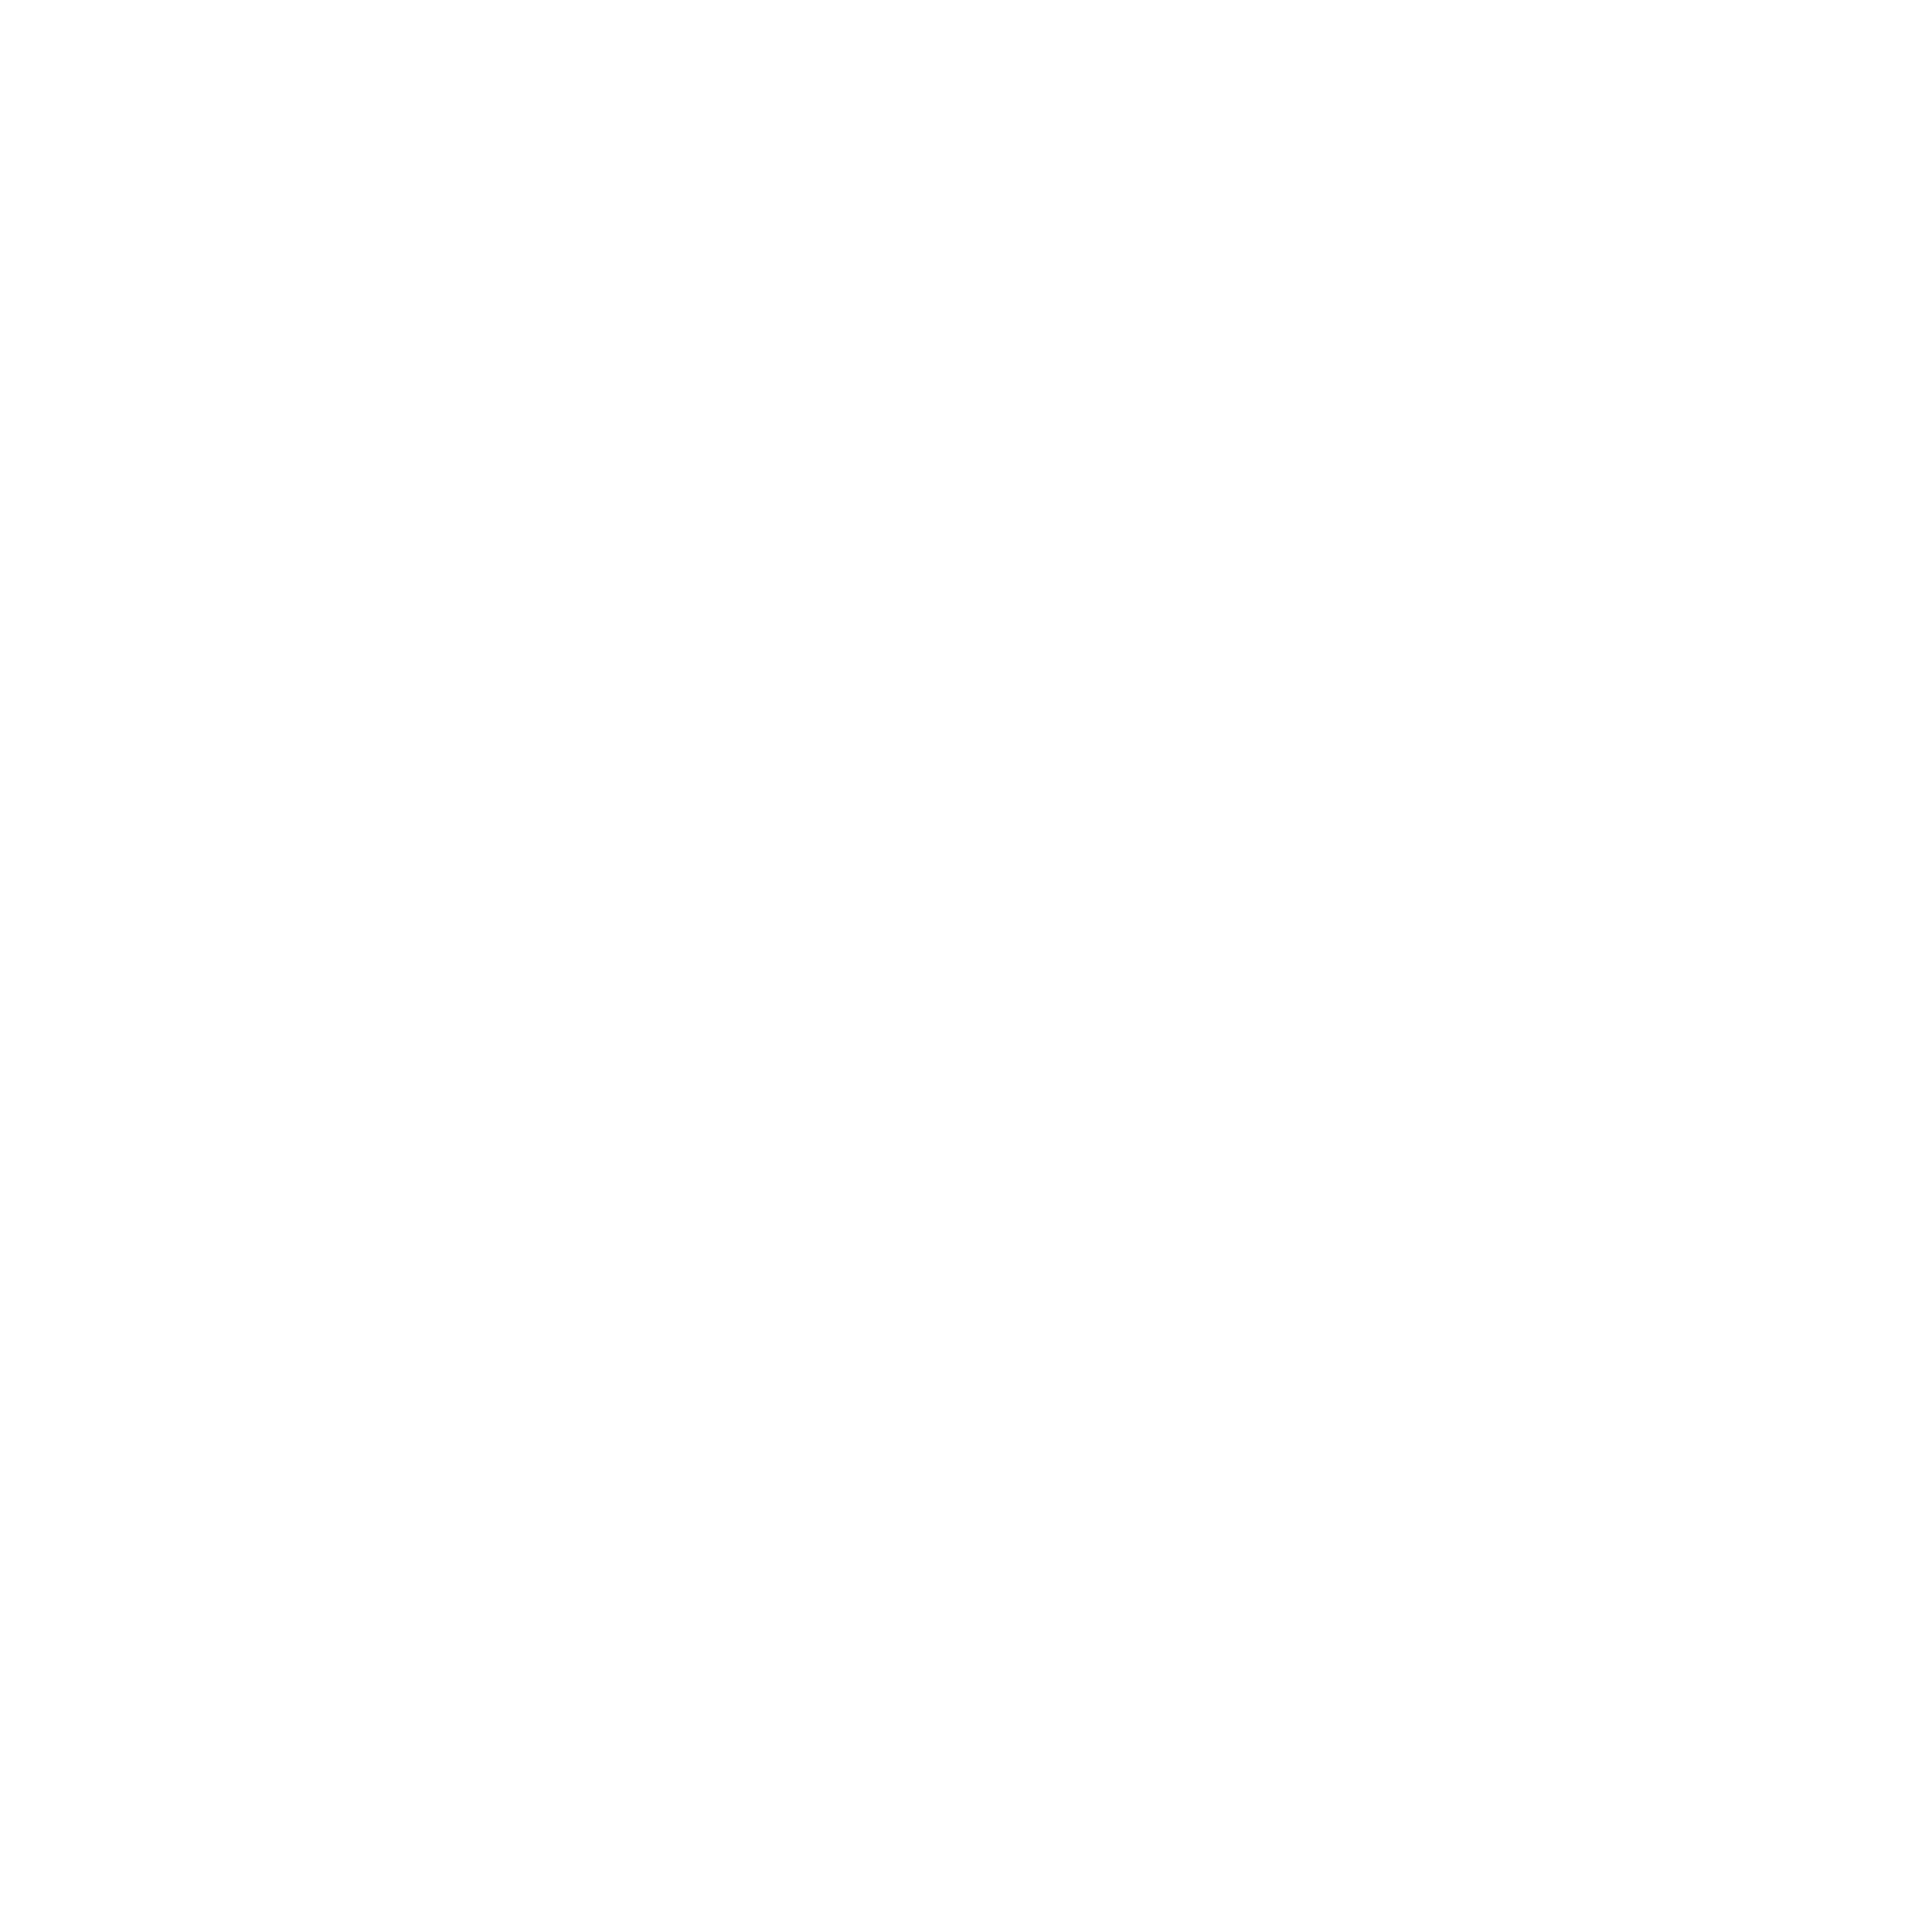

<IPython.core.display.Javascript object>


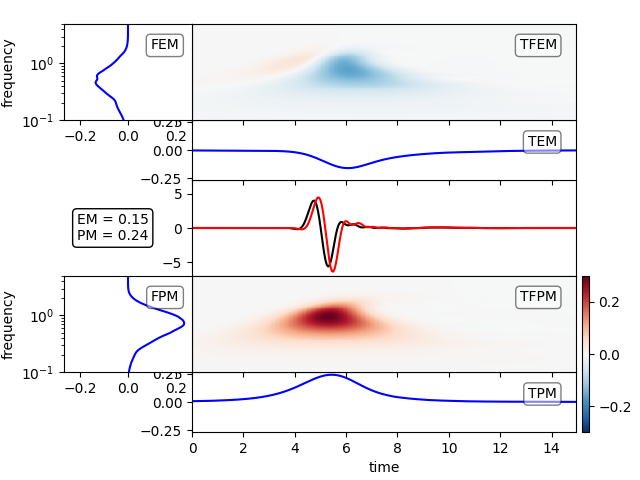

In [505]:
plt.figure(figsize=(20, 20))
from scipy.signal import hilbert
from obspy.signal.tf_misfit import plot_tf_misfits

# amplitude and phase error
phase_shift = 0.1
amp_fac = 1.1
plot_tf_misfits(seis[0][500:800].T, seis_anomaly[0][500:800].T, dt=0.05, fmin=0.1, fmax=5, show=True)
plt.savefig('receiver1.png')

<IPython.core.display.Javascript object>


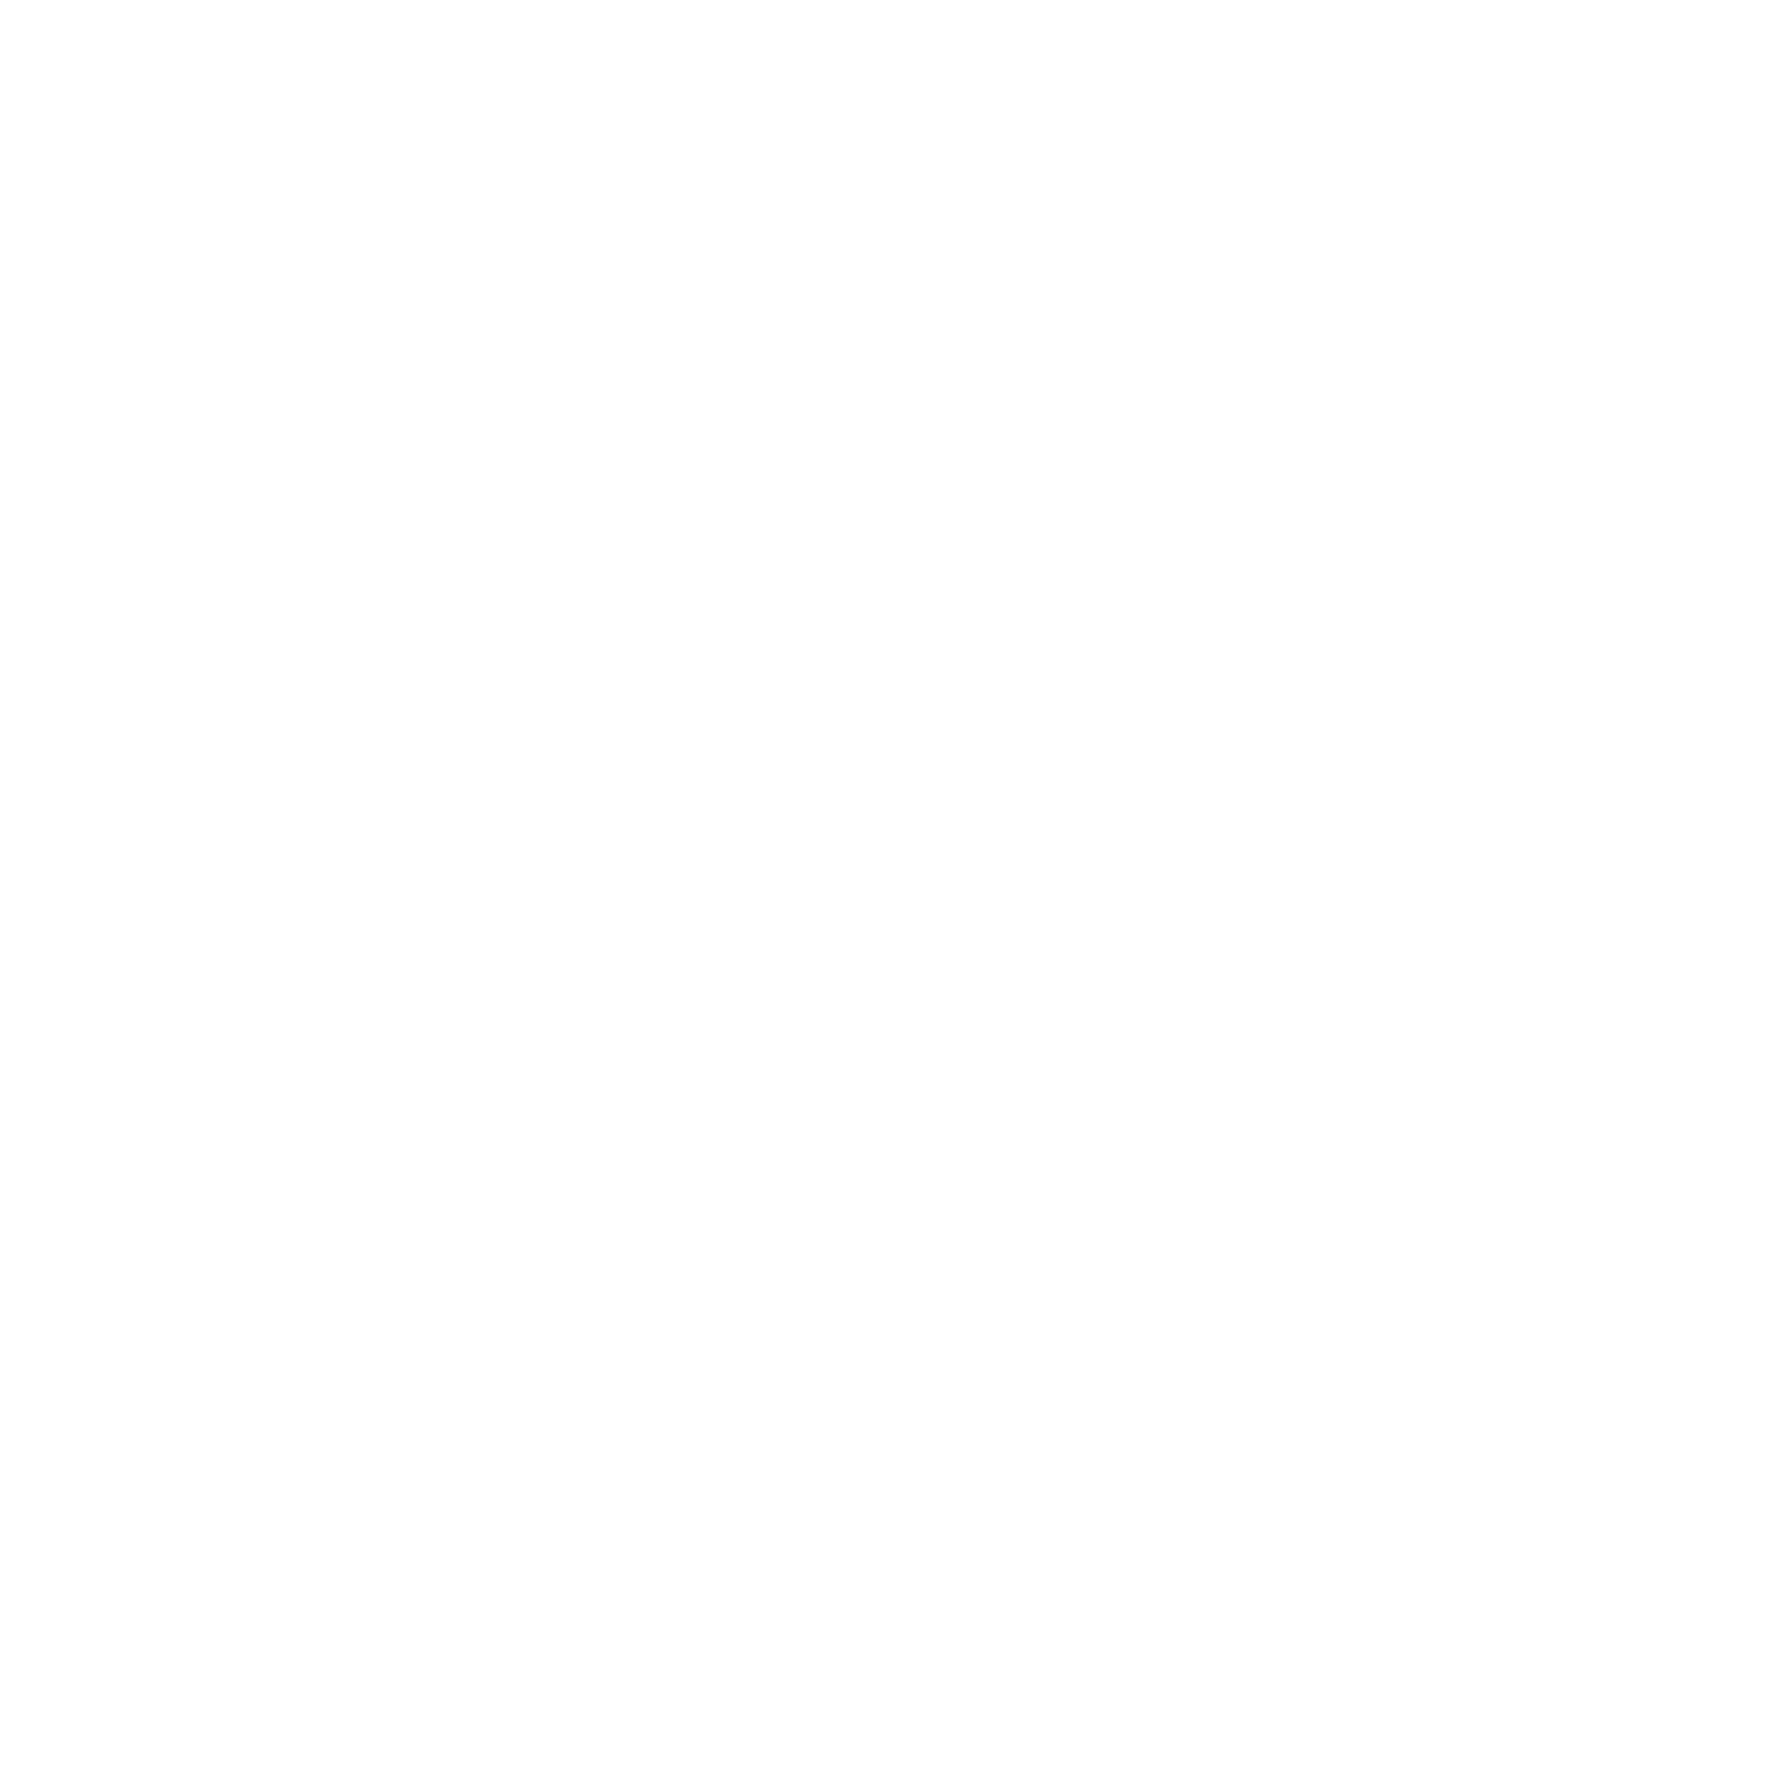

<IPython.core.display.Javascript object>


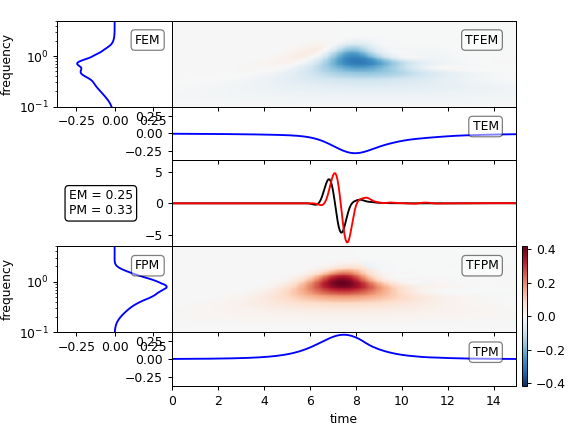

In [475]:
plt.figure(figsize=(20, 20))
from scipy.signal import hilbert
from obspy.signal.tf_misfit import plot_tf_misfits

# amplitude and phase error
phase_shift = 0.1
amp_fac = 1.1
plot_tf_misfits(seis[2][500:800].T, seis_anomaly[2][500:800].T, dt=0.05, fmin=0.1, fmax=5, show=True)
plt.savefig('receiver3.png')

<IPython.core.display.Javascript object>


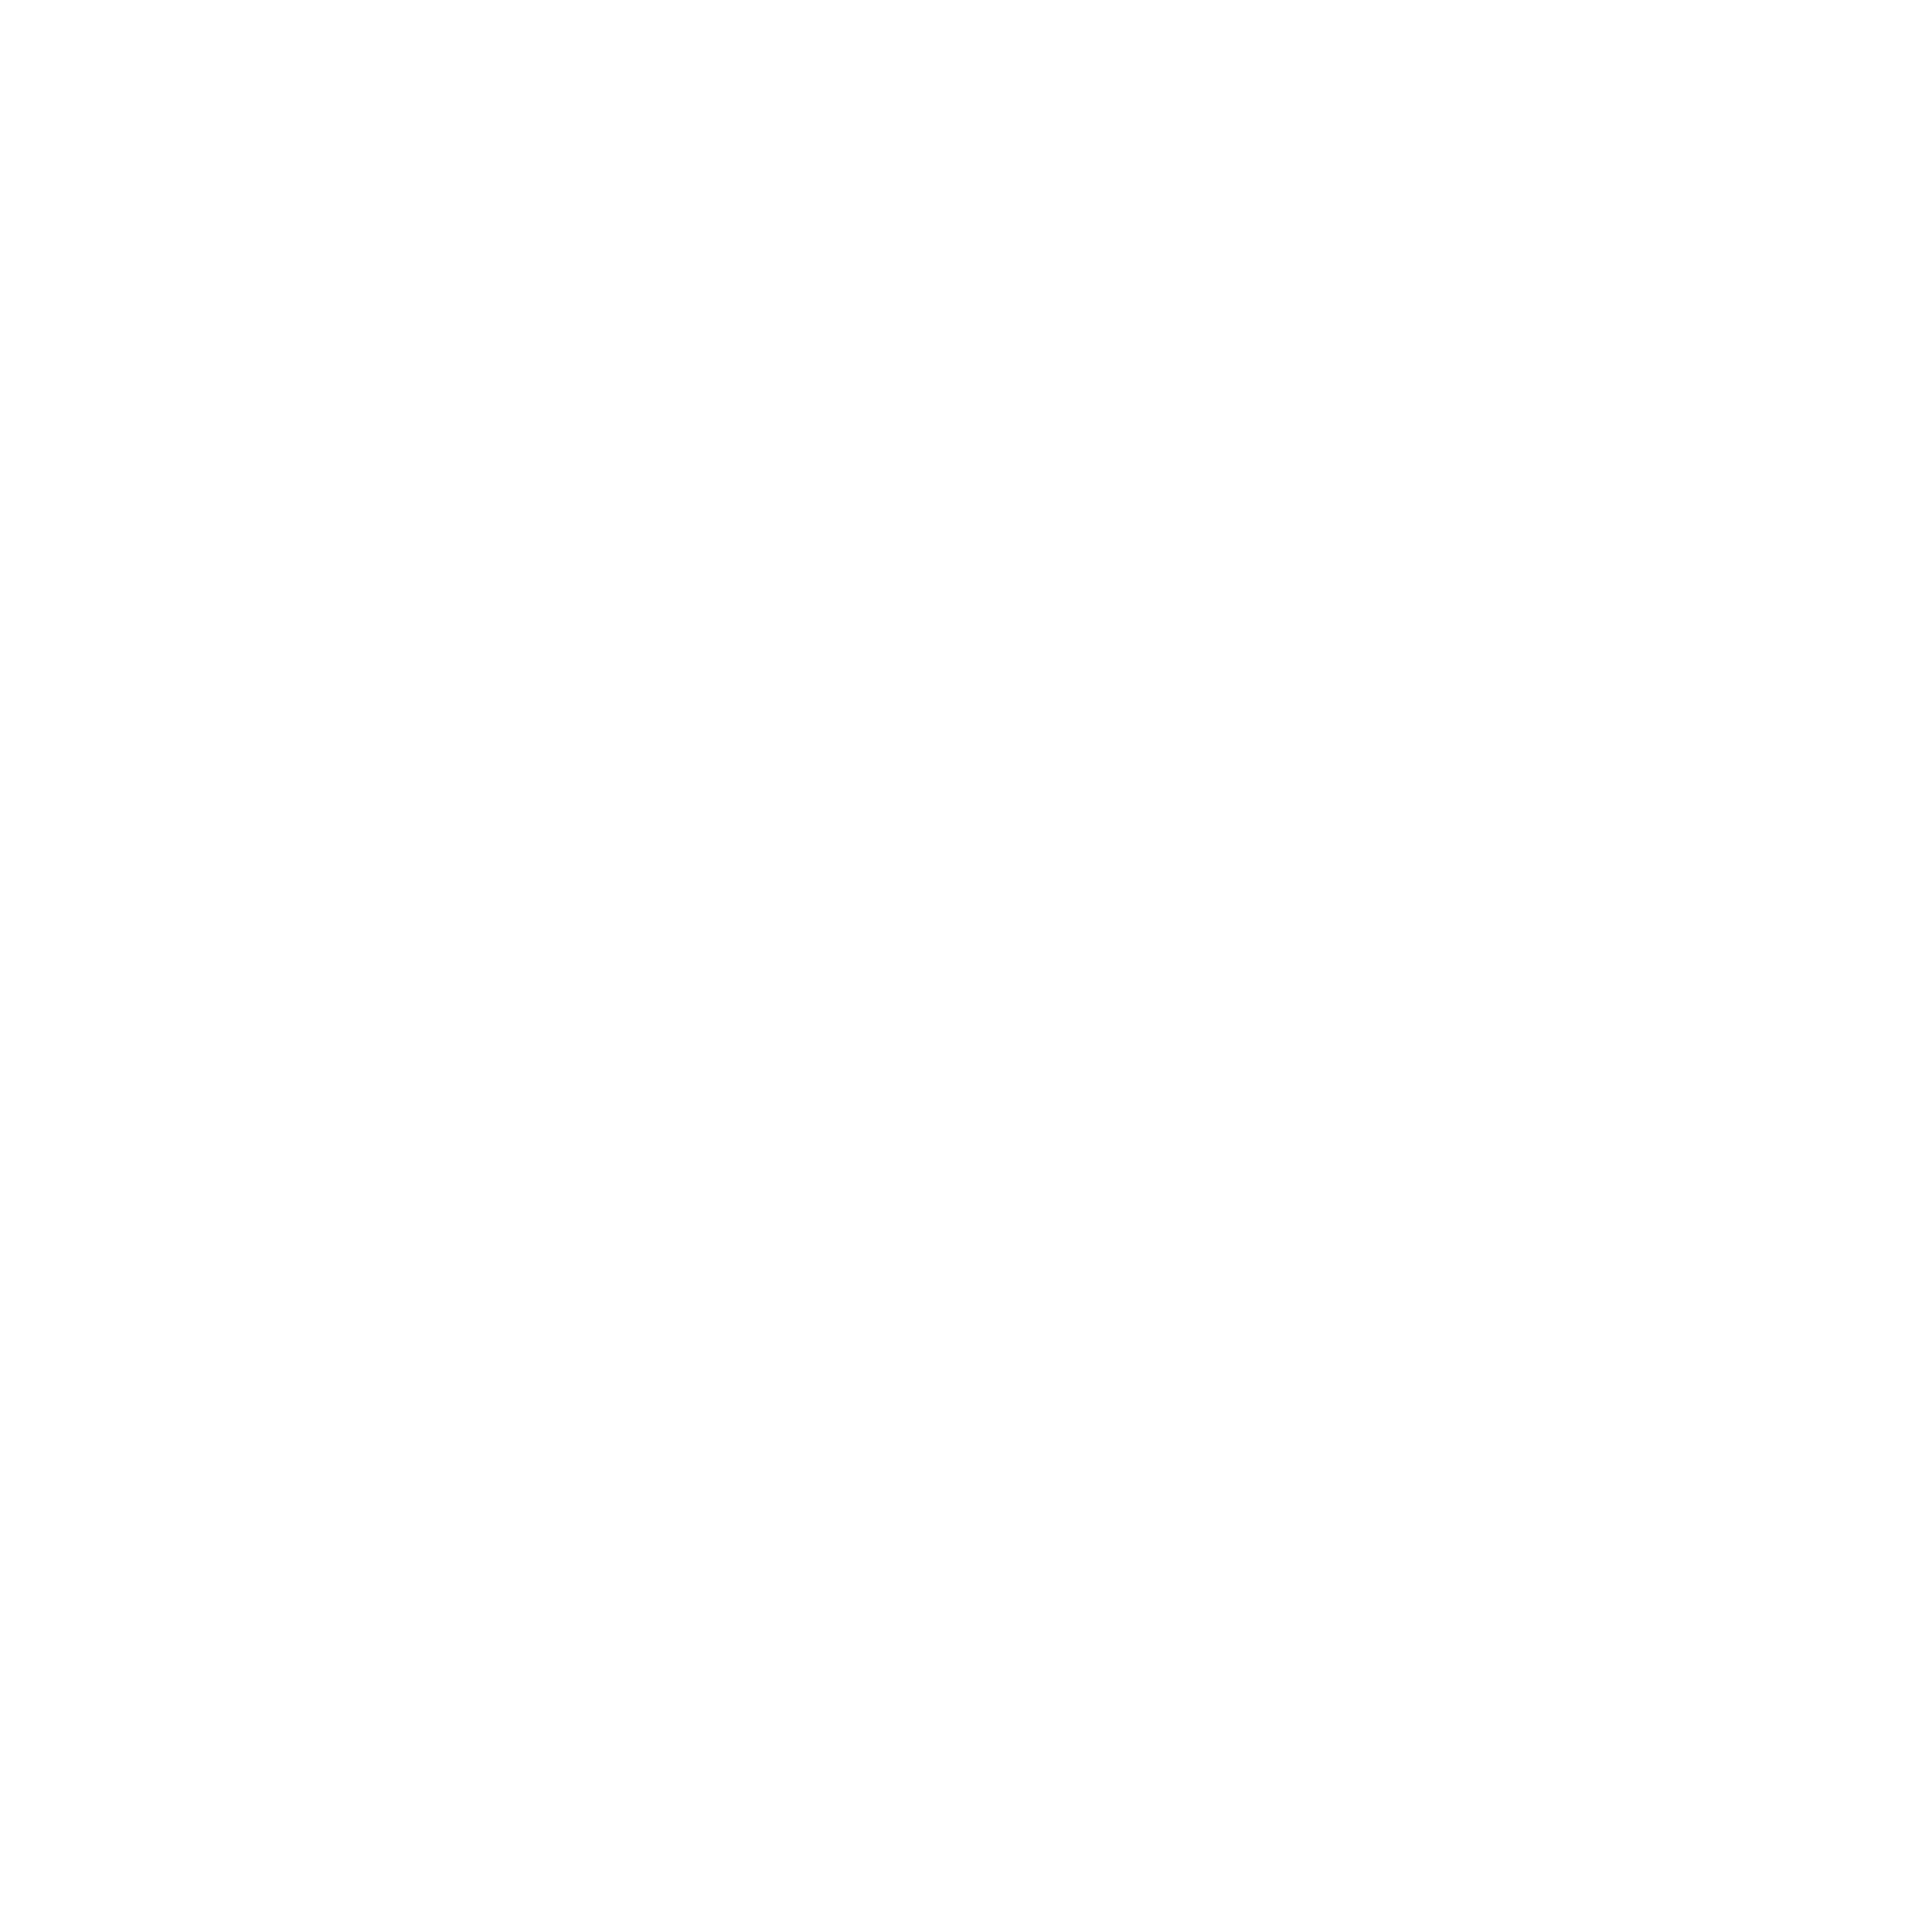

<IPython.core.display.Javascript object>


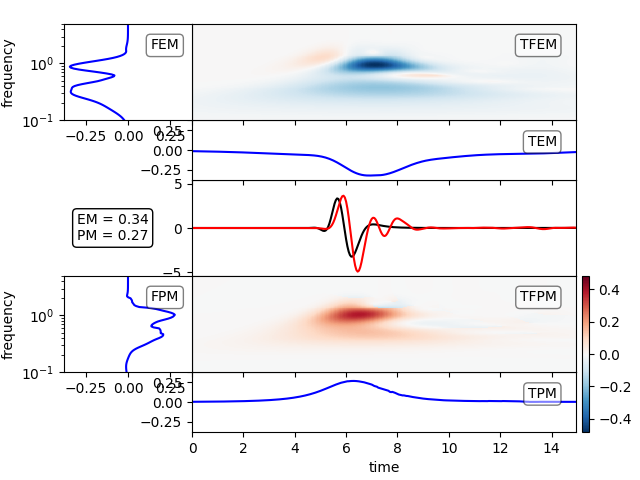

In [517]:
plt.figure(figsize=(20, 20))
from scipy.signal import hilbert
from obspy.signal.tf_misfit import plot_tf_misfits

# amplitude and phase error
phase_shift = 0.1
amp_fac = 1.1
plot_tf_misfits(seis[4][600:900].T, seis_anomaly[4][600:900].T, dt=0.05, fmin=0.1, fmax=5, show=True)
plt.savefig('receiver5.png')

<IPython.core.display.Javascript object>


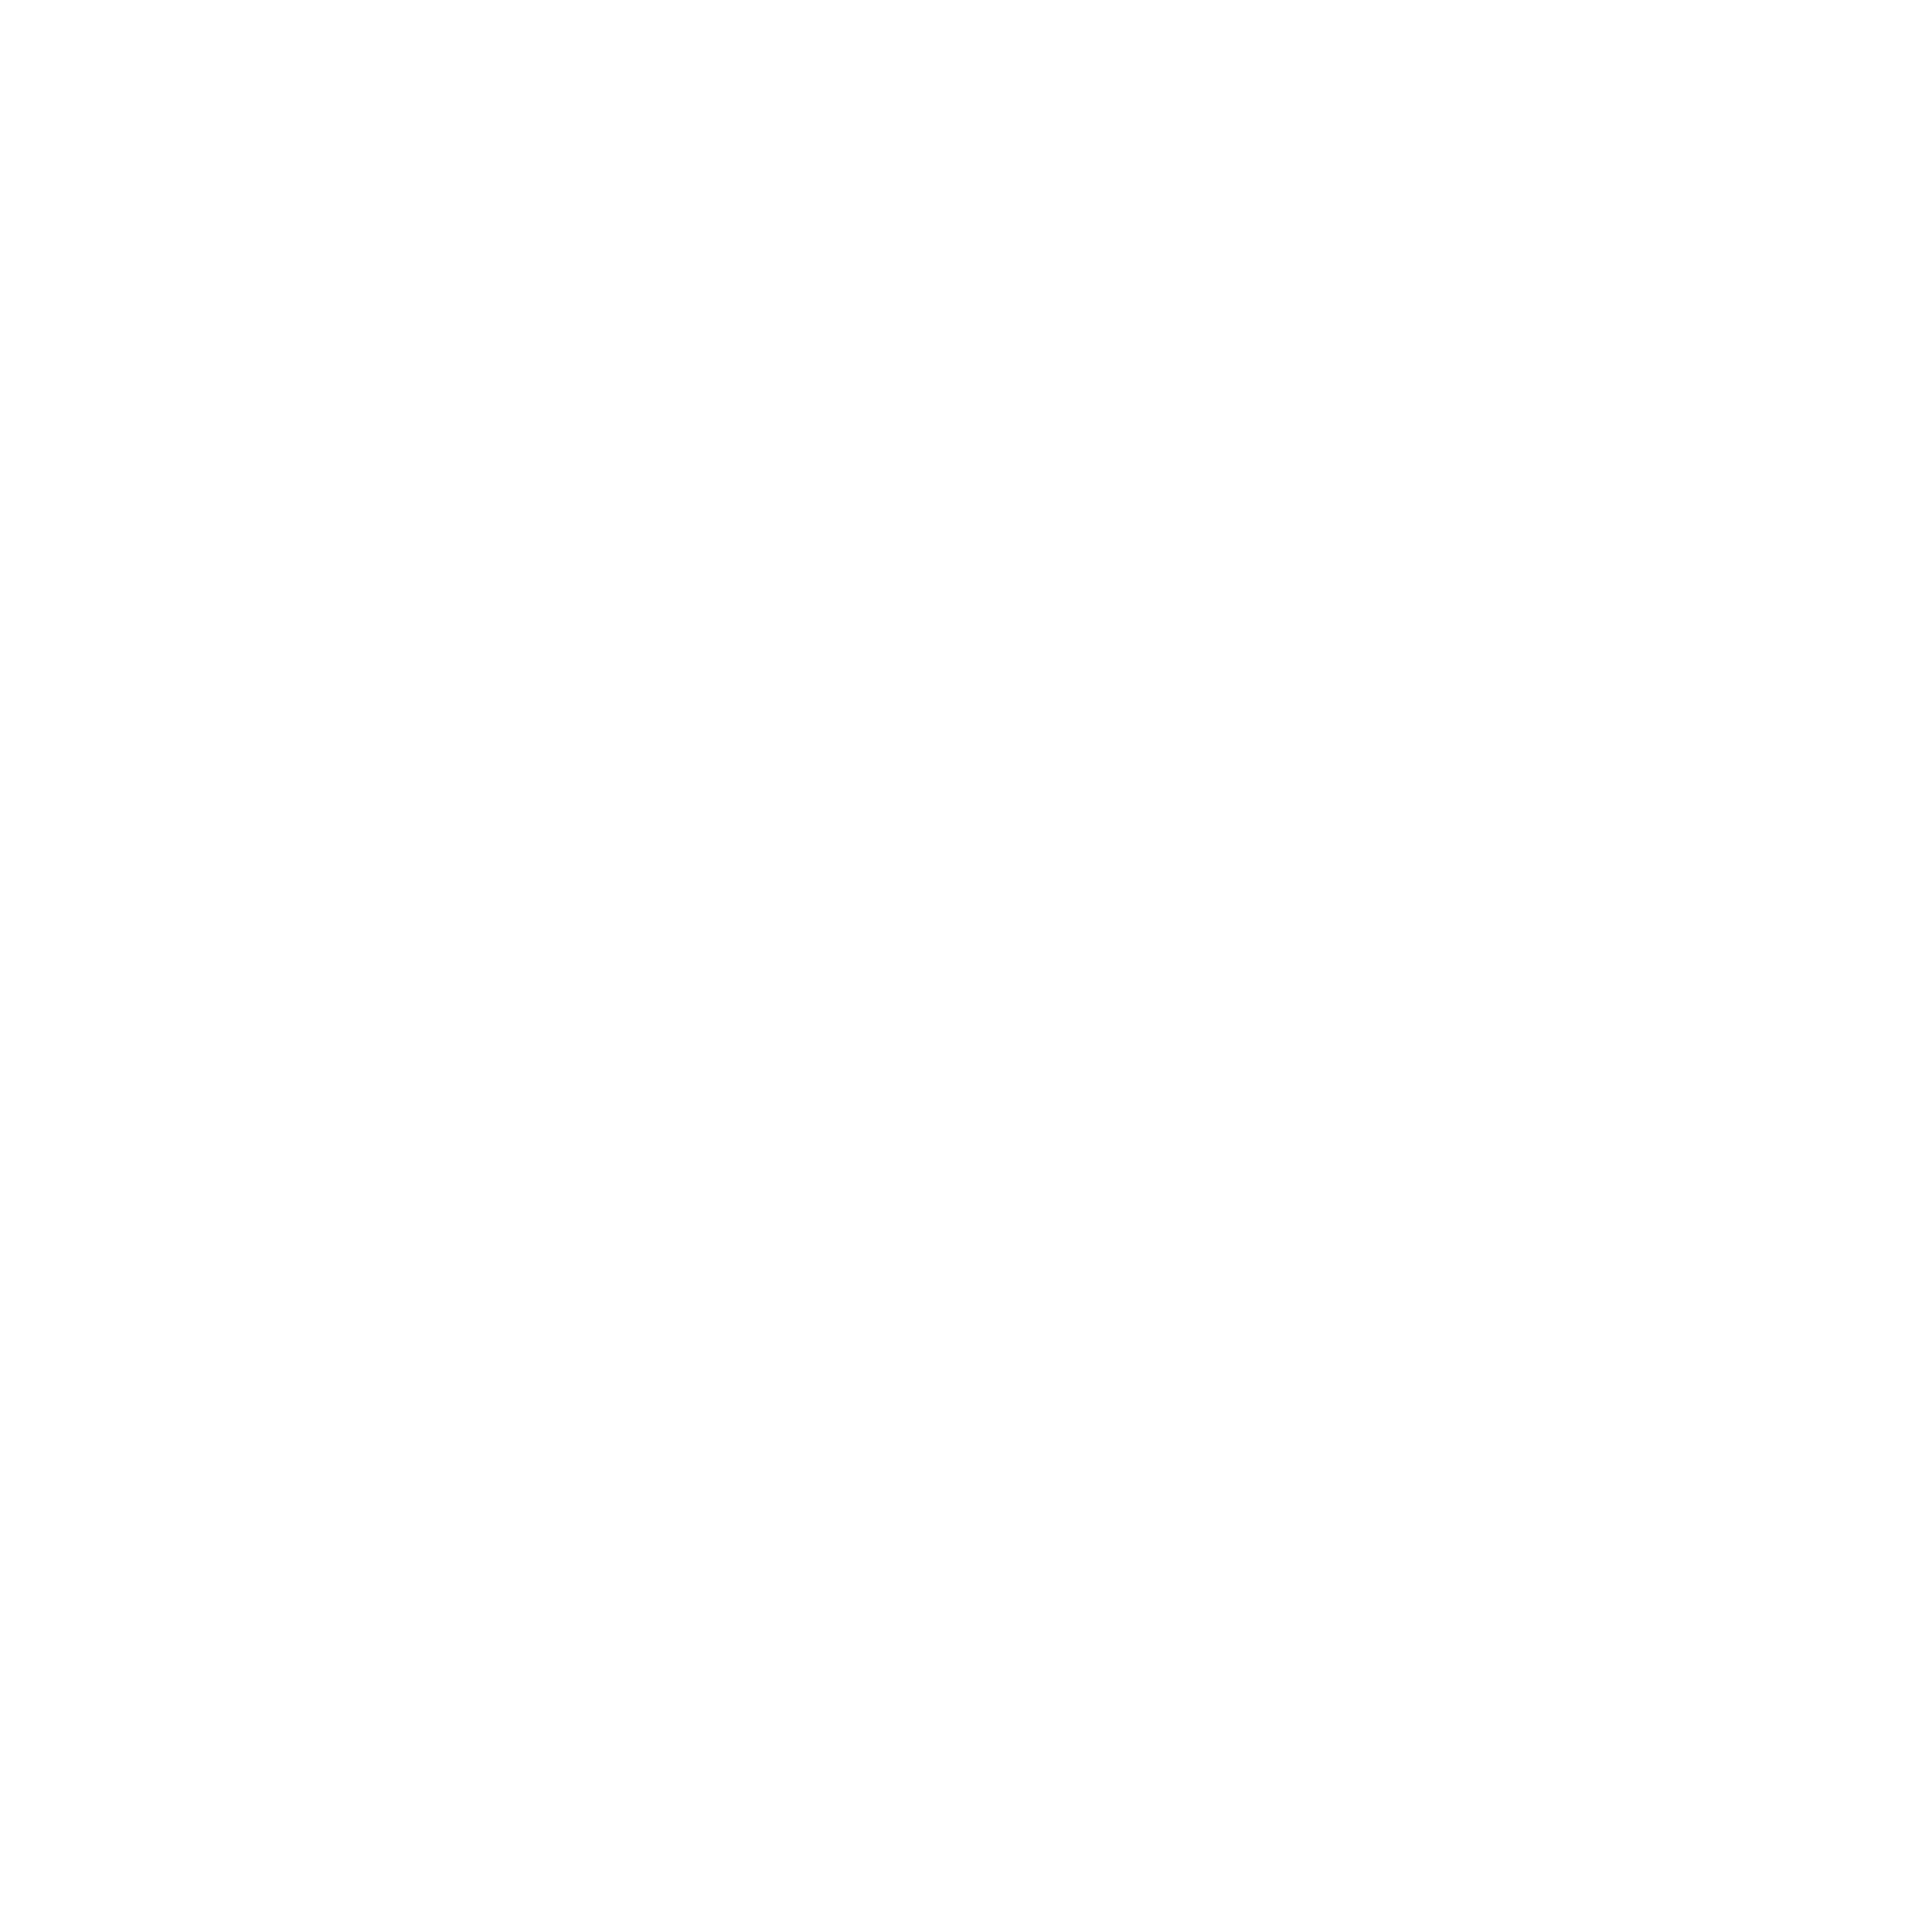

<IPython.core.display.Javascript object>


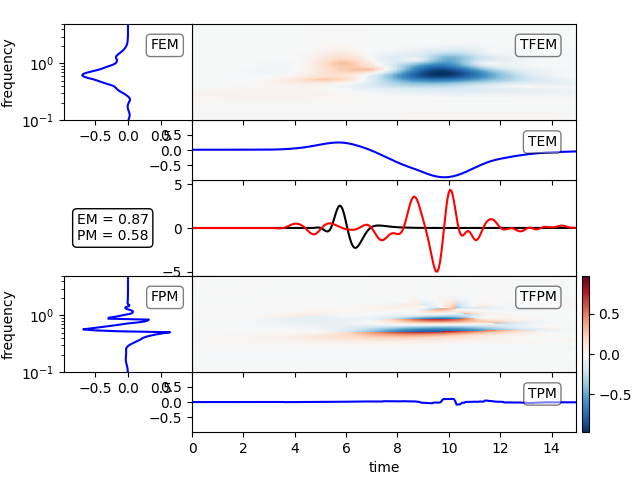

In [519]:
plt.figure(figsize=(20, 20))
from scipy.signal import hilbert
from obspy.signal.tf_misfit import plot_tf_misfits

# amplitude and phase error
phase_shift = 0.1
amp_fac = 1.1
plot_tf_misfits(seis[6][700:1000].T, seis_anomaly[6][700:1000].T, dt=0.05, fmin=0.1, fmax=5, show=True)
plt.savefig('receiver7.png')

<IPython.core.display.Javascript object>


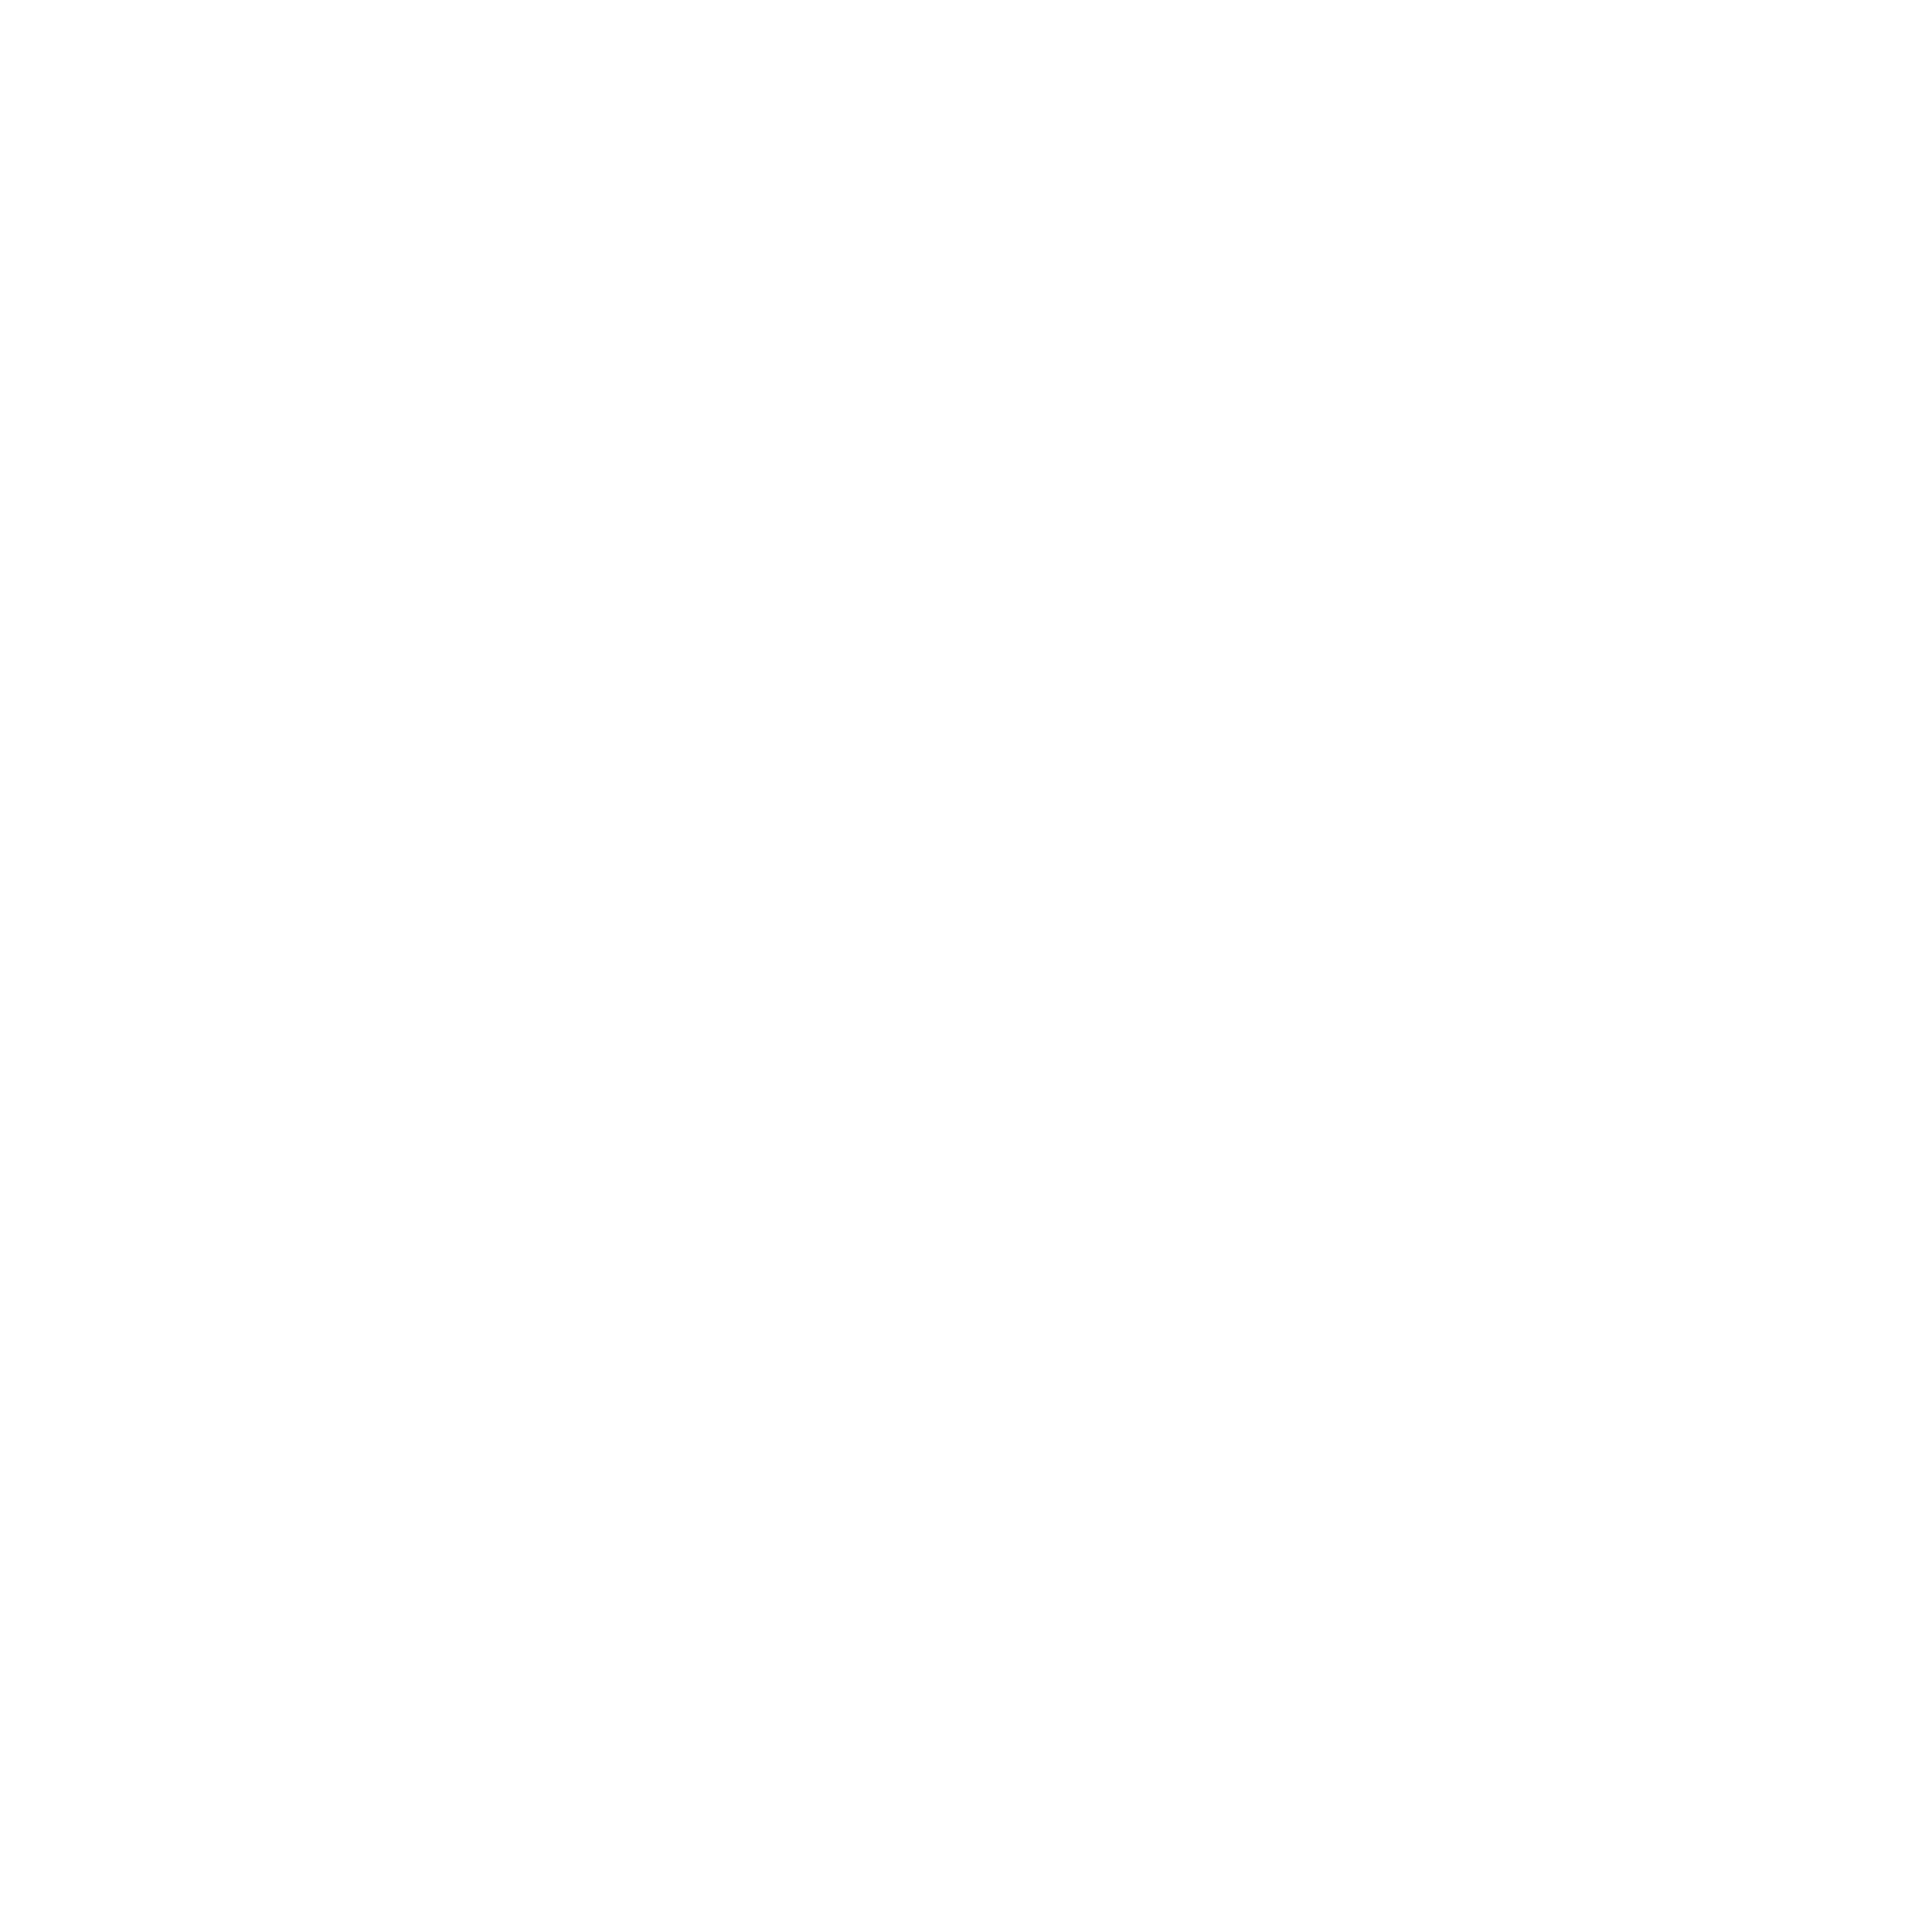

<IPython.core.display.Javascript object>


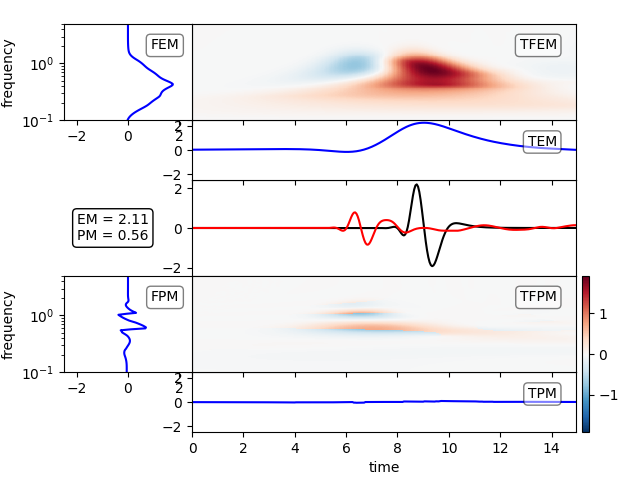

In [488]:
plt.figure(figsize=(20, 20))
from scipy.signal import hilbert
from obspy.signal.tf_misfit import plot_tf_misfits

# amplitude and phase error
phase_shift = 0.1
amp_fac = 1.1
plot_tf_misfits(seis[7][700:1000].T, seis_anomaly[7][700:1000].T, dt=0.05, fmin=0.1, fmax=5, show=True)
plt.savefig('receiver9.png')

<IPython.core.display.Javascript object>


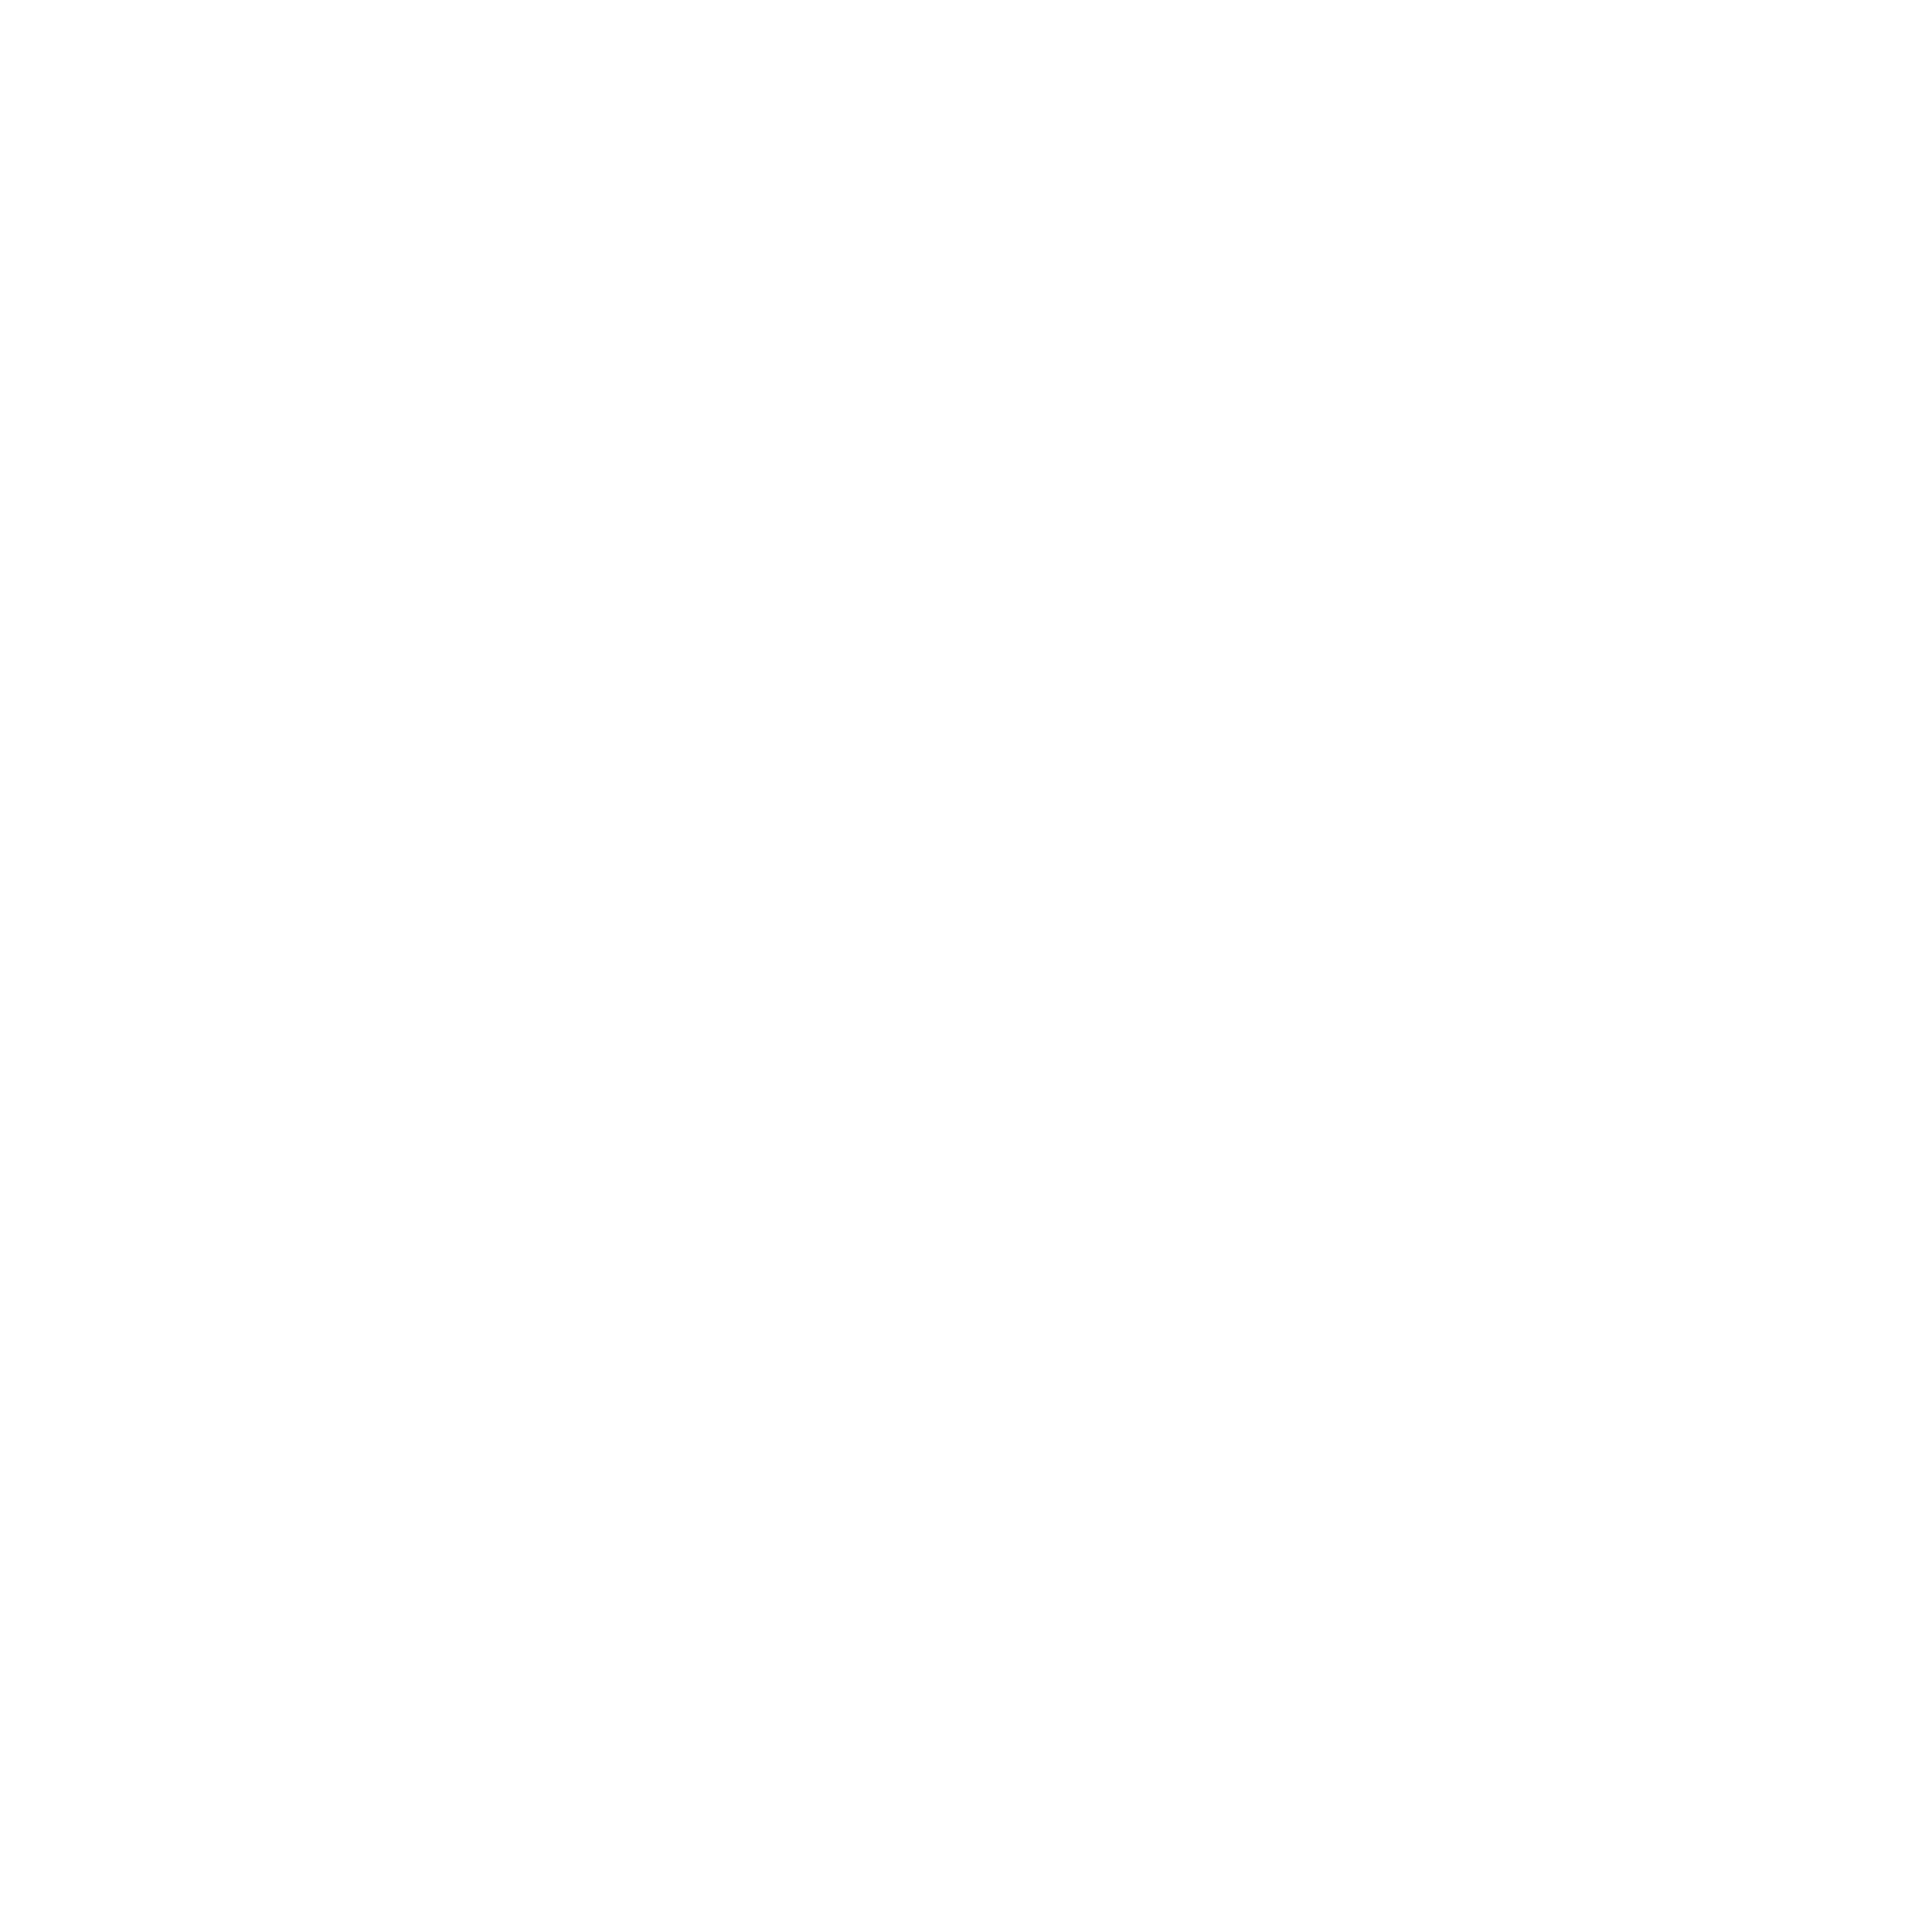

<IPython.core.display.Javascript object>


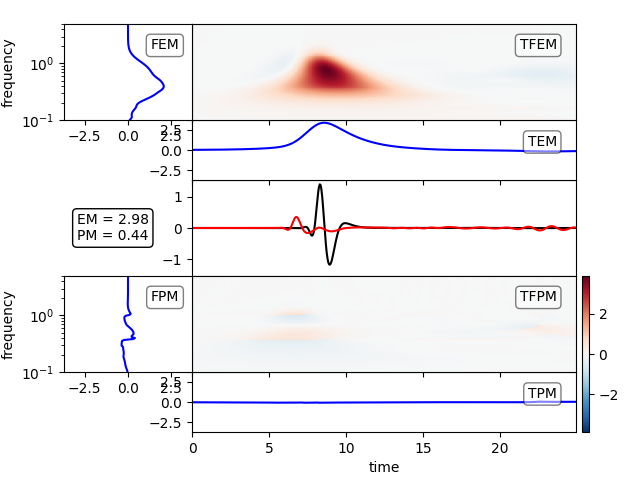

In [507]:
plt.figure(figsize=(20, 20))
from scipy.signal import hilbert
from obspy.signal.tf_misfit import plot_tf_misfits

# amplitude and phase error
phase_shift = 0.1
amp_fac = 1.1
plot_tf_misfits(seis[10][900:1400].T, seis_anomaly[10][900:1400].T, dt=0.05, fmin=0.1, fmax=5, show=True)
plt.savefig('receiver11.png')

/home/yjgao/anaconda3/envs/salvus/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:197: RuntimeWarning: divide by zero encountered in true_divide
  _tfpm = np.angle(w_1 / w_2) / np.pi
/home/yjgao/anaconda3/envs/salvus/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:325: RuntimeWarning: divide by zero encountered in true_divide
  _tpm = np.angle(w_1 / w_2) / np.pi
/home/yjgao/anaconda3/envs/salvus/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:455: RuntimeWarning: divide by zero encountered in true_divide
  _tpm = np.angle(w_1 / w_2) / np.pi
/home/yjgao/anaconda3/envs/salvus/lib/python3.7/site-packages/obspy/signal/tf_misfit.py:582: RuntimeWarning: divide by zero encountered in true_divide
  _pm = np.angle(w_1 / w_2) / np.pi


<IPython.core.display.Javascript object>


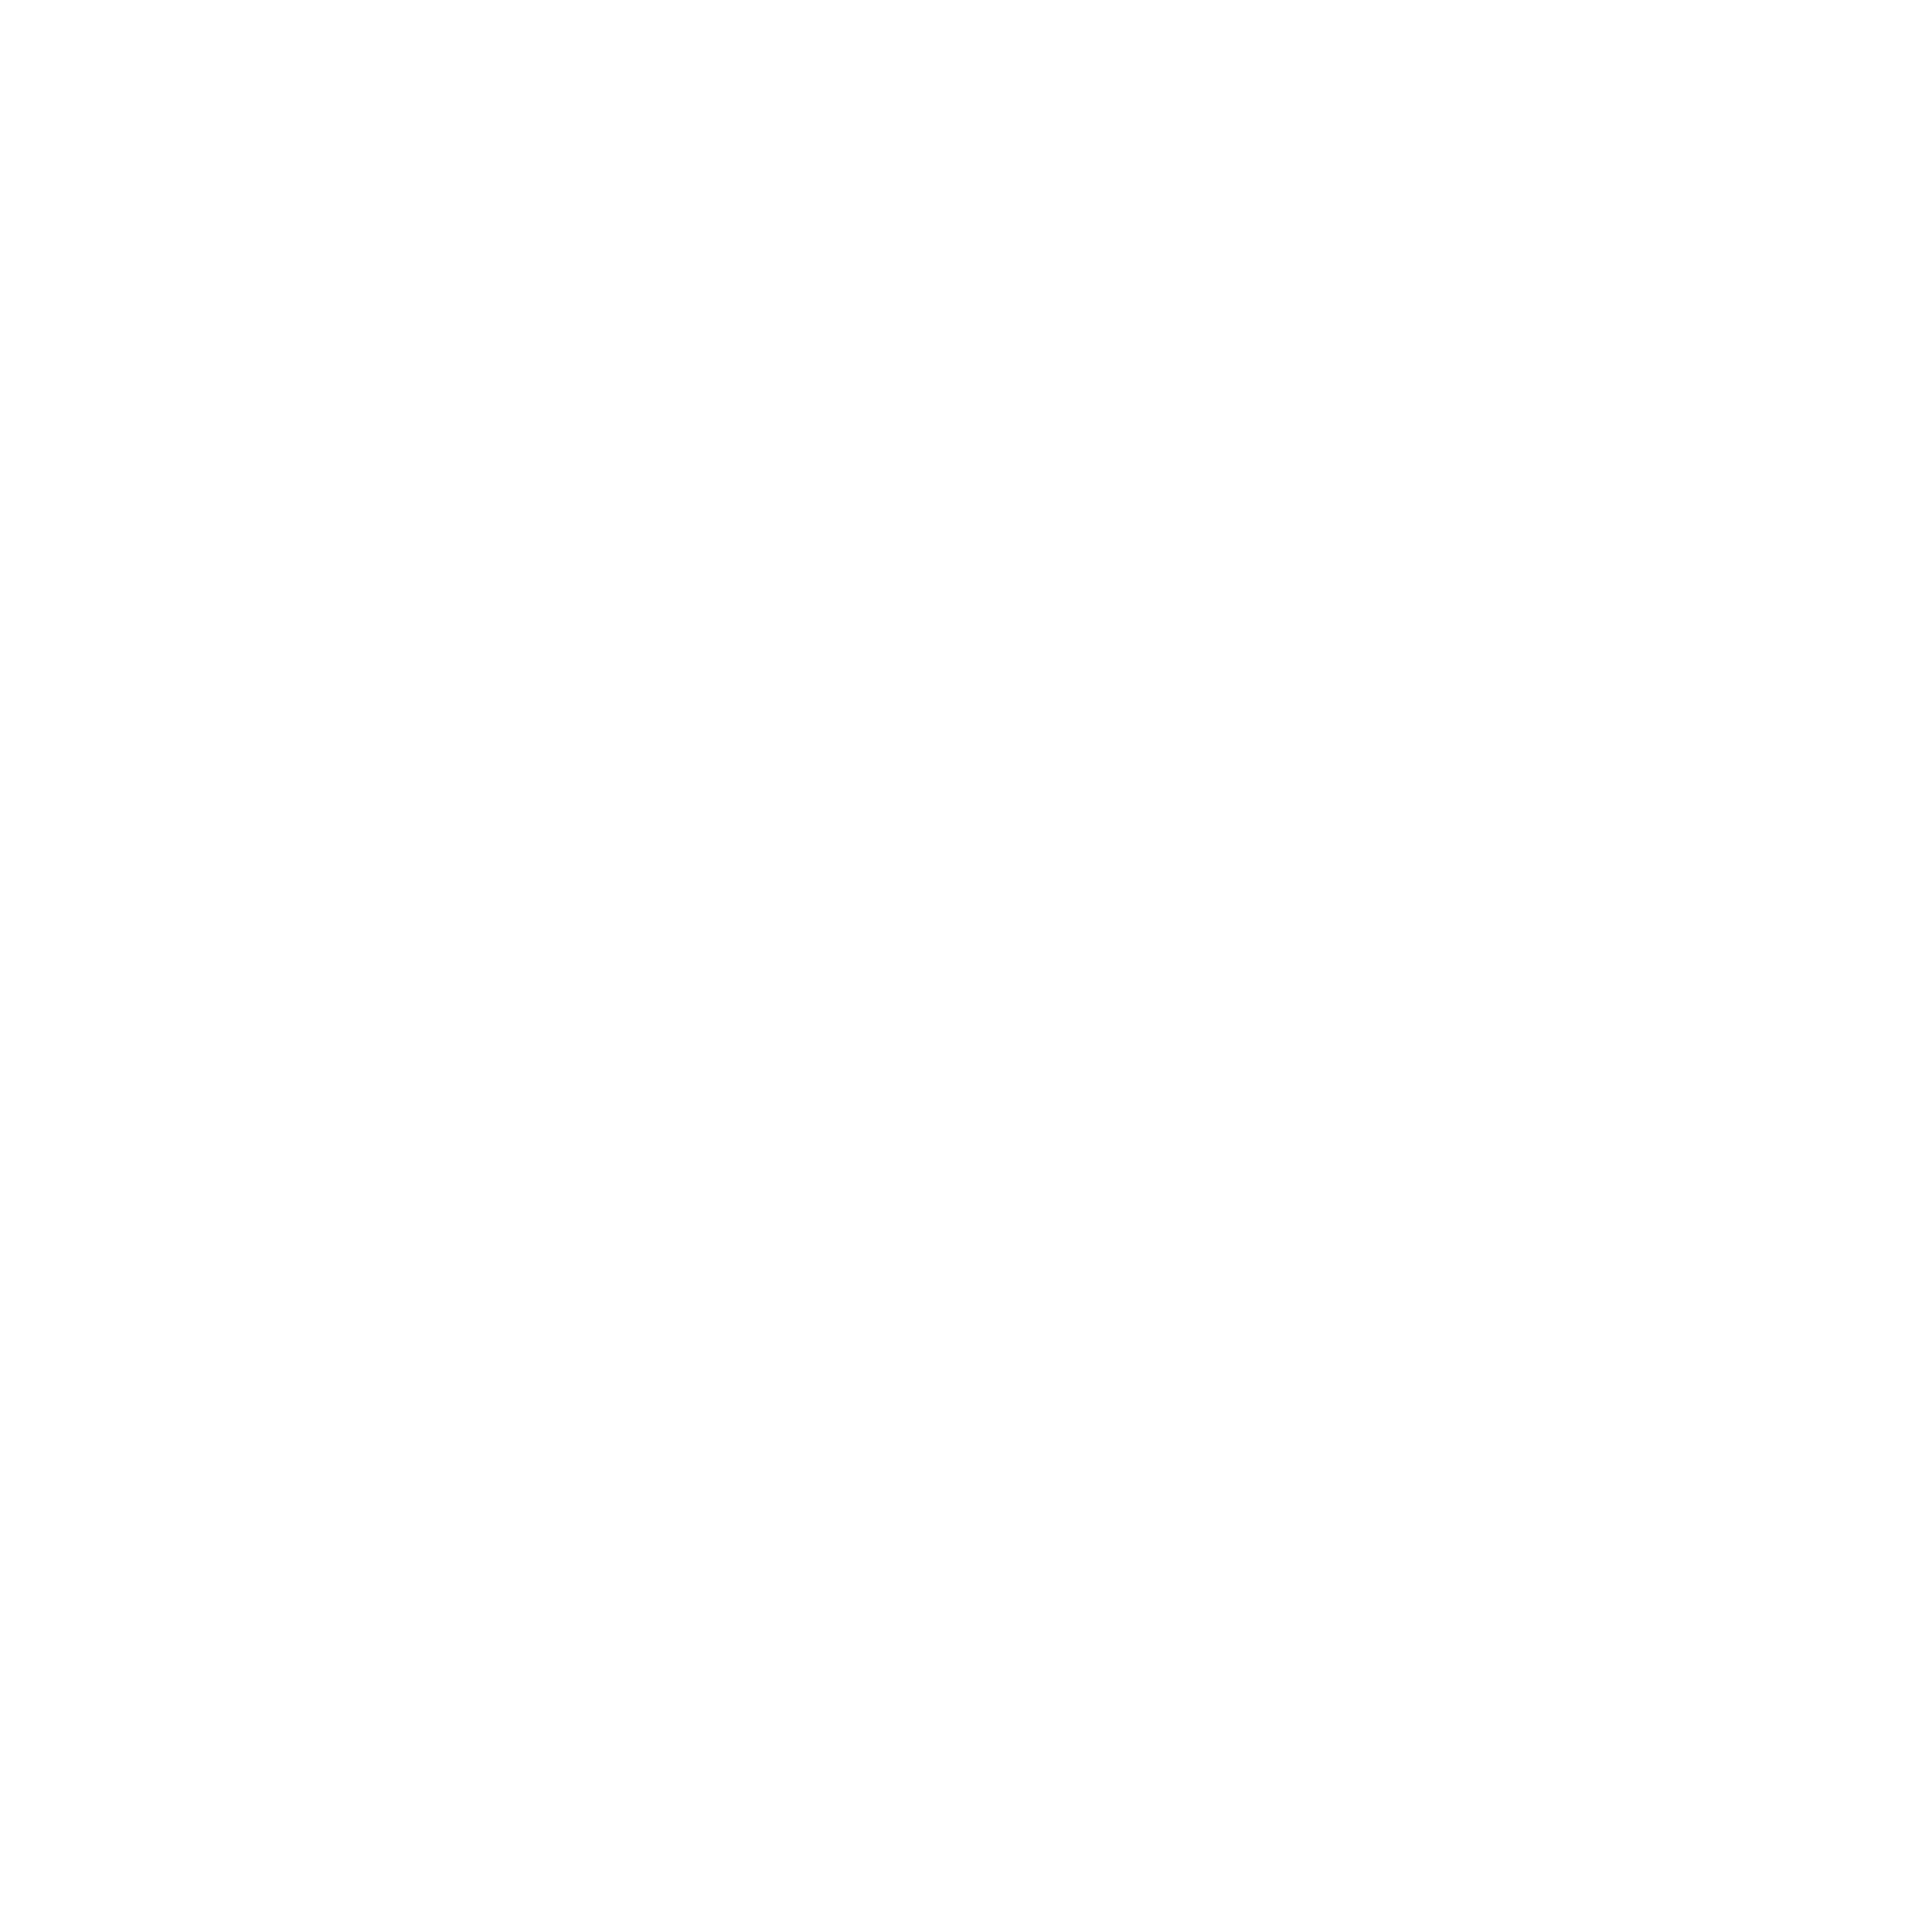

<IPython.core.display.Javascript object>


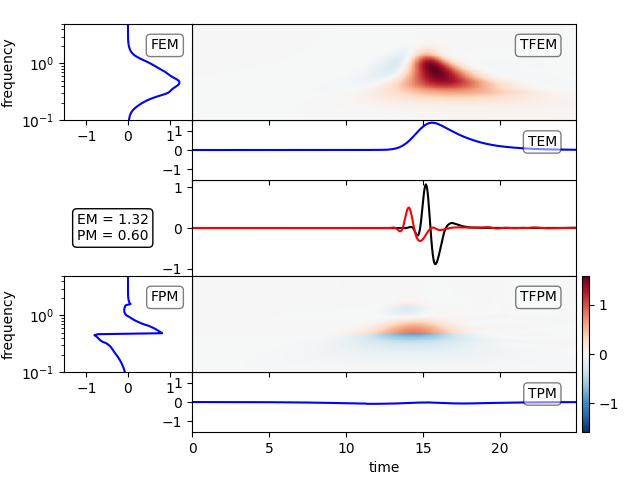

In [508]:
plt.figure(figsize=(20, 20))
from scipy.signal import hilbert
from obspy.signal.tf_misfit import plot_tf_misfits

# amplitude and phase error
phase_shift = 0.1
amp_fac = 1.1
plot_tf_misfits(seis[12][900:1400].T, seis_anomaly[12][900:1400].T, dt=0.05, fmin=0.1, fmax=5, show=True)
plt.savefig('receiver13.png')

<IPython.core.display.Javascript object>


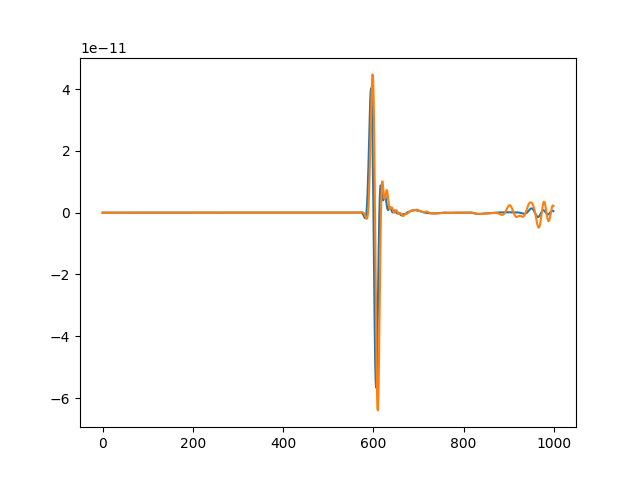

In [441]:
plt.figure()
plt.plot(seis[0][0:1000].T)
plt.plot(seis_anomaly[0][0:1000].T)
plt.show()

In [435]:
plt.show()

In [463]:
seis[0][0:1000]

array([  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
         0.00000000e+000,   0.00000000e+

In [459]:


import numpy as np

from obspy.signal.tf_misfit import plot_tfr


# general constants
tmax = 6.
dt = 0.01
npts = int(tmax / dt + 1)
t = np.linspace(0., tmax, npts)

fmin = .5
fmax = 10

# constants for the signal
A1 = 4.
t1 = 2.
f1 = 2.
phi1 = 0.

# generate the signal
H1 = (np.sign(t - t1) + 1) / 2
st1 = A1 * (t - t1) * np.exp(-2 * (t - t1))
st1 *= np.cos(2. * np.pi * f1 * (t - t1) + phi1 * np.pi) * H1

In [462]:
st1

array([ -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00,
        -0.00000000e+00,

<IPython.core.display.Javascript object>


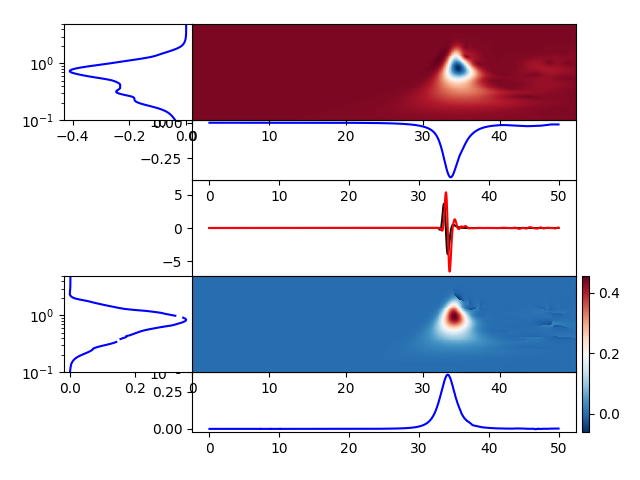

<IPython.core.display.Javascript object>


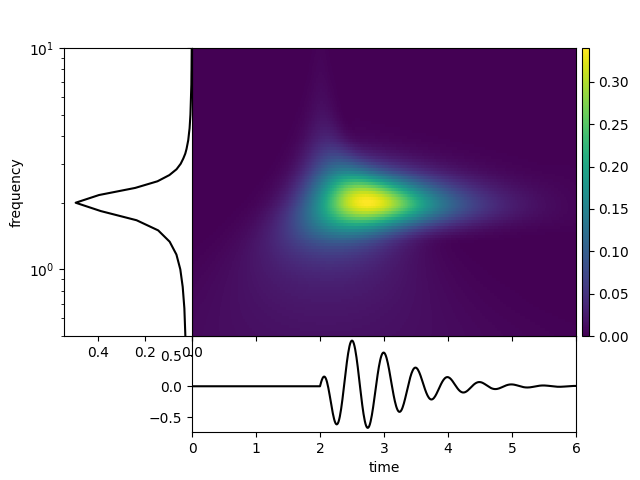

In [461]:
plot_tfr(st1, dt=dt, fmin=fmin, fmax=fmax)
